In [1]:
import subprocess
import pandas as pd
import re
import json
import seaborn as sns 
print(sns.__version__) # should be 0.9

import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from IPython.display import display, HTML


0.9.0


In [9]:
# Compile files
subprocess.run(["chmod", "+x" "compile.sh"])
subprocess.run(["chmod", "+x" "run.sh"])
subprocess.run(["./compile.sh"])


# def runs():
#     ps = ("uniform", "deterministic_fitness", "ranking_parent", "stochastic_parent", "stochastic_parent_no_repitition", "tournament_parent")
#     rec = ("uniform", "simple_arithmetic")
    
#     for p in ps:
#         for re in rec:
#             for i in range(2,10):
#                 yield (p, re, i)


subprocess.run(["rm", "./log/bent_cigar.txt", "./log/katsura.txt", "./log/chaffers.txt"])

# for (parentselection, recombination, parents) in runs():
#     subprocess.run(["./run.sh", '"{}"', '"{}"', '"{}"'.format(parentselection, recombination, parents)])
subprocess.run(["./run.sh", parentselection, recombination, str(parents)])


KeyboardInterrupt: 

In [56]:
### For some reason the below only works for me with SphereEvaluation, not BentCigarFunction... Very annoying
### So just run the command and pipe it to a text file and read that out...

# result = subprocess.run(['java', '-jar', 'testrun.jar', '-evaluation=BentCigarFunction', '-seed=1', '-submission=player50'], stdout=subprocess.PIPE)
# output = result.stdout.decode('utf-8')
# print(result, result.stderr, result.stdout)
# print(output)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [10]:
import os


def create_run_df(run_output, run_config):
    df = pd.DataFrame()
    generation_nr = 0
    matches = re.finditer("Statistic({.+})", run_output)
    for m in matches:
        json_str = m[1]
        obj = pd.read_json(json_str, orient='column', typ='series')
        obj.at['run_config'] = run_config
        obj.at['generation_nr'] = generation_nr

        df = df.append(obj, ignore_index=True)
        generation_nr += 1
        
    return df

def create_all_runs_dfs(file_path):
    f = open(file_path, "r")
    output = f.read()
    run = 0
    print("Processing file: {}".format(file_path))
    for m in re.finditer("---Run ({.+})", output):
        print("Processing run {}".format(run))
#         print(m.start(), m.end())

        configuration_json = m.groups(1)[0]
        end_m = re.search("---Finished run---", output[m.start():])

#         print(end_m.start())
        if end_m is None:
            return

        run_output = output[m.end():end_m.end() + m.end()]

        df = create_run_df(run_output, configuration_json)

        run += 1
        yield df

# dfs = create_all_runs_dfs("bent_cigar.txt")


all_dfs = {'cigar': {}, 'schaffer': {}, 'katsuura': {}}
total_dfs = {'cigar': None, 'schaffer': None, 'katsuura': None}
runs = (('cigar', "./log/bent_cigar.txt",), ('katsuura', "./log/katsura.txt",), ('schaffer', "./log/chaffers.txt",))

for fn_key, file in runs:
    dfs = create_all_runs_dfs(file)
    df = next(dfs)
    all_dfs[fn_key] = {df['run_config'][0] : df}
    for next_df in dfs:
        config = next_df['run_config'][0]
        all_dfs[fn_key][config] = next_df
        total_dfs[fn_key] = df.append(next_df)
    
    
    


Processing file: ./log/bent_cigar.txt
Processing run 0
Processing run 1
Processing run 2
Processing run 3
Processing run 4
Processing run 5
Processing run 6
Processing run 7
Processing run 8
Processing run 9
Processing run 10
Processing run 11
Processing run 12
Processing run 13
Processing run 14
Processing run 15
Processing run 16
Processing run 17
Processing run 18
Processing run 19
Processing run 20
Processing run 21
Processing run 22
Processing run 23
Processing run 24
Processing run 25
Processing run 26
Processing run 27
Processing run 28
Processing run 29
Processing run 30
Processing run 31
Processing run 32
Processing run 33
Processing run 34
Processing run 35
Processing run 36
Processing run 37
Processing run 38
Processing run 39
Processing run 40
Processing run 41
Processing run 42
Processing run 43
Processing run 44
Processing run 45
Processing run 46
Processing run 47
Processing run 48
Processing run 49
Processing run 50
Processing run 51
Processing run 52
Processing run 53


In [11]:
# Mean max for different functions:
for fn, total_df in total_dfs.items():
    print(fn)
    mean = total_df.groupby(['run_config', 'generation_nr']).mean()
    max_idx = mean['maxFitness'].idxmax()
    
    display(mean.loc[max_idx])

cigar


averageAge                16.110000
averageFitness             9.635822
averageOfstdevGenomes      0.053297
maxAge                    99.000000
maxFitness                 9.778287
minAge                     0.000000
minFitness                 9.566117
populationSize           100.000000
stdevAge                  16.308829
stdevFitness               0.057865
Name: ({"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 2 }, 316.0), dtype: float64

schaffer


averageAge                45.850000
averageFitness             5.293206
averageOfstdevGenomes      0.136228
maxAge                   222.000000
maxFitness                 6.764272
minAge                     0.000000
minFitness                 4.975411
populationSize           100.000000
stdevAge                  41.634931
stdevFitness               0.324043
Name: ({"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 2 }, 420.0), dtype: float64

katsuura


averageAge                 8.650000
averageFitness             0.007815
averageOfstdevGenomes      0.063456
maxAge                    17.000000
maxFitness                 0.073716
minAge                     0.000000
minFitness                 0.007149
populationSize           100.000000
stdevAge                   5.396990
stdevFitness               0.006623
Name: ({"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 2 }, 6962.0), dtype: float64

In [13]:
# print(all_dfs.keys())
for key, dfs in all_dfs.items():
    for config, df in dfs.items():
        print(key)
        print(config)
        df.head()
    
        display(HTML(df.tail(5).to_html()))

cigar
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
325,16.42,9.675190,0.043487,325.0,80.0,9.778287,0.0,9.598461,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",16.170455,0.051998,"[1.332267629550187e-15, 0.004894537645444, 0.1..."
326,15.90,9.679944,0.041288,326.0,81.0,9.778287,0.0,9.609155,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",15.012328,0.051636,"[1.332267629550187e-15, 0.0048856626832090005,..."
327,15.02,9.684274,0.040012,327.0,62.0,9.778287,0.0,9.617202,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",13.385051,0.050057,"[1.332267629550187e-15, 0.004874793564778, 0.1..."
328,14.99,9.690041,0.037629,328.0,63.0,9.778287,0.0,9.622020,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",13.101523,0.050623,"[1.332267629550187e-15, 0.004830074301333, 0.1..."
329,15.30,9.692738,0.035153,329.0,64.0,9.778287,0.0,9.624869,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",13.166245,0.048834,"[1.332267629550187e-15, 0.004741404572185, 0.0..."


cigar
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
325,16.36,9.396569,0.001471,325.0,95.0,9.410287,0.0,9.392664,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",19.387377,0.003285,"[1.5543122344752194e-15, 9.769962616701378e-15..."
326,16.19,9.396837,0.001401,326.0,96.0,9.410287,0.0,9.393035,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",19.472902,0.003147,"[1.5543122344752194e-15, 9.769962616701378e-15..."
327,17.14,9.396880,0.001331,327.0,97.0,9.410287,0.0,9.393486,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",19.512570,0.003112,"[1.5543122344752194e-15, 9.769962616701378e-15..."
328,17.29,9.397080,0.001318,328.0,98.0,9.410287,0.0,9.393992,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",19.776903,0.003044,"[1.5543122344752194e-15, 9.769962616701378e-15..."
329,15.58,9.397307,0.001218,329.0,95.0,9.410287,0.0,9.394669,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",18.128530,0.002920,"[1.5543122344752194e-15, 9.769962616701378e-15..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
325,31.27,7.006167,0.326313,325.0,145.0,9.428965,0.0,6.172531,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",28.639782,0.666110,"[0.314347971518451, 0.25507285525683204, 0.403..."
326,31.24,7.026820,0.324542,326.0,146.0,9.428965,0.0,6.231087,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",29.168174,0.656719,"[0.312621533527117, 0.26686080276516805, 0.402..."
327,30.96,7.061776,0.322018,327.0,147.0,9.428965,0.0,6.286878,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",29.185243,0.645474,"[0.305281233002317, 0.26067879117514403, 0.402..."
328,31.96,7.061776,0.322018,328.0,148.0,9.428965,1.0,6.286878,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",29.185243,0.645474,"[0.305281233002317, 0.26067879117514403, 0.402..."
329,31.59,7.091069,0.320704,329.0,149.0,9.428965,0.0,6.350745,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",29.196950,0.623771,"[0.30295915799358203, 0.242735478677979, 0.408..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
325,36.90,7.641235,0.188163,325.0,182.0,9.026935,0.0,7.218649,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",37.912399,0.400686,"[0.371992917471538, 0.25086238233454, 0.276761..."
326,35.80,7.659944,0.186449,326.0,183.0,9.026935,0.0,7.241990,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",37.693501,0.397727,"[0.368938420846232, 0.25098432372761004, 0.285..."
327,34.22,7.674796,0.180464,327.0,141.0,9.026935,0.0,7.261513,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",35.220045,0.394207,"[0.362073159222262, 0.23556624177186103, 0.281..."
328,34.88,7.685460,0.181522,328.0,142.0,9.026935,0.0,7.277804,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",35.514301,0.387377,"[0.36821640487182705, 0.242217202064954, 0.284..."
329,34.60,7.687756,0.181208,329.0,143.0,9.026935,0.0,7.284337,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",35.031414,0.385217,"[0.37028212162317403, 0.24102302046466803, 0.2..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
325,32.67,6.735672,0.333385,325.0,132.0,8.296324,1.0,6.023357,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",29.553360,0.539261,"[0.32021258990460805, 0.29882478875294505, 0.3..."
326,32.65,6.744801,0.332233,326.0,133.0,8.296324,0.0,6.058269,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",29.804488,0.531844,"[0.313088977547122, 0.287793110359553, 0.34311..."
327,33.25,6.754001,0.332599,327.0,134.0,8.296324,0.0,6.066902,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",29.984454,0.527831,"[0.312779214667525, 0.28642319360234103, 0.341..."
328,33.48,6.820778,0.330648,328.0,135.0,8.296324,0.0,6.125708,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",30.565824,0.550438,"[0.311329642254816, 0.286595808582907, 0.33429..."
329,33.04,6.851005,0.326052,329.0,136.0,8.296324,0.0,6.149510,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",30.881360,0.542896,"[0.299408746220087, 0.285185891685727, 0.32470..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
325,28.36,7.267685,0.188779,325.0,139.0,8.613343,0.0,6.864692,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",30.475406,0.367036,"[0.24041704966929803, 0.221990224501935, 0.317..."
326,27.14,7.286030,0.187270,326.0,111.0,8.613343,0.0,6.884959,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",29.021034,0.358407,"[0.232730918189184, 0.22127884474153503, 0.327..."
327,28.04,7.290514,0.186730,327.0,112.0,8.613343,0.0,6.885626,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",29.100488,0.356159,"[0.23098551201088502, 0.22147174796639202, 0.3..."
328,28.50,7.297983,0.185472,328.0,113.0,8.613343,0.0,6.905214,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",29.263458,0.351988,"[0.23031776966206402, 0.21910758879854103, 0.3..."
329,27.78,7.304728,0.182715,329.0,114.0,8.613343,0.0,6.932179,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",29.006061,0.346917,"[0.23235478755511602, 0.217422953325476, 0.309..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
325,30.71,6.287401,0.354408,325.0,158.0,8.495679,0.0,5.523782,100.0,"{""parentScheme"": tournament_parent, ""recombina...",27.360298,0.685896,"[0.368355070866663, 0.38286613166590205, 0.384..."
326,31.61,6.290368,0.354582,326.0,159.0,8.495679,0.0,5.525833,100.0,"{""parentScheme"": tournament_parent, ""recombina...",27.457565,0.683223,"[0.36865284752354005, 0.383150540827341, 0.384..."
327,31.89,6.314672,0.353413,327.0,160.0,8.495679,0.0,5.534849,100.0,"{""parentScheme"": tournament_parent, ""recombina...",27.815785,0.688711,"[0.371480799050793, 0.384061740935882, 0.38057..."
328,32.59,6.318832,0.353522,328.0,161.0,8.495679,0.0,5.536200,100.0,"{""parentScheme"": tournament_parent, ""recombina...",28.063890,0.685035,"[0.368505741302443, 0.38376430982757903, 0.385..."
329,32.23,6.336387,0.352945,329.0,162.0,8.495679,0.0,5.572072,100.0,"{""parentScheme"": tournament_parent, ""recombina...",28.551657,0.673158,"[0.368814934700597, 0.38389636524088205, 0.385..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
325,29.65,7.345945,0.193682,325.0,135.0,8.542398,0.0,6.970985,100.0,"{""parentScheme"": tournament_parent, ""recombina...",27.856552,0.343230,"[0.34857844807820704, 0.240202845051174, 0.226..."
326,30.56,7.349853,0.194180,326.0,136.0,8.542398,0.0,6.976456,100.0,"{""parentScheme"": tournament_parent, ""recombina...",27.947207,0.341021,"[0.34995562978274203, 0.246346638084518, 0.226..."
327,31.01,7.367563,0.194362,327.0,137.0,8.542398,0.0,6.980081,100.0,"{""parentScheme"": tournament_parent, ""recombina...",28.295758,0.339350,"[0.348138823921303, 0.248822270166754, 0.22818..."
328,31.78,7.368462,0.194073,328.0,138.0,8.542398,0.0,6.982725,100.0,"{""parentScheme"": tournament_parent, ""recombina...",28.496870,0.338388,"[0.34984535589860005, 0.247405551023808, 0.238..."
329,30.50,7.372065,0.192402,329.0,139.0,8.542398,0.0,6.988779,100.0,"{""parentScheme"": tournament_parent, ""recombina...",27.530529,0.335523,"[0.34792155461622504, 0.24957507035417603, 0.2..."


cigar
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
215,8.25,9.809454,0.003829,215.0,49.0,9.827415,0.0,9.803232,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",7.711517,0.010362,"[0.0004633853246056955, 8.881784197001252e-16,..."
216,7.94,9.810180,0.003922,216.0,50.0,9.827415,0.0,9.803232,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.199780,0.010734,"[0.00047057002165517154, 8.881784197001252e-16..."
217,8.65,9.810413,0.003950,217.0,51.0,9.827415,0.0,9.803232,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.377798,0.010831,"[0.00047380924512242155, 8.881784197001252e-16..."
218,9.16,9.810889,0.003999,218.0,52.0,9.827415,0.0,9.803232,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.743821,0.011022,"[0.00048451815085986916, 8.881784197001252e-16..."
219,9.71,9.811855,0.004071,219.0,53.0,9.827415,0.0,9.803280,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.719283,0.011355,"[0.0004917954265442055, 8.881784197001252e-16,..."


cigar
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
215,8.15,9.610797,0.009541,215.0,40.0,9.660652,0.0,9.598817,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",7.890976,0.010096,"[0.007190127886634001, 0.028069989531908004, 0..."
216,8.39,9.612782,0.009076,216.0,41.0,9.660652,0.0,9.601467,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.134980,0.009790,"[0.007190127886634001, 0.027146092045898, 0.01..."
217,8.58,9.613485,0.008952,217.0,42.0,9.660652,0.0,9.602322,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.123029,0.009709,"[0.007136801109392001, 0.026642538163675, 0.01..."
218,9.29,9.614213,0.008867,218.0,43.0,9.660652,0.0,9.602892,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.291315,0.009500,"[0.007105509002659001, 0.026239606803756, 0.01..."
219,9.20,9.615516,0.008649,219.0,44.0,9.660652,0.0,9.603981,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.347455,0.009240,"[0.006900958239270001, 0.025213157043594003, 0..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
215,14.72,8.098707,0.212005,215.0,88.0,9.16844,0.0,7.696776,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",14.988049,0.305217,"[0.278931797780651, 0.191969621687702, 0.21287..."
216,15.10,8.135467,0.211744,216.0,89.0,9.16844,0.0,7.741362,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",15.358060,0.298889,"[0.27744625997322003, 0.19127543535107602, 0.2..."
217,15.57,8.156361,0.210644,217.0,90.0,9.16844,0.0,7.773093,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",15.697933,0.282331,"[0.275406208751157, 0.189799880742126, 0.20185..."
218,16.45,8.170898,0.209864,218.0,91.0,9.16844,0.0,7.784006,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",15.800237,0.287482,"[0.27452666940423204, 0.190019758517416, 0.198..."
219,17.07,8.179665,0.208876,219.0,92.0,9.16844,0.0,7.792664,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",15.758334,0.288913,"[0.269799137153347, 0.188419744460141, 0.19710..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
215,22.26,7.741105,0.119024,215.0,136.0,8.605062,0.0,7.383605,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",27.843714,0.331153,"[0.159994505040242, 0.168570442429921, 0.18289..."
216,22.48,7.756561,0.118164,216.0,137.0,8.605062,0.0,7.393858,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",28.042282,0.320419,"[0.160714235400993, 0.16602513882817602, 0.181..."
217,22.45,7.769818,0.118937,217.0,138.0,8.605062,0.0,7.410945,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",28.273442,0.310059,"[0.16260019744449902, 0.17737541670867302, 0.1..."
218,22.43,7.780676,0.118095,218.0,139.0,8.605062,0.0,7.450003,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",28.498861,0.301825,"[0.16208797828208601, 0.177246364190828, 0.180..."
219,22.78,7.796184,0.116156,219.0,140.0,8.605062,0.0,7.461691,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",28.835249,0.293682,"[0.15390113531343103, 0.17048751044714303, 0.1..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
215,16.68,7.834111,0.239075,215.0,87.0,9.177579,1.0,7.312247,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",15.143236,0.414791,"[0.21293548972862503, 0.27656195405607004, 0.3..."
216,16.91,7.868639,0.237989,216.0,88.0,9.177579,0.0,7.363728,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",15.585310,0.403764,"[0.218300381358897, 0.278543273029253, 0.30218..."
217,17.16,7.887484,0.236504,217.0,89.0,9.177579,0.0,7.377805,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",15.900138,0.395806,"[0.211710889606213, 0.280585030241405, 0.30102..."
218,17.54,7.906834,0.235710,218.0,90.0,9.177579,0.0,7.419453,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",16.307311,0.380373,"[0.21153016030204502, 0.278745397641433, 0.296..."
219,17.40,7.938137,0.232546,219.0,91.0,9.177579,0.0,7.462726,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",16.771404,0.369040,"[0.20838888359128901, 0.271229871449373, 0.302..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
215,21.20,7.737979,0.136035,215.0,120.0,9.022898,0.0,7.389311,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",22.890609,0.396575,"[0.310187541062519, 0.20265118514844802, 0.154..."
216,21.83,7.745608,0.137265,216.0,121.0,9.022898,0.0,7.397841,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",23.148242,0.392322,"[0.30874515557840704, 0.21176739260138502, 0.1..."
217,21.43,7.773589,0.137021,217.0,122.0,9.022898,0.0,7.414573,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",23.985519,0.392737,"[0.305986778867115, 0.21095194352231403, 0.156..."
218,21.40,7.780594,0.138344,218.0,123.0,9.022898,0.0,7.430867,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",23.667277,0.388310,"[0.30320165338057403, 0.221228629065223, 0.151..."
219,20.77,7.788462,0.136786,219.0,124.0,9.022898,0.0,7.447386,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",23.605870,0.383235,"[0.307597191582179, 0.221944230127525, 0.15414..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
215,15.11,6.740573,0.313431,215.0,111.0,9.460741,0.0,5.937389,100.0,"{""parentScheme"": tournament_parent, ""recombina...",18.803135,0.622891,"[0.262248186171112, 0.270323494070669, 0.27152..."
216,15.19,6.761266,0.315415,216.0,112.0,9.460741,0.0,6.024343,100.0,"{""parentScheme"": tournament_parent, ""recombina...",18.807815,0.607503,"[0.25973614439417403, 0.263303281425178, 0.272..."
217,15.86,6.790678,0.313025,217.0,113.0,9.460741,0.0,6.048871,100.0,"{""parentScheme"": tournament_parent, ""recombina...",18.956276,0.604970,"[0.25759167564635305, 0.26119861656258603, 0.2..."
218,14.60,6.819401,0.309054,218.0,114.0,9.460741,0.0,6.065669,100.0,"{""parentScheme"": tournament_parent, ""recombina...",15.876398,0.586269,"[0.256684364153453, 0.256698230822897, 0.27753..."
219,15.11,6.842854,0.304098,219.0,115.0,9.460741,0.0,6.137424,100.0,"{""parentScheme"": tournament_parent, ""recombina...",15.876961,0.579525,"[0.257521859878103, 0.25396341088643604, 0.272..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
215,30.71,7.746628,0.149414,215.0,131.0,8.890737,0.0,7.415277,100.0,"{""parentScheme"": tournament_parent, ""recombina...",33.838822,0.346911,"[0.34875378966422904, 0.212835288555683, 0.225..."
216,31.09,7.750069,0.147725,216.0,132.0,8.890737,0.0,7.428971,100.0,"{""parentScheme"": tournament_parent, ""recombina...",34.266338,0.343942,"[0.351462852515941, 0.21431669846998103, 0.220..."
217,31.78,7.751589,0.148787,217.0,133.0,8.890737,0.0,7.431095,100.0,"{""parentScheme"": tournament_parent, ""recombina...",34.482628,0.342694,"[0.34351518386283303, 0.21945888076240402, 0.2..."
218,32.43,7.755350,0.148254,218.0,134.0,8.890737,0.0,7.433611,100.0,"{""parentScheme"": tournament_parent, ""recombina...",34.693877,0.340193,"[0.34010726611823605, 0.22176397827624203, 0.2..."
219,32.33,7.760978,0.148470,219.0,135.0,8.890737,0.0,7.447846,100.0,"{""parentScheme"": tournament_parent, ""recombina...",35.332154,0.335765,"[0.34601617789056804, 0.22492278079787703, 0.2..."


cigar
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
160,9.42,9.617613,0.027738,160.0,41.0,9.647435,0.0,9.602480,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.997978,0.011912,"[0.0002092166358473916, 0.0003383707613507337,..."
161,9.81,9.618424,0.027049,161.0,42.0,9.647435,0.0,9.602743,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.940576,0.011742,"[0.0002092166358473916, 0.0003383707613507337,..."
162,9.94,9.619371,0.026673,162.0,35.0,9.647435,0.0,9.604050,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.646178,0.011483,"[0.00020921663584739153, 0.000355960036846409,..."
163,9.61,9.620808,0.026325,163.0,36.0,9.647435,0.0,9.604728,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",8.922886,0.010630,"[0.00020921663584739153, 0.0003717551949281223..."
164,9.87,9.622114,0.024817,164.0,37.0,9.647435,0.0,9.605302,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",9.058317,0.009886,"[0.00020921663584739153, 0.0003859765582391293..."


cigar
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
160,9.77,9.152068,0.004977,160.0,52.0,9.161745,0.0,9.149467,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",10.480320,0.002025,"[1.332267629550187e-15, 0.014013043021658001, ..."
161,9.70,9.152563,0.004980,161.0,53.0,9.161745,0.0,9.149941,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",10.753139,0.002023,"[1.332267629550187e-15, 0.014035876927475, 0.0..."
162,8.92,9.152920,0.005033,162.0,54.0,9.161745,0.0,9.150389,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",10.070432,0.001915,"[1.332267629550187e-15, 0.013929724789232002, ..."
163,8.88,9.153232,0.004968,163.0,55.0,9.161745,0.0,9.150606,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",10.271592,0.001851,"[1.332267629550187e-15, 0.013756919790869002, ..."
164,8.49,9.153668,0.004755,164.0,56.0,9.161745,0.0,9.151301,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",10.601410,0.001633,"[1.332267629550187e-15, 0.013886085132093001, ..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
160,9.92,9.080324,0.123306,160.0,44.0,9.677258,0.0,8.824684,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",9.475949,0.194945,"[0.076437326032848, 0.181917344037231, 0.14340..."
161,10.35,9.092322,0.120633,161.0,45.0,9.677258,0.0,8.844013,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",9.669928,0.186302,"[0.076806354265155, 0.182346598053879, 0.14146..."
162,10.08,9.107485,0.115862,162.0,42.0,9.677258,0.0,8.870163,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",9.247356,0.180763,"[0.07913985553647701, 0.17725815476866802, 0.1..."
163,10.05,9.121263,0.115316,163.0,43.0,9.677258,0.0,8.882142,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",8.695257,0.176705,"[0.08384425505774401, 0.177579225833108, 0.140..."
164,9.95,9.132799,0.114181,164.0,44.0,9.677258,0.0,8.900881,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",8.515134,0.170338,"[0.083150872065144, 0.17483038992967, 0.139404..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
160,14.21,6.976068,0.102394,160.0,114.0,8.077393,0.0,6.704318,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",20.175874,0.318630,"[0.114771692052026, 0.153172005616371, 0.17057..."
161,14.55,6.981977,0.102422,161.0,115.0,8.077393,0.0,6.720848,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",20.441318,0.314528,"[0.112672310742585, 0.158449980614238, 0.17035..."
162,15.19,6.988214,0.102075,162.0,116.0,8.077393,0.0,6.723659,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",20.641073,0.310278,"[0.11051307596816601, 0.156658885492717, 0.171..."
163,15.45,6.993998,0.101455,163.0,117.0,8.077393,0.0,6.734262,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",20.907116,0.306232,"[0.10706547435177101, 0.153306041348155, 0.171..."
164,14.85,7.004788,0.101128,164.0,118.0,8.077393,0.0,6.742296,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",20.613770,0.300500,"[0.10707525469708301, 0.153649307150204, 0.170..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
160,10.87,8.903561,0.180344,160.0,71.0,9.659492,0.0,8.546724,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10.697341,0.266785,"[0.133183772560473, 0.13612915370918702, 0.243..."
161,10.41,8.926795,0.177927,161.0,72.0,9.659492,0.0,8.587551,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10.687465,0.258935,"[0.12431938217379801, 0.133579294362278, 0.242..."
162,10.79,8.944883,0.178202,162.0,73.0,9.659492,0.0,8.604987,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10.734333,0.252544,"[0.12411504304419702, 0.13548914183687402, 0.2..."
163,10.86,8.967543,0.177817,163.0,74.0,9.659492,0.0,8.634493,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10.640508,0.244732,"[0.13091942267032, 0.135277785039141, 0.236001..."
164,11.53,8.984325,0.175772,164.0,75.0,9.659492,0.0,8.650044,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10.699023,0.238309,"[0.13029770294578802, 0.13302473579965002, 0.2..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
160,13.74,7.684474,0.072891,160.0,92.0,8.249879,0.0,7.545873,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",18.779574,0.171361,"[0.105797823168327, 0.129200720149224, 0.08804..."
161,13.71,7.688877,0.072085,161.0,93.0,8.249879,0.0,7.562572,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",19.081035,0.168730,"[0.10374215677529301, 0.12325490832737401, 0.0..."
162,12.49,7.692493,0.070831,162.0,94.0,8.249879,0.0,7.575310,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",17.599145,0.166880,"[0.10232284072097901, 0.11575062721975801, 0.0..."
163,12.50,7.698146,0.069088,163.0,95.0,8.249879,0.0,7.586681,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",17.834517,0.163801,"[0.10130847927469801, 0.10520792601926901, 0.0..."
164,12.84,7.700630,0.067572,164.0,96.0,8.249879,0.0,7.589017,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",18.033702,0.162512,"[0.09898914545060601, 0.096543364463698, 0.086..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
160,10.01,7.888542,0.244885,160.0,55.0,9.039197,0.0,7.279078,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10.016481,0.409736,"[0.18466541130535602, 0.22171920590653002, 0.2..."
161,10.41,7.923166,0.242900,161.0,56.0,9.039197,0.0,7.310498,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10.135181,0.389755,"[0.185266997231104, 0.21510715527300703, 0.224..."
162,9.74,7.983248,0.239591,162.0,57.0,9.039197,0.0,7.413333,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9.531653,0.367382,"[0.187220246379763, 0.21174729248075203, 0.223..."
163,9.01,8.022371,0.233296,163.0,58.0,9.039197,0.0,7.534671,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9.004993,0.339157,"[0.187620279829178, 0.211046269295932, 0.21307..."
164,9.52,8.064264,0.228166,164.0,59.0,9.039197,0.0,7.584310,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9.065848,0.340687,"[0.18245847649076602, 0.20850734192305, 0.2086..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
160,18.48,6.994391,0.118543,160.0,104.0,8.008517,0.0,6.761863,100.0,"{""parentScheme"": tournament_parent, ""recombina...",22.122604,0.280641,"[0.233172169808737, 0.202004930670924, 0.13186..."
161,18.75,7.000236,0.117173,161.0,105.0,8.008517,0.0,6.777045,100.0,"{""parentScheme"": tournament_parent, ""recombina...",22.444766,0.278058,"[0.23367770914726502, 0.20168174264729102, 0.1..."
162,18.92,7.010704,0.115961,162.0,106.0,8.008517,0.0,6.787436,100.0,"{""parentScheme"": tournament_parent, ""recombina...",22.715052,0.273804,"[0.229347909579823, 0.203013785236483, 0.12643..."
163,18.81,7.016589,0.115059,163.0,107.0,8.008517,0.0,6.798444,100.0,"{""parentScheme"": tournament_parent, ""recombina...",22.780999,0.270594,"[0.22311367775380203, 0.201509526590356, 0.127..."
164,19.57,7.021922,0.118080,164.0,108.0,8.008517,0.0,6.802585,100.0,"{""parentScheme"": tournament_parent, ""recombina...",22.952671,0.268154,"[0.22467643807674903, 0.21351553406888502, 0.1..."


cigar
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
127,7.18,9.824431,0.035622,127.0,27.0,9.866565,0.0,9.803451,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",6.571727,0.016995,"[0.0038286843429600004, 7.105427357601002e-15,..."
128,7.17,9.827665,0.035619,128.0,28.0,9.866565,0.0,9.804412,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",6.511613,0.016604,"[0.0038288809517540005, 7.105427357601002e-15,..."
129,7.18,9.829657,0.034956,129.0,29.0,9.866565,0.0,9.807880,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",6.596029,0.015585,"[0.0038290366532960003, 7.105427357601002e-15,..."
130,7.08,9.832220,0.033711,130.0,30.0,9.866565,0.0,9.812816,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",6.564572,0.014738,"[0.00042084656720346763, 7.105427357601002e-15..."
131,7.14,9.833772,0.032967,131.0,31.0,9.866565,0.0,9.814897,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",6.742433,0.014159,"[0.00039154693841099685, 7.105427357601002e-15..."


cigar
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
127,7.35,8.077695,0.004637,127.0,42.0,8.101651,0.0,8.069939,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",9.405716,0.007075,"[0.016817994237988, 0.0049905191655500005, 0.0..."
128,7.69,8.078917,0.004674,128.0,43.0,8.101651,0.0,8.072211,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",9.755711,0.006919,"[0.016817994237988, 0.005241317101034, 0.00842..."
129,7.11,8.079907,0.004402,129.0,44.0,8.101651,0.0,8.074103,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",9.166128,0.007025,"[0.016699805885127, 0.004677178269885, 0.00766..."
130,7.04,8.081380,0.004325,130.0,45.0,8.101651,0.0,8.074732,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",9.342291,0.007093,"[0.016767444095878003, 0.0048437234973820005, ..."
131,7.21,8.081991,0.004373,131.0,46.0,8.101651,0.0,8.075281,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",9.589885,0.006884,"[0.016737040727083, 0.004897725774143, 0.00799..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
127,8.24,8.970391,0.155582,127.0,35.0,9.506611,0.0,8.624927,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",7.705998,0.228317,"[0.07121297791686701, 0.16725515547428202, 0.2..."
128,8.17,9.000237,0.152600,128.0,35.0,9.506611,0.0,8.677492,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",7.179213,0.226805,"[0.066903772976787, 0.166593672991245, 0.25584..."
129,8.59,9.020170,0.149451,129.0,36.0,9.506611,0.0,8.700586,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",7.421718,0.218432,"[0.066116714805523, 0.165995492338693, 0.25105..."
130,8.64,9.074468,0.144324,130.0,37.0,9.506611,0.0,8.769147,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",7.681823,0.210008,"[0.063450078011226, 0.15827530895952002, 0.234..."
131,8.75,9.103834,0.142303,131.0,38.0,9.506611,0.0,8.819875,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",8.057760,0.196910,"[0.069660808179063, 0.15166513097220902, 0.232..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
127,10.57,6.410779,0.068011,127.0,59.0,7.805308,0.0,6.328414,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",13.486478,0.230901,"[0.05931482847464001, 0.08477342146542201, 0.1..."
128,10.92,6.413651,0.067880,128.0,60.0,7.805308,0.0,6.334650,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",13.705970,0.230178,"[0.05931482847464001, 0.083405193437844, 0.102..."
129,10.58,6.415055,0.066172,129.0,61.0,7.805308,0.0,6.336426,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",13.092884,0.229766,"[0.052545236581621, 0.07826570471261801, 0.100..."
130,10.94,6.416609,0.066231,130.0,62.0,7.805308,0.0,6.339756,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",13.412546,0.229302,"[0.052545236581621, 0.078379732202107, 0.10084..."
131,10.99,6.419134,0.066310,131.0,63.0,7.805308,0.0,6.346147,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",13.850267,0.228592,"[0.052545236581621, 0.079054465746783, 0.10099..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
127,8.02,9.426403,0.093745,127.0,39.0,9.776339,0.0,9.250081,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.647196,0.121834,"[0.036853450100945005, 0.09015166884996301, 0...."
128,7.58,9.443990,0.090637,128.0,33.0,9.776339,0.0,9.272622,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.024500,0.114242,"[0.03624200430832, 0.07872917220190401, 0.0954..."
129,7.60,9.470495,0.089576,129.0,34.0,9.784042,0.0,9.314850,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.066824,0.109307,"[0.034024553958128, 0.08515697936459801, 0.094..."
130,7.98,9.484763,0.088579,130.0,35.0,9.784042,0.0,9.345606,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.095041,0.104113,"[0.033669447134223006, 0.085129854397522, 0.08..."
131,8.19,9.500274,0.086988,131.0,36.0,9.784042,0.0,9.355026,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.334432,0.101426,"[0.032661199057268005, 0.08448499977483301, 0...."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
127,9.39,8.354826,0.033604,127.0,71.0,8.919476,0.0,8.314906,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",12.496315,0.074662,"[0.09598910160851701, 0.062658566328036, 0.046..."
128,9.93,8.359561,0.033378,128.0,72.0,8.919476,0.0,8.317033,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",12.665114,0.074930,"[0.09460680363484501, 0.06145784253039201, 0.0..."
129,10.18,8.362750,0.032607,129.0,73.0,8.919476,0.0,8.319991,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",12.889825,0.075154,"[0.09137551640406301, 0.060669529683591, 0.044..."
130,9.93,8.367663,0.032629,130.0,74.0,8.919476,0.0,8.324217,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",12.922271,0.074205,"[0.089450004586737, 0.064104344466376, 0.04244..."
131,10.19,8.369568,0.033373,131.0,75.0,8.919476,0.0,8.326140,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",13.256466,0.073400,"[0.09172609062886801, 0.06497885570395101, 0.0..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
127,10.35,8.126550,0.207941,127.0,38.0,9.415879,0.0,7.658923,100.0,"{""parentScheme"": tournament_parent, ""recombina...",8.999306,0.409016,"[0.208873579756667, 0.253147666182279, 0.16402..."
128,10.51,8.189898,0.205651,128.0,39.0,9.415879,0.0,7.694315,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9.247156,0.422305,"[0.21182659926712902, 0.24620720707083202, 0.1..."
129,11.16,8.212493,0.205219,129.0,40.0,9.415879,0.0,7.711242,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9.528610,0.411701,"[0.21423079654955202, 0.23938067736133903, 0.1..."
130,11.12,8.276725,0.202266,130.0,41.0,9.415879,0.0,7.760525,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9.814561,0.412940,"[0.210941379267397, 0.241728937175815, 0.18016..."
131,9.83,8.328358,0.199880,131.0,42.0,9.415879,0.0,7.832527,100.0,"{""parentScheme"": tournament_parent, ""recombina...",8.768187,0.397863,"[0.21069983735177303, 0.226425181334646, 0.183..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
127,11.46,7.610176,0.088012,127.0,71.0,8.338991,0.0,7.394558,100.0,"{""parentScheme"": tournament_parent, ""recombina...",15.135006,0.238650,"[0.194703829328355, 0.10856730711881901, 0.168..."
128,11.84,7.615682,0.087134,128.0,72.0,8.338991,0.0,7.411273,100.0,"{""parentScheme"": tournament_parent, ""recombina...",15.408258,0.234931,"[0.18617076962971402, 0.11370575257773101, 0.1..."
129,12.36,7.620427,0.086600,129.0,73.0,8.338991,0.0,7.419649,100.0,"{""parentScheme"": tournament_parent, ""recombina...",15.326787,0.231627,"[0.186907956380986, 0.111786611961821, 0.16377..."
130,12.29,7.626043,0.085501,130.0,74.0,8.338991,0.0,7.439117,100.0,"{""parentScheme"": tournament_parent, ""recombina...",15.560395,0.227778,"[0.186173975346578, 0.103938919026203, 0.16242..."
131,12.66,7.630185,0.085436,131.0,75.0,8.338991,0.0,7.445958,100.0,"{""parentScheme"": tournament_parent, ""recombina...",15.568699,0.225177,"[0.18719203864241102, 0.10402636250310501, 0.1..."


cigar
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,4.61,9.866420,0.029838,105.0,29.0,9.953641,0.0,9.839721,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.424692,0.025597,"[0.015337720104189002, 0.019320702095491003, 0..."
106,4.49,9.872097,0.029485,106.0,17.0,9.953641,0.0,9.844831,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.598597,0.027246,"[0.013903880602550002, 0.019320702095491003, 0..."
107,4.90,9.874873,0.028781,107.0,15.0,9.953641,0.0,9.846591,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.640055,0.026104,"[0.012378291145567, 0.019320702095491003, 0.01..."
108,4.88,9.882079,0.026726,108.0,16.0,9.953641,0.0,9.852485,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.145552,0.026146,"[0.009353860647606, 0.019320702095491003, 0.00..."
109,4.78,9.886320,0.025319,109.0,15.0,9.953641,0.0,9.860944,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.279206,0.025131,"[0.008204981846210001, 0.019320702095491003, 0..."


cigar
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,5.44,8.773362,0.004381,105.0,30.0,8.802287,0.0,8.770062,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",6.698239,0.004152,"[1.1102230246251561e-15, 0.0047505241143470005..."
106,5.18,8.773779,0.004300,106.0,31.0,8.802287,0.0,8.770601,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",6.248808,0.004006,"[1.1102230246251561e-15, 0.004479968785227001,..."
107,4.83,8.774284,0.004173,107.0,32.0,8.802287,0.0,8.770969,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.482800,0.003955,"[1.1102230246251561e-15, 0.004493768916471, 0...."
108,4.37,8.775092,0.003809,108.0,33.0,8.802287,0.0,8.771803,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.824220,0.004187,"[1.1102230246251561e-15, 0.004023730767274, 0...."
109,4.16,8.775589,0.003338,109.0,20.0,8.802287,0.0,8.772452,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.918469,0.004050,"[1.1102230246251561e-15, 0.00404218796249, 0.0..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,6.06,9.771146,0.058361,105.0,25.0,9.905228,0.0,9.691039,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5.622846,0.050691,"[0.082662264606946, 0.044676366059236, 0.04357..."
106,6.34,9.780787,0.056773,106.0,26.0,9.905228,0.0,9.699328,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5.744946,0.047775,"[0.082414076040159, 0.045884706443100005, 0.04..."
107,6.19,9.798541,0.053888,107.0,27.0,9.914522,0.0,9.723627,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5.823564,0.044951,"[0.08242413457479601, 0.044676366059236, 0.038..."
108,5.88,9.810553,0.051132,108.0,28.0,9.914522,0.0,9.749741,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5.809096,0.040094,"[0.080295949525217, 0.043333529686137004, 0.03..."
109,6.44,9.816185,0.050454,109.0,29.0,9.914522,0.0,9.756358,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5.998867,0.037498,"[0.080950623501103, 0.04184325056411, 0.036613..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,6.50,8.264175,0.007152,105.0,48.0,8.454861,0.0,8.255432,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",10.191663,0.025803,"[0.008281034836091, 0.023788189851581, 0.00997..."
106,6.91,8.264691,0.007151,106.0,49.0,8.454861,0.0,8.255890,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",10.425061,0.025667,"[0.008281034836091, 0.023604906177464, 0.00999..."
107,6.91,8.265262,0.007028,107.0,50.0,8.454861,0.0,8.256855,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",10.607634,0.025536,"[0.007208841783372001, 0.023459786847031, 0.01..."
108,7.22,8.265972,0.007037,108.0,51.0,8.454861,0.0,8.257706,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",10.877114,0.025373,"[0.007208841783372001, 0.023478300795051, 0.01..."
109,6.89,8.266664,0.006886,109.0,52.0,8.454861,0.0,8.259469,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",10.978975,0.025226,"[0.007208841783372001, 0.022253627214393, 0.00..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,6.54,9.756696,0.065176,105.0,38.0,9.871417,0.0,9.704264,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6.481389,0.037286,"[0.046355200808081004, 0.157202352569481, 0.05..."
106,6.42,9.766524,0.061981,106.0,39.0,9.871417,0.0,9.718350,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6.854458,0.035410,"[0.044135614581955, 0.15462895349831302, 0.050..."
107,6.54,9.776438,0.060332,107.0,40.0,9.871417,0.0,9.726404,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.203360,0.033283,"[0.041276883316983, 0.15767766924505, 0.047828..."
108,6.67,9.783699,0.058355,108.0,41.0,9.871417,0.0,9.731344,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6.618240,0.031813,"[0.041200854516819006, 0.155589609871741, 0.04..."
109,5.52,9.796230,0.051208,109.0,25.0,9.871417,0.0,9.756303,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",5.588345,0.026898,"[0.035177015179108005, 0.15451019274076302, 0...."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,7.57,8.092481,0.028106,105.0,71.0,8.179942,0.0,8.070195,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",12.800199,0.019299,"[0.090166217971687, 0.072585379094457, 0.03439..."
106,7.91,8.096071,0.027822,106.0,72.0,8.179942,0.0,8.075791,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",13.046912,0.018543,"[0.090166217971687, 0.071474062885354, 0.03402..."
107,8.20,8.098160,0.027947,107.0,73.0,8.179942,0.0,8.077438,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",13.259713,0.017768,"[0.09173315714352401, 0.07114356589067901, 0.0..."
108,7.74,8.101420,0.027669,108.0,74.0,8.179942,0.0,8.079944,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",13.605602,0.016256,"[0.092449299899462, 0.07011853169757401, 0.031..."
109,7.40,8.105361,0.027184,109.0,75.0,8.179942,0.0,8.086133,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",13.431307,0.014167,"[0.09173315714352401, 0.069376479491837, 0.029..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,8.65,8.233442,0.211521,105.0,51.0,9.252595,0.0,7.738424,100.0,"{""parentScheme"": tournament_parent, ""recombina...",8.857059,0.360042,"[0.220438167692899, 0.230239981200684, 0.17457..."
106,8.50,8.305070,0.207691,106.0,52.0,9.252595,0.0,7.798373,100.0,"{""parentScheme"": tournament_parent, ""recombina...",8.970507,0.353088,"[0.22502289482586002, 0.21940914619283902, 0.1..."
107,8.77,8.337803,0.207722,107.0,53.0,9.252595,0.0,7.862609,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9.142051,0.332607,"[0.22350251399086501, 0.215945890303843, 0.174..."
108,8.79,8.409314,0.200455,108.0,54.0,9.406968,0.0,7.961350,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9.368346,0.348090,"[0.221150305724808, 0.20903255430140802, 0.152..."
109,8.92,8.455678,0.197743,109.0,55.0,9.406968,0.0,8.010033,100.0,"{""parentScheme"": tournament_parent, ""recombina...",8.854016,0.335979,"[0.22330329688410802, 0.198939790970172, 0.156..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
105,9.38,7.131059,0.095245,105.0,57.0,8.434095,0.0,6.970639,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10.573344,0.257326,"[0.171641931875906, 0.12340960852172402, 0.112..."
106,9.87,7.134225,0.094427,106.0,58.0,8.434095,0.0,6.975847,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10.821881,0.255803,"[0.16506187242174, 0.12361122979054301, 0.1118..."
107,10.22,7.142055,0.093495,107.0,59.0,8.434095,0.0,6.984263,100.0,"{""parentScheme"": tournament_parent, ""recombina...",11.140539,0.252590,"[0.15661370138254002, 0.125612271410001, 0.110..."
108,10.45,7.148480,0.092884,108.0,60.0,8.434095,0.0,6.997504,100.0,"{""parentScheme"": tournament_parent, ""recombina...",11.492933,0.249603,"[0.155588381187132, 0.123191423716155, 0.10855..."
109,10.46,7.150954,0.092921,109.0,61.0,8.434095,0.0,7.005594,100.0,"{""parentScheme"": tournament_parent, ""recombina...",11.793575,0.248238,"[0.15361270993093, 0.12141716741834901, 0.1116..."


cigar
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
90,5.49,9.772323,0.061710,90.0,24.0,9.881385,0.0,9.710271,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.179759,0.044444,"[0.091125037431176, 0.005512153075866001, 0.10..."
91,5.12,9.789866,0.059462,91.0,25.0,9.881385,0.0,9.724797,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.158062,0.039431,"[0.09212563288419401, 0.005661560988344001, 0...."
92,5.17,9.797921,0.057769,92.0,26.0,9.881385,0.0,9.742663,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.972032,0.035654,"[0.091496742407945, 0.005636737237757, 0.10609..."
93,5.02,9.806192,0.055205,93.0,23.0,9.881385,0.0,9.757506,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.732822,0.031230,"[0.091125037431176, 0.005579582531966, 0.10687..."
94,5.74,9.808603,0.055021,94.0,24.0,9.881385,0.0,9.759350,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.857201,0.030083,"[0.08924708079851501, 0.005609423276025, 0.107..."


cigar
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
90,4.63,7.692551,0.009822,90.0,25.0,7.703921,0.0,7.687354,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.828364,0.003546,"[0.06903055268508901, 0.012405585726961, 0.002..."
91,4.63,7.693814,0.007417,91.0,26.0,7.704480,0.0,7.689985,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.222365,0.003203,"[0.046297356712297004, 0.011343303781099, 0.00..."
92,4.78,7.694259,0.006849,92.0,27.0,7.704480,0.0,7.691137,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.307693,0.002959,"[0.041626989514055, 0.010892482498420002, 0.00..."
93,4.60,7.694730,0.007209,93.0,24.0,7.704480,0.0,7.691814,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.715930,0.002738,"[0.046297356712297004, 0.010508405135757001, 0..."
94,5.36,7.695068,0.006104,94.0,25.0,7.704480,0.0,7.692205,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.898000,0.002796,"[0.036237304547626005, 0.009769964274874001, 0..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
90,6.75,9.633578,0.083141,90.0,28.0,9.923058,0.0,9.507299,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",6.567153,0.087590,"[0.08481562098609201, 0.038709405806889, 0.115..."
91,6.71,9.644257,0.080383,91.0,29.0,9.923058,0.0,9.536336,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",6.554838,0.080395,"[0.07649085436529901, 0.038709405806889, 0.112..."
92,6.69,9.656240,0.078832,92.0,30.0,9.923058,0.0,9.550214,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",6.535587,0.076614,"[0.065562519201494, 0.036558850082547, 0.11171..."
93,6.34,9.678339,0.077992,93.0,31.0,9.923058,0.0,9.585748,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",6.813545,0.072342,"[0.063438910617271, 0.036558850082547, 0.11317..."
94,7.27,9.679039,0.078129,94.0,32.0,9.923058,0.0,9.590251,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",6.861275,0.071616,"[0.063438910617271, 0.036558850082547, 0.11370..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
90,8.45,7.351668,0.091644,90.0,65.0,7.641863,0.0,7.273480,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",10.621088,0.089221,"[0.231063584421301, 0.11354362451520801, 0.162..."
91,8.67,7.359454,0.088933,91.0,66.0,7.641863,0.0,7.289914,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",10.973655,0.087906,"[0.223450775603335, 0.110965451696843, 0.16019..."
92,9.45,7.361716,0.087925,92.0,67.0,7.641863,0.0,7.297067,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11.135865,0.086491,"[0.218030578791294, 0.10537291222561401, 0.160..."
93,9.88,7.363581,0.088639,93.0,68.0,7.641863,0.0,7.303166,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11.452755,0.085364,"[0.221770388908497, 0.107072041882578, 0.16166..."
94,10.67,7.366563,0.089068,94.0,69.0,7.641863,0.0,7.304918,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11.597461,0.085520,"[0.22243038852434102, 0.10772447051917701, 0.1..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
90,7.49,9.483865,0.102075,90.0,32.0,9.86929,0.0,9.304800,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6.957722,0.128116,"[0.058448957519837, 0.068459161306735, 0.12652..."
91,7.74,9.500646,0.099968,91.0,33.0,9.86929,0.0,9.339530,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.278214,0.120064,"[0.05856402544065101, 0.069973043832012, 0.124..."
92,8.00,9.517219,0.099836,92.0,34.0,9.86929,0.0,9.381011,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.368853,0.112332,"[0.058246260693169, 0.07031161358058101, 0.127..."
93,7.93,9.528655,0.099691,93.0,35.0,9.86929,0.0,9.402514,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.409798,0.108330,"[0.05787372951519101, 0.072105189526892, 0.130..."
94,8.63,9.530145,0.098234,94.0,36.0,9.86929,0.0,9.406195,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.193963,0.107118,"[0.051615736370644004, 0.070573195396401, 0.12..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
90,9.01,7.518326,0.085600,90.0,78.0,8.877325,0.0,7.406812,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",13.798185,0.219896,"[0.24958086147850803, 0.07973037362347801, 0.1..."
91,9.38,7.524219,0.088431,91.0,79.0,8.877325,0.0,7.418808,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",14.040499,0.217876,"[0.261423744223375, 0.080173508512368, 0.11023..."
92,9.51,7.536276,0.088574,92.0,80.0,8.877325,0.0,7.427144,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",14.466855,0.217152,"[0.263397149812587, 0.07878855660521601, 0.109..."
93,9.87,7.547011,0.086858,93.0,81.0,8.877325,0.0,7.433977,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",14.790304,0.216279,"[0.259584862114423, 0.077872523155409, 0.10797..."
94,10.81,7.547290,0.086877,94.0,82.0,8.877325,0.0,7.433977,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",14.822075,0.216151,"[0.259584862114423, 0.07792522741129701, 0.108..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
90,6.74,8.297876,0.221033,90.0,39.0,9.650507,0.0,7.841162,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6.911758,0.376579,"[0.08112095398928701, 0.169703037844344, 0.306..."
91,6.54,8.348172,0.215931,91.0,40.0,9.650507,0.0,7.911459,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6.307805,0.358088,"[0.079711972060709, 0.16420061931266, 0.290016..."
92,5.96,8.422914,0.212163,92.0,41.0,9.650507,0.0,8.013813,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6.186954,0.342666,"[0.080153973584209, 0.167370100990262, 0.27016..."
93,5.82,8.459235,0.205778,93.0,20.0,9.650507,0.0,8.071271,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.838140,0.329726,"[0.079673281913859, 0.165715152017184, 0.26076..."
94,6.57,8.471069,0.205486,94.0,21.0,9.650507,0.0,8.083394,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.972434,0.322804,"[0.079653545573156, 0.162531613249356, 0.26016..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
90,10.14,6.589842,0.110188,90.0,62.0,7.907832,0.0,6.448414,100.0,"{""parentScheme"": tournament_parent, ""recombina...",14.453387,0.240061,"[0.204742972558998, 0.113386223728362, 0.15243..."
91,9.75,6.605668,0.108135,91.0,58.0,7.907832,0.0,6.459353,100.0,"{""parentScheme"": tournament_parent, ""recombina...",13.795923,0.239619,"[0.209005728647839, 0.111721038306929, 0.15037..."
92,10.10,6.613132,0.107704,92.0,59.0,7.907832,0.0,6.478268,100.0,"{""parentScheme"": tournament_parent, ""recombina...",14.106382,0.237005,"[0.20680034146112802, 0.109363083305371, 0.151..."
93,10.29,6.622687,0.105582,93.0,60.0,7.907832,0.0,6.489663,100.0,"{""parentScheme"": tournament_parent, ""recombina...",14.427262,0.234432,"[0.195002284281271, 0.106365090960856, 0.15343..."
94,11.05,6.624011,0.104513,94.0,61.0,7.907832,0.0,6.490872,100.0,"{""parentScheme"": tournament_parent, ""recombina...",14.494395,0.233794,"[0.192723557843889, 0.10657190493825601, 0.153..."


cigar
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
78,3.23,9.594366,0.050623,78.0,14.0,9.688190,0.0,9.539651,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.029373,0.038962,"[0.038024439840459, 0.049645606598908, 0.01924..."
79,3.48,9.603325,0.047454,79.0,12.0,9.688190,0.0,9.549178,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.903377,0.035853,"[0.040601087619437, 0.047815877773103005, 0.01..."
80,3.62,9.615013,0.044017,80.0,13.0,9.688190,0.0,9.568014,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.196185,0.031866,"[0.037750005645746, 0.04809196371551001, 0.020..."
81,3.68,9.625281,0.041333,81.0,14.0,9.690712,0.0,9.587611,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.452188,0.029294,"[0.039300934797059005, 0.049059535724953, 0.02..."
82,4.24,9.629179,0.036404,82.0,13.0,9.690712,0.0,9.590464,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.487463,0.028107,"[0.039328251932481004, 0.049126534047884, 0.02..."


cigar
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
78,3.24,8.047407,0.001435,78.0,15.0,8.061297,0.0,8.043025,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.619724,0.003751,"[2.8865798640254074e-15, 0.003613037890451, 0...."
79,3.27,8.048553,0.001261,79.0,16.0,8.061297,0.0,8.044603,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.773208,0.003357,"[2.8865798640254074e-15, 0.0029349056402240004..."
80,3.38,8.049707,0.001199,80.0,17.0,8.061297,0.0,8.046059,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.086025,0.003292,"[2.8865798640254074e-15, 0.002776158015959, 0...."
81,3.03,8.050393,0.001151,81.0,18.0,8.061297,0.0,8.047174,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.653642,0.003069,"[2.8865798640254074e-15, 0.0029838070345310002..."
82,3.84,8.050526,0.001127,82.0,19.0,8.061297,0.0,8.047548,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.724836,0.003003,"[2.8865798640254074e-15, 0.002860141395412, 0...."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
78,5.09,9.490805,0.082796,78.0,24.0,9.702343,0.0,9.380045,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4.970101,0.083592,"[0.078692941175257, 0.063780994731275, 0.05962..."
79,4.92,9.506288,0.080478,79.0,25.0,9.716709,0.0,9.412247,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4.881967,0.080146,"[0.07634281300094001, 0.062478508081089006, 0...."
80,5.09,9.524906,0.074028,80.0,19.0,9.716709,0.0,9.422361,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4.634857,0.083630,"[0.05827788407992301, 0.058659251993980005, 0...."
81,5.07,9.539070,0.072037,81.0,20.0,9.764212,0.0,9.438696,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4.868788,0.079961,"[0.058942228899075, 0.05516961819181201, 0.044..."
82,5.80,9.541260,0.071128,82.0,21.0,9.764212,0.0,9.446538,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4.911212,0.078126,"[0.05956656275042001, 0.055681130096568006, 0...."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
78,9.51,6.305116,0.094603,78.0,42.0,7.600569,0.0,6.143896,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",12.922457,0.269382,"[0.115826930401905, 0.134511368869581, 0.10226..."
79,9.19,6.313474,0.092569,79.0,43.0,7.600569,0.0,6.162989,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",13.317428,0.265334,"[0.11335063194425701, 0.122917144388183, 0.100..."
80,9.46,6.318204,0.092300,80.0,44.0,7.600569,0.0,6.174516,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",13.603985,0.263151,"[0.10934899160960601, 0.126716029770957, 0.099..."
81,9.76,6.323509,0.092454,81.0,45.0,7.600569,0.0,6.182344,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",13.962894,0.260766,"[0.110393453978103, 0.125484684265584, 0.10116..."
82,10.44,6.326119,0.092639,82.0,46.0,7.600569,0.0,6.187670,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",14.135289,0.259693,"[0.11336764746000601, 0.124962712052102, 0.101..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
78,8.18,8.985274,0.133684,78.0,29.0,9.463115,0.0,8.786747,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6.732578,0.146068,"[0.084076866168223, 0.033269760641615, 0.23004..."
79,7.99,9.014186,0.130170,79.0,30.0,9.463115,0.0,8.827038,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6.941895,0.148637,"[0.076982302638468, 0.03324497598512, 0.225705..."
80,8.20,9.033981,0.128063,80.0,31.0,9.463115,0.0,8.856751,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.170774,0.143394,"[0.07982061261562401, 0.033293749900888, 0.218..."
81,7.74,9.074521,0.122358,81.0,32.0,9.495179,0.0,8.885080,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.163267,0.145276,"[0.074940032923998, 0.033293511327758, 0.20853..."
82,7.48,9.103990,0.119047,82.0,33.0,9.497164,0.0,8.915152,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.059008,0.146096,"[0.076077238484101, 0.033269556635165, 0.19890..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
78,6.56,8.257810,0.070848,78.0,47.0,8.580957,0.0,8.205876,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",9.746097,0.067687,"[0.120804662949999, 0.058790870538511, 0.12416..."
79,6.62,8.262697,0.070177,79.0,48.0,8.580957,0.0,8.213603,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",9.950658,0.065458,"[0.113695867142415, 0.058803849517538004, 0.12..."
80,6.16,8.269511,0.069437,80.0,49.0,8.580957,0.0,8.222202,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",9.805835,0.062477,"[0.117296833100877, 0.06091298781787201, 0.123..."
81,6.73,8.275025,0.069298,81.0,50.0,8.580957,0.0,8.227861,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10.018837,0.061239,"[0.11684644045501101, 0.060501021851594006, 0...."
82,7.20,8.276178,0.069206,82.0,51.0,8.580957,0.0,8.229420,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10.123241,0.060589,"[0.11661758900811602, 0.06130402212076701, 0.1..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
78,6.31,8.358191,0.182974,78.0,29.0,9.235194,0.0,7.924373,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6.231685,0.359298,"[0.138109702259163, 0.176933596301865, 0.21047..."
79,5.96,8.443408,0.177681,79.0,30.0,9.295434,0.0,7.998147,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6.001533,0.354002,"[0.12896282787658, 0.16412892177617303, 0.2064..."
80,6.25,8.494231,0.172285,80.0,31.0,9.295434,0.0,8.070829,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6.127601,0.332097,"[0.11719910087514901, 0.165137555683481, 0.174..."
81,6.00,8.546658,0.171133,81.0,30.0,9.295434,0.0,8.136819,100.0,"{""parentScheme"": tournament_parent, ""recombina...",5.919459,0.312942,"[0.11663976711978001, 0.15926673378581702, 0.1..."
82,6.56,8.568829,0.169866,82.0,31.0,9.295434,0.0,8.160711,100.0,"{""parentScheme"": tournament_parent, ""recombina...",5.704945,0.312090,"[0.114249108906966, 0.15436828519593201, 0.165..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
78,7.42,7.551847,0.043486,78.0,40.0,7.902221,0.0,7.480069,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9.752107,0.090084,"[0.052497128460127, 0.09181222437170301, 0.050..."
79,7.87,7.556922,0.042515,79.0,41.0,7.902221,0.0,7.484103,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9.882970,0.092784,"[0.051421223006633, 0.08442277221194101, 0.049..."
80,8.02,7.566544,0.032712,80.0,42.0,7.902221,0.0,7.491770,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10.259610,0.089056,"[0.043677160366334004, 0.07610479740079401, 0...."
81,7.81,7.573665,0.033012,81.0,43.0,7.902221,0.0,7.497462,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10.152532,0.085080,"[0.045112927661852, 0.078994708437206, 0.04826..."
82,7.95,7.577595,0.030576,82.0,44.0,7.902221,0.0,7.508879,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10.175829,0.082677,"[0.045105271345294004, 0.078009386557032, 0.04..."


cigar
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,3.37,9.750191,0.060407,69.0,27.0,9.873969,0.0,9.690488,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.136798,0.037750,"[0.082918481707864, 0.049385575797845006, 0.04..."
70,3.25,9.766648,0.057530,70.0,28.0,9.884648,0.0,9.715127,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.013415,0.034326,"[0.07997084405358701, 0.049409505478228005, 0...."
71,2.92,9.777989,0.054966,71.0,22.0,9.884648,0.0,9.734865,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.129473,0.029511,"[0.071324029340515, 0.050137094047144004, 0.04..."
72,2.88,9.786219,0.049375,72.0,12.0,9.884648,0.0,9.752201,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.550608,0.025904,"[0.074267000926999, 0.050481872899370006, 0.03..."
73,3.40,9.789660,0.046870,73.0,13.0,9.884648,0.0,9.758080,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.584570,0.024839,"[0.07438484520097301, 0.050426817326279, 0.031..."


cigar
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,4.75,8.622419,0.001969,69.0,19.0,8.627114,0.0,8.620108,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.954543,0.001548,"[4.440892098500626e-16, 0.007467544476490001, ..."
70,4.32,8.623102,0.002121,70.0,20.0,8.631781,0.0,8.621645,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.180502,0.001721,"[4.440892098500626e-16, 0.008449842358675, 0.0..."
71,4.42,8.623564,0.002100,71.0,21.0,8.631781,0.0,8.621854,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.461099,0.001795,"[4.440892098500626e-16, 0.008173194539364001, ..."
72,3.94,8.623863,0.002050,72.0,22.0,8.631781,0.0,8.622070,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.164920,0.001672,"[4.440892098500626e-16, 0.007664969964174001, ..."
73,4.64,8.624136,0.002007,73.0,23.0,8.631781,0.0,8.622194,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.256463,0.001679,"[4.440892098500626e-16, 0.007491716895469001, ..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,5.09,9.623253,0.092005,69.0,25.0,9.826879,0.0,9.502190,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4.545536,0.081533,"[0.09506848096798401, 0.08883794082131001, 0.0..."
70,4.72,9.650165,0.087647,70.0,26.0,9.837207,0.0,9.542485,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4.720339,0.076768,"[0.09624280347745101, 0.091775712436459, 0.068..."
71,5.10,9.664446,0.085335,71.0,27.0,9.837207,0.0,9.560662,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4.815600,0.070940,"[0.09089836851963601, 0.088389816015388, 0.060..."
72,5.09,9.684721,0.080582,72.0,28.0,9.837207,0.0,9.590654,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5.042013,0.063919,"[0.079355789982163, 0.07023976939343901, 0.056..."
73,5.53,9.688279,0.079384,73.0,29.0,9.837207,0.0,9.598725,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4.769602,0.061525,"[0.079355789982163, 0.07023976939343901, 0.046..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,9.44,8.036452,0.037670,69.0,50.0,9.002926,0.0,7.947031,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",12.631168,0.191677,"[0.046466844896069004, 0.055236753116162, 0.04..."
70,10.09,8.037877,0.038321,70.0,51.0,9.002926,0.0,7.950246,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",12.863977,0.191065,"[0.049649346595715, 0.055844211833285, 0.04576..."
71,10.14,8.045606,0.036259,71.0,52.0,9.002926,0.0,7.957930,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",13.308659,0.188287,"[0.039763088500880006, 0.056590927347857006, 0..."
72,10.87,8.047746,0.037270,72.0,53.0,9.002926,0.0,7.963747,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",13.497892,0.187438,"[0.043230375339304, 0.058310510625119, 0.04465..."
73,11.65,8.049610,0.036411,73.0,54.0,9.002926,0.0,7.965964,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",13.658239,0.186753,"[0.039434976893858005, 0.057842110838314004, 0..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,4.49,9.117604,0.129060,69.0,34.0,9.588200,0.0,8.893071,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4.738133,0.158512,"[0.06792524887496801, 0.09513440324262501, 0.1..."
70,4.79,9.151909,0.125947,70.0,35.0,9.753192,0.0,8.928832,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4.940233,0.160664,"[0.060447825792320005, 0.09539500066353301, 0...."
71,4.84,9.193977,0.122396,71.0,36.0,9.770660,0.0,8.972480,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4.979398,0.161911,"[0.059913897694199005, 0.08483448934566, 0.117..."
72,4.90,9.246810,0.117483,72.0,37.0,9.770660,0.0,9.038198,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",5.288667,0.161299,"[0.062054920865278, 0.083533647096748, 0.11697..."
73,5.63,9.254158,0.115884,73.0,38.0,9.770660,0.0,9.051474,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",5.321006,0.156718,"[0.064325399405429, 0.088668980553358, 0.11606..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,5.60,7.569850,0.047282,69.0,46.0,7.892878,0.0,7.505294,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",8.249848,0.063287,"[0.15855839900506002, 0.07942877324078401, 0.0..."
70,5.37,7.581231,0.043963,70.0,47.0,7.892878,0.0,7.517594,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",8.375745,0.059075,"[0.13817230522228702, 0.078504935102559, 0.047..."
71,5.45,7.589179,0.044009,71.0,48.0,7.892878,0.0,7.535587,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",8.502206,0.054730,"[0.151034110298392, 0.07978849739554801, 0.050..."
72,4.82,7.603685,0.042150,72.0,49.0,7.892878,0.0,7.550509,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.838852,0.053832,"[0.154198363168202, 0.071450795820392, 0.04738..."
73,5.56,7.605015,0.042170,73.0,50.0,7.892878,0.0,7.553805,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.897240,0.052755,"[0.15452672234827902, 0.068249819669866, 0.047..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,5.06,8.677114,0.197246,69.0,28.0,9.573065,0.0,8.266288,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.999640,0.323916,"[0.184929661801312, 0.14364984639376802, 0.197..."
70,5.01,8.733314,0.187181,70.0,29.0,9.573065,0.0,8.359212,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.687206,0.314940,"[0.173084776315161, 0.13265867587725502, 0.179..."
71,4.95,8.801892,0.182397,71.0,17.0,9.577202,0.0,8.418638,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.191360,0.310771,"[0.17410385874449602, 0.13747249257944, 0.1742..."
72,5.10,8.866678,0.177328,72.0,18.0,9.658315,0.0,8.466454,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.513314,0.302241,"[0.16187858258237, 0.135831216104315, 0.160805..."
73,6.06,8.870826,0.176856,73.0,19.0,9.658315,0.0,8.475252,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.549330,0.299554,"[0.16091382063248502, 0.135648307717603, 0.161..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
69,7.73,6.466579,0.104443,69.0,41.0,7.495159,0.0,6.313057,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10.068620,0.248314,"[0.089565873524636, 0.08314973543213401, 0.150..."
70,7.62,6.505557,0.104068,70.0,42.0,7.495159,0.0,6.328587,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10.494551,0.273070,"[0.08596987029026901, 0.08247838301368, 0.1508..."
71,8.22,6.543483,0.104304,71.0,43.0,7.495159,0.0,6.332527,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10.653244,0.294750,"[0.08666848689371001, 0.084038352411819, 0.150..."
72,8.11,6.568026,0.094100,72.0,44.0,7.495159,0.0,6.354504,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10.995358,0.287532,"[0.089211433395128, 0.084154166207186, 0.15030..."
73,9.01,6.569003,0.094171,73.0,45.0,7.495159,0.0,6.356673,100.0,"{""parentScheme"": tournament_parent, ""recombina...",11.066612,0.286854,"[0.08921735236778401, 0.08436786581208201, 0.1..."


cigar
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
61,3.29,9.686996,0.067262,61.0,14.0,9.836442,0.0,9.616906,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.219612,0.048217,"[0.044375999842935006, 0.061495012827406006, 0..."
62,3.31,9.701802,0.062926,62.0,14.0,9.837567,0.0,9.640996,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.154980,0.045824,"[0.034004629625601, 0.053168568833569005, 0.12..."
63,3.44,9.719637,0.057077,63.0,15.0,9.837567,0.0,9.661636,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.447666,0.041575,"[0.031380559526357, 0.041536927312036, 0.12298..."
64,2.96,9.733681,0.053799,64.0,16.0,9.837567,0.0,9.687535,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.280000,0.037447,"[1.5543122344752194e-15, 0.041661704130987, 0...."
65,2.80,9.743971,0.047137,65.0,13.0,9.837567,0.0,9.705757,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.842534,0.034050,"[1.5543122344752194e-15, 0.036639152961099, 0...."


cigar
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
61,2.82,6.427942,0.038112,61.0,21.0,6.781207,0.0,6.350499,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.718548,0.119238,"[0.060828514104878, 0.033005555150226004, 0.00..."
62,2.08,6.472001,0.038248,62.0,22.0,6.837681,0.0,6.363391,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.387270,0.134596,"[0.060828514104878, 0.032720310466423, 0.00500..."
63,1.64,6.517939,0.050458,63.0,7.0,6.886061,0.0,6.378258,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.533101,0.136718,"[0.085588939690003, 0.045352479391048, 0.00439..."
64,1.89,6.568721,0.050116,64.0,8.0,6.899586,0.0,6.407463,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.799417,0.131510,"[0.085588939690003, 0.045405934300648, 0.00436..."
65,2.07,6.631935,0.049520,65.0,9.0,6.925025,0.0,6.462081,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.155249,0.122775,"[0.085588939690003, 0.045387794768698, 0.00419..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
61,3.84,9.365950,0.080589,61.0,18.0,9.632799,0.0,9.246010,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3.856734,0.096926,"[0.069546038059212, 0.023463783555143003, 0.06..."
62,3.67,9.398500,0.075894,62.0,19.0,9.632799,0.0,9.284708,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3.757805,0.095243,"[0.064746385561295, 0.021967478212869002, 0.05..."
63,3.78,9.420589,0.073675,63.0,20.0,9.632799,0.0,9.303587,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3.817277,0.091544,"[0.06656296875796601, 0.020828121202247002, 0...."
64,3.56,9.445886,0.064496,64.0,16.0,9.632799,0.0,9.336411,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3.447666,0.082196,"[0.063804615589344, 0.018855006599129, 0.04757..."
65,3.22,9.469749,0.062014,65.0,12.0,9.632799,0.0,9.377703,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3.235985,0.069988,"[0.06406921609488901, 0.016785252936468, 0.049..."


cigar
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
61,7.15,7.125317,0.067109,61.0,47.0,8.662274,0.0,7.031292,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11.036644,0.211905,"[0.20400881274957702, 0.08588007976065101, 0.0..."
62,7.47,7.128759,0.067858,62.0,48.0,8.662274,0.0,7.033845,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11.275154,0.211257,"[0.212652150279336, 0.08483069267992001, 0.066..."
63,7.92,7.131426,0.070275,63.0,49.0,8.662274,0.0,7.037478,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11.589374,0.210203,"[0.23539817122143503, 0.084395800349638, 0.068..."
64,8.37,7.138728,0.074174,64.0,50.0,8.662274,0.0,7.041336,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11.878262,0.208328,"[0.270255515970731, 0.085663424675308, 0.07103..."
65,8.70,7.141179,0.075586,65.0,51.0,8.662274,0.0,7.042771,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",12.165936,0.207504,"[0.275937222589193, 0.086855445705633, 0.07350..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
61,3.57,9.569286,0.066699,61.0,15.0,9.774688,0.0,9.487511,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3.561615,0.066297,"[0.06890799312450101, 0.10310249804048201, 0.1..."
62,3.57,9.590231,0.064912,62.0,16.0,9.788793,0.0,9.508305,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3.507863,0.066826,"[0.06565669207413101, 0.10307983977313101, 0.1..."
63,3.65,9.608931,0.064992,63.0,17.0,9.788793,0.0,9.531780,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3.686123,0.062749,"[0.066774077504217, 0.10750858712672101, 0.123..."
64,3.47,9.627495,0.063905,64.0,17.0,9.788793,0.0,9.554970,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3.559368,0.056317,"[0.06562924384023801, 0.10438668867848201, 0.1..."
65,3.68,9.640187,0.061602,65.0,18.0,9.799508,0.0,9.573403,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3.529533,0.057242,"[0.065288574033877, 0.10569928155029101, 0.117..."


cigar
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
61,5.48,7.482710,0.039295,61.0,40.0,7.937975,0.0,7.414763,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6.888367,0.097030,"[0.10220505649047201, 0.030889790991605003, 0...."
62,5.80,7.497751,0.038408,62.0,41.0,7.937975,0.0,7.422527,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.251207,0.100966,"[0.102648334715705, 0.034259894013698, 0.07252..."
63,6.07,7.506025,0.037202,63.0,42.0,7.937975,0.0,7.430575,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.558115,0.098305,"[0.10319718988044801, 0.034924069477877004, 0...."
64,6.37,7.515998,0.034993,64.0,43.0,7.937975,0.0,7.438517,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.732600,0.101152,"[0.104436972230785, 0.033886437310426, 0.05975..."
65,6.30,7.530566,0.035752,65.0,44.0,7.937975,0.0,7.443679,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7.861934,0.103974,"[0.10515261968634601, 0.032708922201585, 0.064..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
61,4.54,8.579895,0.177426,61.0,18.0,9.617928,0.0,8.146780,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.030930,0.319508,"[0.116991699805711, 0.16622952399156202, 0.238..."
62,4.45,8.662832,0.173745,62.0,15.0,9.617928,0.0,8.276568,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3.920140,0.310192,"[0.11668726846214601, 0.16040887389014202, 0.2..."
63,4.75,8.723379,0.171393,63.0,16.0,9.617928,0.0,8.339273,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3.983403,0.306257,"[0.11089231287697501, 0.146834702891213, 0.239..."
64,4.48,8.796030,0.164824,64.0,17.0,9.627818,0.0,8.429599,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.063201,0.299583,"[0.10567617220156801, 0.13928815747141501, 0.2..."
65,4.71,8.883342,0.157424,65.0,16.0,9.627818,0.0,8.500080,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.094618,0.309703,"[0.099972785076388, 0.13738494776056, 0.211027..."


cigar
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
61,4.58,7.822218,0.056639,61.0,21.0,8.203247,0.0,7.716991,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.864525,0.098984,"[0.162092749166792, 0.11441382329423101, 0.148..."
62,4.29,7.860466,0.054791,62.0,22.0,8.203247,0.0,7.745391,100.0,"{""parentScheme"": tournament_parent, ""recombina...",5.048356,0.092997,"[0.170373305337003, 0.098269013644785, 0.14846..."
63,4.04,7.886946,0.051281,63.0,17.0,8.203247,0.0,7.784038,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.955643,0.085359,"[0.15345069703931802, 0.098001127560513, 0.142..."
64,3.74,7.912740,0.048494,64.0,18.0,8.203247,0.0,7.810242,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.803374,0.076661,"[0.14513965535529402, 0.09609646916483101, 0.1..."
65,3.86,7.942574,0.045755,65.0,19.0,8.231016,0.0,7.861036,100.0,"{""parentScheme"": tournament_parent, ""recombina...",5.180772,0.078878,"[0.139171792179684, 0.09519223190890101, 0.142..."


schaffer
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
3325,6.25,6.764272,2.425837e-15,3325.0,14.0,6.764272,0.0,6.764272,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.414465,1.243450e-14,"[1.77635683940025e-15, 3.552713678800501e-15, ..."
3326,6.50,6.764272,2.425837e-15,3326.0,15.0,6.764272,0.0,6.764272,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.306971,1.243450e-14,"[1.77635683940025e-15, 3.552713678800501e-15, ..."
3327,6.43,6.764272,2.425837e-15,3327.0,14.0,6.764272,0.0,6.764272,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.133413,1.243450e-14,"[1.77635683940025e-15, 3.552713678800501e-15, ..."
3328,6.68,6.764272,2.425837e-15,3328.0,14.0,6.764272,0.0,6.764272,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.051864,1.243450e-14,"[1.77635683940025e-15, 3.552713678800501e-15, ..."
3329,6.37,6.764272,2.425837e-15,3329.0,14.0,6.764272,0.0,6.764272,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.966497,1.243450e-14,"[1.77635683940025e-15, 3.552713678800501e-15, ..."


schaffer
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
3325,35.76,6.520243,2.346221e-15,3325.0,1737.0,6.520243,0.0,6.520243,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",186.151235,8.357849e-15,"[2.220446049250313e-15, 1.77635683940025e-15, ..."
3326,35.26,6.520243,2.347038e-15,3326.0,1738.0,6.520243,0.0,6.520243,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",186.365695,8.357849e-15,"[2.220446049250313e-15, 1.77635683940025e-15, ..."
3327,34.72,6.520243,2.344937e-15,3327.0,1739.0,6.520243,0.0,6.520243,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",186.588053,8.357849e-15,"[2.220446049250313e-15, 1.77635683940025e-15, ..."
3328,33.79,6.520243,2.344628e-15,3328.0,1740.0,6.520243,0.0,6.520243,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",186.864031,8.357849e-15,"[2.220446049250313e-15, 1.77635683940025e-15, ..."
3329,33.86,6.520243,2.344628e-15,3329.0,1741.0,6.520243,0.0,6.520243,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",186.996204,8.357849e-15,"[2.220446049250313e-15, 1.77635683940025e-15, ..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
3325,1579.02,7.121936,0.05584,3325.0,2457.0,8.012559,0.0,6.909494,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1058.599452,0.257847,"[0.048536634464690004, 0.065735157309318, 0.08..."
3326,1579.63,7.121936,0.05584,3326.0,2458.0,8.012559,0.0,6.909494,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1059.180114,0.257847,"[0.048536634464690004, 0.065735157309318, 0.08..."
3327,1580.22,7.121936,0.05584,3327.0,2459.0,8.012559,0.0,6.909494,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1059.790570,0.257847,"[0.048536634464690004, 0.065735157309318, 0.08..."
3328,1580.82,7.121936,0.05584,3328.0,2460.0,8.012559,0.0,6.909494,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1060.386179,0.257847,"[0.048536634464690004, 0.065735157309318, 0.08..."
3329,1581.58,7.121936,0.05584,3329.0,2461.0,8.012559,0.0,6.909494,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1060.743562,0.257847,"[0.048536634464690004, 0.065735157309318, 0.08..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
3325,1899.11,4.724274,0.072849,3325.0,2879.0,5.637762,0.0,4.481203,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1242.691594,0.30861,"[0.160404699788659, 0.106983279079291, 0.09338..."
3326,1899.66,4.724274,0.072849,3326.0,2880.0,5.637762,0.0,4.481203,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1243.378359,0.30861,"[0.160404699788659, 0.106983279079291, 0.09338..."
3327,1900.43,4.724274,0.072849,3327.0,2881.0,5.637762,0.0,4.481203,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1243.729338,0.30861,"[0.160404699788659, 0.106983279079291, 0.09338..."
3328,1901.16,4.724274,0.072849,3328.0,2882.0,5.637762,0.0,4.481203,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1244.141429,0.30861,"[0.160404699788659, 0.106983279079291, 0.09338..."
3329,1901.83,4.724274,0.072849,3329.0,2883.0,5.637762,0.0,4.481203,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1244.645082,0.30861,"[0.160404699788659, 0.106983279079291, 0.09338..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
3325,1522.67,6.910803,0.046981,3325.0,2695.0,7.454548,0.0,6.72864,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1026.086459,0.189334,"[0.065873695814121, 0.031745294457153, 0.08837..."
3326,1523.47,6.910803,0.046981,3326.0,2696.0,7.454548,0.0,6.72864,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1026.382896,0.189334,"[0.065873695814121, 0.031745294457153, 0.08837..."
3327,1524.29,6.910803,0.046981,3327.0,2697.0,7.454548,0.0,6.72864,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1026.649670,0.189334,"[0.065873695814121, 0.031745294457153, 0.08837..."
3328,1525.02,6.910803,0.046981,3328.0,2698.0,7.454548,0.0,6.72864,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1027.049804,0.189334,"[0.065873695814121, 0.031745294457153, 0.08837..."
3329,1525.74,6.910803,0.046981,3329.0,2699.0,7.454548,0.0,6.72864,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1027.464760,0.189334,"[0.065873695814121, 0.031745294457153, 0.08837..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
3325,1896.67,3.7813,0.12179,3325.0,2927.0,4.817136,0.0,3.571975,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1241.659632,0.249252,"[0.17288389461778902, 0.138338203150483, 0.212..."
3326,1897.47,3.7813,0.12179,3326.0,2928.0,4.817136,0.0,3.571975,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1241.964842,0.249252,"[0.17288389461778902, 0.138338203150483, 0.212..."
3327,1898.04,3.7813,0.12179,3327.0,2929.0,4.817136,0.0,3.571975,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1242.620955,0.249252,"[0.17288389461778902, 0.138338203150483, 0.212..."
3328,1898.72,3.7813,0.12179,3328.0,2930.0,4.817136,0.0,3.571975,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1243.109167,0.249252,"[0.17288389461778902, 0.138338203150483, 0.212..."
3329,1899.51,3.7813,0.12179,3329.0,2931.0,4.817136,0.0,3.571975,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1243.429584,0.249252,"[0.17288389461778902, 0.138338203150483, 0.212..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
3325,586.67,8.059712,0.038397,3325.0,2230.0,8.585261,0.0,7.885393,100.0,"{""parentScheme"": tournament_parent, ""recombina...",599.740261,0.229072,"[6.66133814775094e-15, 0.10175801561404, 0.016..."
3326,587.42,8.059712,0.038397,3326.0,2231.0,8.585261,0.0,7.885393,100.0,"{""parentScheme"": tournament_parent, ""recombina...",599.982303,0.229072,"[6.66133814775094e-15, 0.10175801561404, 0.016..."
3327,588.25,8.059712,0.038397,3327.0,2232.0,8.585261,0.0,7.885393,100.0,"{""parentScheme"": tournament_parent, ""recombina...",600.148538,0.229072,"[6.66133814775094e-15, 0.10175801561404, 0.016..."
3328,589.13,8.059712,0.038397,3328.0,2233.0,8.585261,0.0,7.885393,100.0,"{""parentScheme"": tournament_parent, ""recombina...",600.265752,0.229072,"[6.66133814775094e-15, 0.10175801561404, 0.016..."
3329,589.92,8.059712,0.038397,3329.0,2234.0,8.585261,0.0,7.885393,100.0,"{""parentScheme"": tournament_parent, ""recombina...",600.471143,0.229072,"[6.66133814775094e-15, 0.10175801561404, 0.016..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
3325,1432.65,5.731359,0.036653,3325.0,2938.0,6.162232,0.0,5.669736,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1166.004875,0.100356,"[0.06015583489005501, 0.06300512120033, 0.0893..."
3326,1433.37,5.731359,0.036653,3326.0,2939.0,6.162232,0.0,5.669736,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1166.348041,0.100356,"[0.06015583489005501, 0.06300512120033, 0.0893..."
3327,1432.35,5.731359,0.036653,3327.0,2940.0,6.162232,0.0,5.669736,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1168.781668,0.100356,"[0.06015583489005501, 0.06300512120033, 0.0893..."
3328,1432.48,5.731359,0.036653,3328.0,2941.0,6.162232,0.0,5.669736,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1169.825658,0.100356,"[0.06015583489005501, 0.06300512120033, 0.0893..."
3329,1433.00,5.731359,0.036653,3329.0,2942.0,6.162232,0.0,5.669736,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1170.410484,0.100356,"[0.06015583489005501, 0.06300512120033, 0.0893..."


schaffer
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
2215,5.90,7.581891,2.037259e-15,2215.0,12.0,7.581891,0.0,7.581891,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.637307,1.243450e-14,"[1.77635683940025e-15, 4.440892098500626e-16, ..."
2216,5.56,7.581891,2.037259e-15,2216.0,12.0,7.581891,0.0,7.581891,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.685973,1.243450e-14,"[1.77635683940025e-15, 4.440892098500626e-16, ..."
2217,5.23,7.581891,2.037259e-15,2217.0,11.0,7.581891,0.0,7.581891,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.630028,1.243450e-14,"[1.77635683940025e-15, 4.440892098500626e-16, ..."
2218,5.51,7.581891,2.037259e-15,2218.0,12.0,7.581891,0.0,7.581891,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.604150,1.243450e-14,"[1.77635683940025e-15, 4.440892098500626e-16, ..."
2219,5.16,7.581891,2.037259e-15,2219.0,11.0,7.581891,0.0,7.581891,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3.483447,1.243450e-14,"[1.77635683940025e-15, 4.440892098500626e-16, ..."


schaffer
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
2215,14.63,5.921008,2.284434e-15,2215.0,911.0,5.921008,0.0,5.921008,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",90.157712,4.322063e-15,"[4.440892098500626e-16, 6.66133814775094e-15, ..."
2216,14.20,5.921008,2.277525e-15,2216.0,912.0,5.921008,0.0,5.921008,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",90.299391,4.322063e-15,"[4.440892098500626e-16, 6.66133814775094e-15, ..."
2217,13.94,5.921008,2.273967e-15,2217.0,913.0,5.921008,0.0,5.921008,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",90.422544,4.322063e-15,"[4.440892098500626e-16, 6.66133814775094e-15, ..."
2218,14.37,5.921008,2.272349e-15,2218.0,914.0,5.921008,0.0,5.921008,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",90.478910,4.322063e-15,"[4.440892098500626e-16, 6.66133814775094e-15, ..."
2219,14.19,5.921008,2.310258e-15,2219.0,915.0,5.921008,0.0,5.921008,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",90.594558,4.322063e-15,"[4.440892098500626e-16, 6.66133814775094e-15, ..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
2215,805.18,6.431019,0.059046,2215.0,1804.0,7.299733,0.0,6.29255,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",735.857288,0.208917,"[0.09101251587266501, 0.029293978266467003, 3...."
2216,805.61,6.431019,0.059046,2216.0,1805.0,7.299733,0.0,6.29255,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",736.479231,0.208917,"[0.09101251587266501, 0.029293978266467003, 3...."
2217,806.36,6.431019,0.059046,2217.0,1806.0,7.299733,0.0,6.29255,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",736.752096,0.208917,"[0.09101251587266501, 0.029293978266467003, 3...."
2218,806.80,6.431019,0.059046,2218.0,1807.0,7.299733,0.0,6.29255,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",737.363153,0.208917,"[0.09101251587266501, 0.029293978266467003, 3...."
2219,807.16,6.431019,0.059046,2219.0,1808.0,7.299733,0.0,6.29255,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",738.061335,0.208917,"[0.09101251587266501, 0.029293978266467003, 3...."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
2215,511.67,3.222187,0.079915,2215.0,1975.0,4.072191,0.0,3.186041,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",659.530652,0.122428,"[0.203108057585687, 0.101344295813219, 0.13608..."
2216,512.11,3.222187,0.079915,2216.0,1976.0,4.072191,0.0,3.186041,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",659.960543,0.122428,"[0.203108057585687, 0.101344295813219, 0.13608..."
2217,512.56,3.222187,0.079915,2217.0,1977.0,4.072191,0.0,3.186041,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",660.381425,0.122428,"[0.203108057585687, 0.101344295813219, 0.13608..."
2218,512.85,3.222187,0.079915,2218.0,1978.0,4.072191,0.0,3.186041,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",660.924631,0.122428,"[0.203108057585687, 0.101344295813219, 0.13608..."
2219,513.69,3.222187,0.079915,2219.0,1979.0,4.072191,0.0,3.186041,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",661.048284,0.122428,"[0.203108057585687, 0.101344295813219, 0.13608..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
2215,717.96,7.466557,0.043823,2215.0,1724.0,8.096408,0.0,7.342217,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",679.171553,0.188409,"[0.015211915022557001, 0.024252819346509, 0.14..."
2216,718.69,7.466557,0.043823,2216.0,1725.0,8.096408,0.0,7.342217,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",679.456175,0.188409,"[0.015211915022557001, 0.024252819346509, 0.14..."
2217,719.45,7.466557,0.043823,2217.0,1726.0,8.096408,0.0,7.342217,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",679.709237,0.188409,"[0.015211915022557001, 0.024252819346509, 0.14..."
2218,719.79,7.466557,0.043823,2218.0,1727.0,8.096408,0.0,7.342217,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",680.405207,0.188409,"[0.015211915022557001, 0.024252819346509, 0.14..."
2219,720.29,7.466557,0.043823,2219.0,1728.0,8.096408,0.0,7.342217,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",680.932189,0.188409,"[0.015211915022557001, 0.024252819346509, 0.14..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
2215,402.99,4.112788,0.018086,2215.0,2063.0,4.371507,0.0,4.106212,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",521.180305,0.028713,"[0.025908433075762002, 0.035262137415936, 0.01..."
2216,403.45,4.112788,0.018086,2216.0,2064.0,4.371507,0.0,4.106212,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",521.591572,0.028713,"[0.025908433075762002, 0.035262137415936, 0.01..."
2217,404.16,4.112788,0.018086,2217.0,2065.0,4.371507,0.0,4.106212,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",521.814866,0.028713,"[0.025908433075762002, 0.035262137415936, 0.01..."
2218,404.83,4.112788,0.018086,2218.0,2066.0,4.371507,0.0,4.106212,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",522.068483,0.028713,"[0.025908433075762002, 0.035262137415936, 0.01..."
2219,405.35,4.112788,0.018086,2219.0,2067.0,4.371507,0.0,4.106212,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",522.435324,0.028713,"[0.025908433075762002, 0.035262137415936, 0.01..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
2215,235.34,8.672085,0.005488,2215.0,1438.0,9.02457,0.0,8.571948,100.0,"{""parentScheme"": tournament_parent, ""recombina...",339.322272,0.122407,"[0.007430804380138001, 0.001259060520235, 1.33..."
2216,236.11,8.672085,0.005488,2216.0,1439.0,9.02457,0.0,8.571948,100.0,"{""parentScheme"": tournament_parent, ""recombina...",339.480630,0.122407,"[0.007430804380138001, 0.001259060520235, 1.33..."
2217,236.71,8.673110,0.005496,2217.0,1440.0,9.02457,0.0,8.571948,100.0,"{""parentScheme"": tournament_parent, ""recombina...",339.756215,0.121993,"[0.007430804380138001, 0.001259060520235, 1.33..."
2218,237.38,8.673110,0.005496,2218.0,1441.0,9.02457,0.0,8.571948,100.0,"{""parentScheme"": tournament_parent, ""recombina...",339.983699,0.121993,"[0.007430804380138001, 0.001259060520235, 1.33..."
2219,238.18,8.673388,0.005591,2219.0,1442.0,9.02457,0.0,8.571948,100.0,"{""parentScheme"": tournament_parent, ""recombina...",340.122107,0.121794,"[0.007430804380138001, 0.001259060520235, 1.33..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
2215,567.96,3.852181,0.030299,2215.0,2034.0,4.150187,0.0,3.824426,100.0,"{""parentScheme"": tournament_parent, ""recombina...",731.582598,0.071047,"[0.015887887835399, 0.075929853614195, 0.10098..."
2216,568.77,3.852181,0.030299,2216.0,2035.0,4.150187,0.0,3.824427,100.0,"{""parentScheme"": tournament_parent, ""recombina...",731.729935,0.071047,"[0.015887887835399, 0.075929853614195, 0.10098..."
2217,569.60,3.852181,0.030299,2217.0,2036.0,4.150187,0.0,3.824428,100.0,"{""parentScheme"": tournament_parent, ""recombina...",731.861517,0.071047,"[0.015887887835399, 0.075929853614195, 0.10098..."
2218,570.47,3.852181,0.030299,2218.0,2037.0,4.150187,0.0,3.824428,100.0,"{""parentScheme"": tournament_parent, ""recombina...",731.962451,0.071047,"[0.015887887835399, 0.075929853614195, 0.10098..."
2219,571.12,3.852183,0.030299,2219.0,2038.0,4.150187,0.0,3.824429,100.0,"{""parentScheme"": tournament_parent, ""recombina...",732.233150,0.071046,"[0.015887887835399, 0.075929853614195, 0.10098..."


schaffer
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1660,3.67,8.107353,2.381428e-15,1660.0,7.0,8.107353,0.0,8.107353,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.280592,8.881784e-15,"[3.9968028886505635e-15, 3.9968028886505635e-1..."
1661,3.64,8.107353,2.381428e-15,1661.0,7.0,8.107353,0.0,8.107353,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.364403,8.881784e-15,"[3.9968028886505635e-15, 3.9968028886505635e-1..."
1662,3.68,8.107353,2.381428e-15,1662.0,8.0,8.107353,0.0,8.107353,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.428497,8.881784e-15,"[3.9968028886505635e-15, 3.9968028886505635e-1..."
1663,3.92,8.107353,2.381428e-15,1663.0,8.0,8.107353,0.0,8.107353,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.448183,8.881784e-15,"[3.9968028886505635e-15, 3.9968028886505635e-1..."
1664,3.96,8.107353,2.381428e-15,1664.0,8.0,8.107353,0.0,8.107353,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.473540,8.881784e-15,"[3.9968028886505635e-15, 3.9968028886505635e-1..."


schaffer
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1660,49.73,5.073959,0.014506,1660.0,1563.0,5.313984,0.0,5.070327,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",235.399696,0.026898,"[0.014241497699925, 0.005543240163557, 0.03664..."
1661,49.65,5.073959,0.014506,1661.0,1564.0,5.313984,0.0,5.070327,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",235.593225,0.026898,"[0.014241497699925, 0.005543240163557, 0.03664..."
1662,49.40,5.073959,0.014506,1662.0,1565.0,5.313984,0.0,5.070327,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",235.831889,0.026898,"[0.014241497699925, 0.005543240163557, 0.03664..."
1663,49.60,5.073959,0.014506,1663.0,1566.0,5.313984,0.0,5.070327,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",235.965972,0.026898,"[0.014241497699925, 0.005543240163557, 0.03664..."
1664,49.17,5.073959,0.014506,1664.0,1567.0,5.313984,0.0,5.070327,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",236.132973,0.026898,"[0.014241497699925, 0.005543240163557, 0.03664..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1660,513.78,7.509992,0.034365,1660.0,1364.0,8.110867,0.0,7.415739,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",626.548044,0.170757,"[0.0, 0.007696843576304, 0.07091390424556701, ..."
1661,514.08,7.509992,0.034365,1661.0,1365.0,8.110867,0.0,7.415739,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",627.119250,0.170757,"[0.0, 0.007696843576304, 0.07091390424556701, ..."
1662,514.46,7.509992,0.034365,1662.0,1366.0,8.110867,0.0,7.415739,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",627.625166,0.170757,"[0.0, 0.007696843576304, 0.07091390424556701, ..."
1663,515.03,7.509992,0.034365,1663.0,1367.0,8.110867,0.0,7.415739,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",627.976217,0.170757,"[0.0, 0.007696843576304, 0.07091390424556701, ..."
1664,515.61,7.509992,0.034365,1664.0,1368.0,8.110867,0.0,7.415739,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",628.319105,0.170757,"[0.0, 0.007696843576304, 0.07091390424556701, ..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1660,566.34,3.550417,0.057377,1660.0,1576.0,4.164892,0.0,3.489684,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",691.557998,0.141137,"[0.09574088172931601, 0.062268626637050004, 0...."
1661,566.72,3.550417,0.057377,1661.0,1577.0,4.164892,0.0,3.489684,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",692.064016,0.141137,"[0.09574088172931601, 0.062268626637050004, 0...."
1662,567.32,3.550417,0.057377,1662.0,1578.0,4.164892,0.0,3.489684,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",692.390509,0.141137,"[0.09574088172931601, 0.062268626637050004, 0...."
1663,567.75,3.550417,0.057377,1663.0,1579.0,4.164892,0.0,3.489684,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",692.855835,0.141137,"[0.09574088172931601, 0.062268626637050004, 0...."
1664,567.84,3.550417,0.057377,1664.0,1580.0,4.164892,0.0,3.489684,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",693.598482,0.141137,"[0.09574088172931601, 0.062268626637050004, 0...."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1660,445.39,7.233425,0.022049,1660.0,1294.0,7.55593,0.0,7.178512,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",547.656332,0.090824,"[0.059807948683306, 0.014051432783562, 0.02171..."
1661,445.77,7.233425,0.022049,1661.0,1295.0,7.55593,0.0,7.178512,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",548.158387,0.090824,"[0.059807948683306, 0.014051432783562, 0.02171..."
1662,446.32,7.233425,0.022049,1662.0,1296.0,7.55593,0.0,7.178512,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",548.522796,0.090824,"[0.059807948683306, 0.014051432783562, 0.02171..."
1663,446.61,7.233425,0.022049,1663.0,1297.0,7.55593,0.0,7.178512,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",549.097694,0.090824,"[0.059807948683306, 0.014051432783562, 0.02171..."
1664,446.95,7.233425,0.022049,1664.0,1298.0,7.55593,0.0,7.178512,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",549.632193,0.090824,"[0.059807948683306, 0.014051432783562, 0.02171..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1660,447.79,4.340026,0.035088,1660.0,1549.0,5.014601,0.0,4.317778,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",575.162747,0.103753,"[0.081055200108685, 0.043509686376168005, 0.08..."
1661,448.00,4.340026,0.035088,1661.0,1550.0,5.014601,0.0,4.317778,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",575.774661,0.103753,"[0.081055200108685, 0.043509686376168005, 0.08..."
1662,448.54,4.340026,0.035088,1662.0,1551.0,5.014601,0.0,4.317778,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",576.131034,0.103753,"[0.081055200108685, 0.043509686376168005, 0.08..."
1663,448.94,4.340026,0.035088,1663.0,1552.0,5.014601,0.0,4.317778,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",576.596095,0.103753,"[0.081055200108685, 0.043509686376168005, 0.08..."
1664,449.48,4.340026,0.035088,1664.0,1553.0,5.014601,0.0,4.317778,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",576.952710,0.103753,"[0.081055200108685, 0.043509686376168005, 0.08..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1660,520.19,8.849834,0.004154,1660.0,1256.0,8.917216,0.0,8.819904,100.0,"{""parentScheme"": tournament_parent, ""recombina...",554.775607,0.040522,"[0.005475767126846, 6.66133814775094e-15, 1.77..."
1661,520.57,8.849834,0.004154,1661.0,1257.0,8.917216,0.0,8.819904,100.0,"{""parentScheme"": tournament_parent, ""recombina...",555.352415,0.040522,"[0.005475767126846, 6.66133814775094e-15, 1.77..."
1662,521.03,8.849834,0.004154,1662.0,1258.0,8.917216,0.0,8.819904,100.0,"{""parentScheme"": tournament_parent, ""recombina...",555.855313,0.040522,"[0.005475767126846, 6.66133814775094e-15, 1.77..."
1663,521.65,8.849834,0.004154,1663.0,1259.0,8.917216,0.0,8.819904,100.0,"{""parentScheme"": tournament_parent, ""recombina...",556.209410,0.040522,"[0.005475767126846, 6.66133814775094e-15, 1.77..."
1664,522.23,8.849834,0.004154,1664.0,1260.0,8.917216,0.0,8.819904,100.0,"{""parentScheme"": tournament_parent, ""recombina...",556.601812,0.040522,"[0.005475767126846, 6.66133814775094e-15, 1.77..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1660,542.40,3.903394,0.051515,1660.0,1478.0,4.505973,0.0,3.824313,100.0,"{""parentScheme"": tournament_parent, ""recombina...",597.653244,0.145621,"[0.050643074407979, 0.07814333976693201, 0.052..."
1661,543.17,3.903394,0.051515,1661.0,1479.0,4.505973,0.0,3.824313,100.0,"{""parentScheme"": tournament_parent, ""recombina...",597.861640,0.145621,"[0.050643074407979, 0.07814333976693201, 0.052..."
1662,543.98,3.903394,0.051515,1662.0,1480.0,4.505973,0.0,3.824314,100.0,"{""parentScheme"": tournament_parent, ""recombina...",598.033795,0.145621,"[0.050643074407979, 0.07814333976693201, 0.052..."
1663,544.67,3.903395,0.051515,1663.0,1481.0,4.505973,0.0,3.824314,100.0,"{""parentScheme"": tournament_parent, ""recombina...",598.313113,0.145621,"[0.050643074407979, 0.07814333976693201, 0.052..."
1664,545.07,3.903396,0.051515,1664.0,1482.0,4.505973,0.0,3.824314,100.0,"{""parentScheme"": tournament_parent, ""recombina...",598.852757,0.145620,"[0.050643074407979, 0.07814333976693201, 0.052..."


schaffer
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1327,3.18,8.350457,1.948441e-15,1327.0,7.0,8.350457,0.0,8.350457,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.123111,7.105427e-15,"[1.332267629550187e-15, 4.440892098500626e-16,..."
1328,3.26,8.350457,1.948441e-15,1328.0,7.0,8.350457,0.0,8.350457,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.198272,7.105427e-15,"[1.332267629550187e-15, 4.440892098500626e-16,..."
1329,3.14,8.350457,1.948441e-15,1329.0,7.0,8.350457,0.0,8.350457,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.172648,7.105427e-15,"[1.332267629550187e-15, 4.440892098500626e-16,..."
1330,3.52,8.350457,1.948441e-15,1330.0,7.0,8.350457,0.0,8.350457,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.156293,7.105427e-15,"[1.332267629550187e-15, 4.440892098500626e-16,..."
1331,3.08,8.350457,1.948441e-15,1331.0,7.0,8.350457,0.0,8.350457,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2.152580,7.105427e-15,"[1.332267629550187e-15, 4.440892098500626e-16,..."


schaffer
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1327,9.48,4.665981,6.628698e-13,1327.0,89.0,4.665981,0.0,4.665981,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",16.129774,3.206881e-11,"[5.329070518200752e-15, 5.329070518200752e-15,..."
1328,9.77,4.665981,6.512590e-13,1328.0,90.0,4.665981,0.0,4.665981,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",16.434023,3.124751e-11,"[5.329070518200752e-15, 5.329070518200752e-15,..."
1329,10.28,4.665981,6.441668e-13,1329.0,91.0,4.665981,0.0,4.665981,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",16.659580,3.012801e-11,"[5.329070518200752e-15, 5.329070518200752e-15,..."
1330,8.96,4.665981,6.101899e-13,1330.0,92.0,4.665981,0.0,4.665981,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",15.667112,2.867072e-11,"[5.329070518200752e-15, 5.329070518200752e-15,..."
1331,9.10,4.665981,6.044216e-13,1331.0,93.0,4.665981,0.0,4.665981,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",15.863480,2.944613e-11,"[5.329070518200752e-15, 5.329070518200752e-15,..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1327,239.10,8.724322,0.002421,1327.0,1099.0,8.772825,0.0,8.714274,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",422.559451,0.019704,"[0.004308235032159, 5.329070518200752e-15, 2.4..."
1328,239.36,8.724322,0.002421,1328.0,1100.0,8.772825,0.0,8.714274,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",422.974976,0.019704,"[0.004308235032159, 5.329070518200752e-15, 2.4..."
1329,239.71,8.724322,0.002421,1329.0,1101.0,8.772825,0.0,8.714274,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",423.339847,0.019704,"[0.004308235032159, 5.329070518200752e-15, 2.4..."
1330,240.04,8.724322,0.002421,1330.0,1102.0,8.772825,0.0,8.714274,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",423.716011,0.019704,"[0.004308235032159, 5.329070518200752e-15, 2.4..."
1331,240.16,8.724322,0.002421,1331.0,1103.0,8.772825,0.0,8.714274,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",424.210012,0.019704,"[0.004308235032159, 5.329070518200752e-15, 2.4..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1327,278.22,3.465138,0.026599,1327.0,1207.0,3.704338,0.0,3.458767,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",478.384857,0.025515,"[0.11214669412137801, 0.014356500797202002, 0...."
1328,278.33,3.465138,0.026599,1328.0,1208.0,3.704338,0.0,3.458767,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",478.898007,0.025515,"[0.11214669412137801, 0.014356500797202002, 0...."
1329,278.41,3.465138,0.026599,1329.0,1209.0,3.704338,0.0,3.458767,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",479.428203,0.025515,"[0.11214669412137801, 0.014356500797202002, 0...."
1330,278.52,3.465138,0.026599,1330.0,1210.0,3.704338,0.0,3.458767,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",479.941381,0.025515,"[0.11214669412137801, 0.014356500797202002, 0...."
1331,278.80,3.465138,0.026599,1331.0,1211.0,3.704338,0.0,3.458767,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",480.356784,0.025515,"[0.11214669412137801, 0.014356500797202002, 0...."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1327,259.96,7.1296,0.027391,1327.0,1094.0,8.050832,0.0,7.081734,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",446.980468,0.131908,"[0.011869161649306001, 0.022335693791075, 0.02..."
1328,260.18,7.1296,0.027391,1328.0,1095.0,8.050832,0.0,7.081734,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",447.430383,0.131908,"[0.011869161649306001, 0.022335693791075, 0.02..."
1329,260.62,7.1296,0.027391,1329.0,1096.0,8.050832,0.0,7.081734,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",447.753610,0.131908,"[0.011869161649306001, 0.022335693791075, 0.02..."
1330,260.72,7.1296,0.027391,1330.0,1097.0,8.050832,0.0,7.081734,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",448.272910,0.131908,"[0.011869161649306001, 0.022335693791075, 0.02..."
1331,261.08,7.1296,0.027391,1331.0,1098.0,8.050832,0.0,7.081734,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",448.642122,0.131908,"[0.011869161649306001, 0.022335693791075, 0.02..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1327,203.04,3.081309,0.090113,1327.0,1231.0,3.853766,0.0,3.062452,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",373.852375,0.091644,"[0.15969108898039602, 0.065912885413986, 0.087..."
1328,203.52,3.081309,0.090113,1328.0,1232.0,3.853766,0.0,3.062452,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",374.128173,0.091644,"[0.15969108898039602, 0.065912885413986, 0.087..."
1329,203.22,3.081309,0.090113,1329.0,1233.0,3.853766,0.0,3.062452,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",374.814370,0.091644,"[0.15969108898039602, 0.065912885413986, 0.087..."
1330,203.01,3.081309,0.090113,1330.0,1234.0,3.853766,0.0,3.062452,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",375.454618,0.091644,"[0.15969108898039602, 0.065912885413986, 0.087..."
1331,203.21,3.081309,0.090113,1331.0,1235.0,3.853766,0.0,3.062452,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",375.877195,0.091644,"[0.15969108898039602, 0.065912885413986, 0.087..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1327,187.50,8.997556,0.011745,1327.0,714.0,9.108713,0.0,8.929869,100.0,"{""parentScheme"": tournament_parent, ""recombina...",220.197298,0.083068,"[0.009827766772309001, 0.021305811353797003, 0..."
1328,187.41,8.997556,0.011745,1328.0,715.0,9.108713,0.0,8.929869,100.0,"{""parentScheme"": tournament_parent, ""recombina...",221.104504,0.083068,"[0.009827766772309001, 0.021305811353797003, 0..."
1329,188.25,8.997556,0.011745,1329.0,716.0,9.108713,0.0,8.929869,100.0,"{""parentScheme"": tournament_parent, ""recombina...",221.239887,0.083068,"[0.009827766772309001, 0.021305811353797003, 0..."
1330,188.72,8.997556,0.011745,1330.0,717.0,9.108713,0.0,8.929869,100.0,"{""parentScheme"": tournament_parent, ""recombina...",221.686359,0.083068,"[0.009827766772309001, 0.021305811353797003, 0..."
1331,188.66,8.997556,0.011745,1331.0,718.0,9.108713,0.0,8.929869,100.0,"{""parentScheme"": tournament_parent, ""recombina...",222.572515,0.083068,"[0.009827766772309001, 0.021305811353797003, 0..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1327,136.62,3.445480,0.035909,1327.0,1245.0,4.329024,0.0,3.427427,100.0,"{""parentScheme"": tournament_parent, ""recombina...",304.167808,0.099676,"[0.095070012696836, 0.053621880956598006, 0.05..."
1328,136.79,3.445481,0.035909,1328.0,1246.0,4.329024,0.0,3.427428,100.0,"{""parentScheme"": tournament_parent, ""recombina...",304.512702,0.099676,"[0.095070012696836, 0.053621668188858, 0.05424..."
1329,137.39,3.445481,0.035909,1329.0,1247.0,4.329024,0.0,3.427429,100.0,"{""parentScheme"": tournament_parent, ""recombina...",304.688231,0.099676,"[0.095070012696836, 0.053621603223367, 0.05424..."
1330,137.94,3.445482,0.035909,1330.0,1248.0,4.329024,0.0,3.427429,100.0,"{""parentScheme"": tournament_parent, ""recombina...",304.882758,0.099676,"[0.095070012696836, 0.053621606145775005, 0.05..."
1331,136.57,3.445482,0.035909,1331.0,1249.0,4.329024,0.0,3.427430,100.0,"{""parentScheme"": tournament_parent, ""recombina...",305.627330,0.099676,"[0.095070012696836, 0.053621667974513, 0.05424..."


schaffer
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1105,1.95,7.433762,1.609823e-15,1105.0,5.0,7.433762,0.0,7.433762,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.532155,1.243450e-14,"[3.108624468950438e-15, 1.77635683940025e-15, ..."
1106,2.13,7.433762,1.609823e-15,1106.0,5.0,7.433762,0.0,7.433762,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.514299,1.243450e-14,"[3.108624468950438e-15, 1.77635683940025e-15, ..."
1107,1.72,7.433762,1.609823e-15,1107.0,4.0,7.433762,0.0,7.433762,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.400571,1.243450e-14,"[3.108624468950438e-15, 1.77635683940025e-15, ..."
1108,1.68,7.433762,1.609823e-15,1108.0,4.0,7.433762,0.0,7.433762,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.256025,1.243450e-14,"[3.108624468950438e-15, 1.77635683940025e-15, ..."
1109,1.86,7.433762,1.609823e-15,1109.0,4.0,7.433762,0.0,7.433762,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.311640,1.243450e-14,"[3.108624468950438e-15, 1.77635683940025e-15, ..."


schaffer
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1105,14.21,4.412533,9.806855e-11,1105.0,978.0,4.412533,0.0,4.412533,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",96.995494,2.936521e-09,"[5.329070518200752e-15, 1.925012753795595e-15,..."
1106,14.26,4.412533,9.616100e-11,1106.0,979.0,4.412533,0.0,4.412533,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",97.084769,2.874697e-09,"[5.329070518200752e-15, 1.9342111681537382e-15..."
1107,14.28,4.412533,9.402498e-11,1107.0,980.0,4.412533,0.0,4.412533,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",97.207107,2.814699e-09,"[5.329070518200752e-15, 1.9342111681537382e-15..."
1108,14.30,4.412533,9.267725e-11,1108.0,981.0,4.412533,0.0,4.412533,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",97.293936,2.769422e-09,"[5.329070518200752e-15, 1.9433660447135514e-15..."
1109,14.38,4.412533,9.098698e-11,1109.0,982.0,4.412533,0.0,4.412533,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",97.409012,2.711601e-09,"[5.329070518200752e-15, 1.502702346173435e-15,..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1105,67.36,8.174483,0.008842,1105.0,945.0,8.506586,0.0,8.166741,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",237.205587,0.038584,"[0.00823482524647, 0.019282342162772, 0.005054..."
1106,67.04,8.174483,0.008842,1106.0,946.0,8.506586,0.0,8.166741,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",237.566619,0.038584,"[0.00823482524647, 0.019282342162772, 0.005054..."
1107,67.21,8.174483,0.008842,1107.0,947.0,8.506586,0.0,8.166741,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",237.793662,0.038584,"[0.00823482524647, 0.019282342162772, 0.005054..."
1108,67.41,8.174483,0.008842,1108.0,948.0,8.506586,0.0,8.166741,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",238.013155,0.038584,"[0.00823482524647, 0.019282342162772, 0.005054..."
1109,67.61,8.174483,0.008842,1109.0,949.0,8.506586,0.0,8.166741,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",238.233243,0.038584,"[0.00823482524647, 0.019282342162772, 0.005054..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1105,101.69,4.038809,0.000154,1105.0,958.0,4.061389,0.0,4.037995,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",284.323678,0.003994,"[4.440892098500626e-16, 4.84667985379875e-15, ..."
1106,102.07,4.038809,0.000154,1106.0,959.0,4.061389,0.0,4.037995,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",284.541183,0.003994,"[4.440892098500626e-16, 4.84667985379875e-15, ..."
1107,101.99,4.038809,0.000154,1107.0,960.0,4.061389,0.0,4.037995,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",284.919760,0.003994,"[4.440892098500626e-16, 4.84667985379875e-15, ..."
1108,102.31,4.038809,0.000154,1108.0,961.0,4.061389,0.0,4.037995,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",285.158366,0.003994,"[4.440892098500626e-16, 4.84667985379875e-15, ..."
1109,102.38,4.038809,0.000154,1109.0,962.0,4.061389,0.0,4.037995,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",285.485123,0.003994,"[4.440892098500626e-16, 4.84667985379875e-15, ..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1105,63.95,7.928525,0.005151,1105.0,900.0,8.094783,0.0,7.922738,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",224.850145,0.025026,"[0.008886126891246, 0.002352479788529, 2.88657..."
1106,64.12,7.928525,0.005151,1106.0,901.0,8.094783,0.0,7.922738,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",225.077288,0.025026,"[0.008886126891246, 0.002352479788529, 2.88657..."
1107,63.97,7.928525,0.005151,1107.0,902.0,8.094783,0.0,7.922738,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",225.392744,0.025026,"[0.008886126891246, 0.002352479788529, 2.88657..."
1108,64.38,7.928525,0.005151,1108.0,903.0,8.094783,0.0,7.922738,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",225.554241,0.025026,"[0.008886126891246, 0.002352479788529, 2.88657..."
1109,65.02,7.928525,0.005151,1109.0,904.0,8.094783,0.0,7.922738,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",225.653495,0.025026,"[0.008886126891246, 0.002352479788529, 2.88657..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1105,85.66,3.495957,0.000546,1105.0,971.0,3.531834,0.0,3.495293,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",252.247704,0.004069,"[1.332267629550187e-15, 0.0018513398991320002,..."
1106,85.45,3.495957,0.000546,1106.0,972.0,3.531834,0.0,3.495293,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",252.646883,0.004069,"[1.332267629550187e-15, 0.0018513398991320002,..."
1107,85.39,3.495957,0.000546,1107.0,973.0,3.531834,0.0,3.495293,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",252.995925,0.004069,"[1.332267629550187e-15, 0.0018513398991320002,..."
1108,85.59,3.495957,0.000546,1108.0,974.0,3.531834,0.0,3.495293,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",253.259712,0.004069,"[1.332267629550187e-15, 0.0018513398991320002,..."
1109,85.89,3.495957,0.000546,1109.0,975.0,3.531834,0.0,3.495293,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",253.491061,0.004069,"[1.332267629550187e-15, 0.0018513398991320002,..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1105,250.20,7.88152,0.027319,1105.0,832.0,8.087152,0.0,7.841532,100.0,"{""parentScheme"": tournament_parent, ""recombina...",320.697178,0.057455,"[0.027362086975758003, 0.0054018716997690005, ..."
1106,250.79,7.88152,0.027319,1106.0,833.0,8.087152,0.0,7.841532,100.0,"{""parentScheme"": tournament_parent, ""recombina...",321.015865,0.057455,"[0.027362086975758003, 0.0054018716997690005, ..."
1107,251.34,7.88152,0.027319,1107.0,834.0,8.087152,0.0,7.841532,100.0,"{""parentScheme"": tournament_parent, ""recombina...",321.365220,0.057455,"[0.027362086975758003, 0.0054018716997690005, ..."
1108,251.53,7.88152,0.027319,1108.0,835.0,8.087152,0.0,7.841532,100.0,"{""parentScheme"": tournament_parent, ""recombina...",321.992219,0.057455,"[0.027362086975758003, 0.0054018716997690005, ..."
1109,252.02,7.88152,0.027319,1109.0,836.0,8.087152,0.0,7.841532,100.0,"{""parentScheme"": tournament_parent, ""recombina...",322.388430,0.057455,"[0.027362086975758003, 0.0054018716997690005, ..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
1105,214.01,2.273159,0.094500,1105.0,1042.0,2.731062,0.0,2.214637,100.0,"{""parentScheme"": tournament_parent, ""recombina...",334.361346,0.099268,"[0.10585214661827701, 0.12111134863268501, 0.0..."
1106,201.27,2.274619,0.094488,1106.0,1043.0,2.731062,0.0,2.216733,100.0,"{""parentScheme"": tournament_parent, ""recombina...",329.884915,0.098571,"[0.10585214661827701, 0.12111134863268501, 0.0..."
1107,201.73,2.275919,0.094484,1107.0,1044.0,2.731062,0.0,2.220087,100.0,"{""parentScheme"": tournament_parent, ""recombina...",330.210141,0.097894,"[0.10585214661827701, 0.12111134863268501, 0.0..."
1108,196.49,2.277395,0.094485,1108.0,1045.0,2.731062,0.0,2.224375,100.0,"{""parentScheme"": tournament_parent, ""recombina...",331.514690,0.097174,"[0.10585214661827701, 0.12111134863268501, 0.0..."
1109,195.45,2.278797,0.094485,1109.0,1046.0,2.731062,0.0,2.226198,100.0,"{""parentScheme"": tournament_parent, ""recombina...",332.304330,0.096614,"[0.10585214661827701, 0.12111134863268501, 0.0..."


schaffer
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
947,1.81,7.659386,2.264855e-15,947.0,4.0,7.659386,0.0,7.659386,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.278241,1.776357e-14,"[3.552713678800501e-15, 0.0, 4.440892098500626..."
948,1.82,7.659386,2.264855e-15,948.0,4.0,7.659386,0.0,7.659386,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.381159,1.776357e-14,"[3.552713678800501e-15, 0.0, 4.440892098500626..."
949,1.55,7.659386,2.264855e-15,949.0,4.0,7.659386,0.0,7.659386,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.275735,1.776357e-14,"[3.552713678800501e-15, 0.0, 4.440892098500626..."
950,1.68,7.659386,2.264855e-15,950.0,4.0,7.659386,0.0,7.659386,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.215566,1.776357e-14,"[3.552713678800501e-15, 0.0, 4.440892098500626..."
951,2.17,7.659386,2.264855e-15,951.0,4.0,7.659386,0.0,7.659386,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.249440,1.776357e-14,"[3.552713678800501e-15, 0.0, 4.440892098500626..."


schaffer
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
947,8.31,3.310639,1.135493e-14,947.0,450.0,3.310639,0.0,3.310639,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",44.586028,4.598309e-13,"[8.881784197001252e-15, 4.7561104336645214e-15..."
948,8.18,3.310639,1.079195e-14,948.0,451.0,3.310639,0.0,3.310639,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",44.685653,4.559670e-13,"[8.881784197001252e-15, 4.773494238742615e-15,..."
949,7.82,3.310639,1.094579e-14,949.0,452.0,3.310639,0.0,3.310639,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",44.805665,4.603803e-13,"[8.881784197001252e-15, 4.777830307245437e-15,..."
950,7.95,3.310639,1.097847e-14,950.0,453.0,3.310639,0.0,3.310639,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",44.906653,4.609917e-13,"[8.881784197001252e-15, 4.760462336237586e-15,..."
951,8.15,3.310639,1.094571e-14,951.0,454.0,3.310639,0.0,3.310639,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",44.960288,4.555686e-13,"[8.881784197001252e-15, 4.7517545453956705e-15..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
947,273.04,6.656248,0.042538,947.0,884.0,7.220981,0.0,6.493212,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",356.559698,0.234663,"[0.026026721301057, 0.029347548107640002, 0.14..."
948,273.37,6.656248,0.042538,948.0,885.0,7.220981,0.0,6.493212,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",357.071132,0.234663,"[0.026026721301057, 0.029347548107640002, 0.14..."
949,273.95,6.656248,0.042538,949.0,886.0,7.220981,0.0,6.493212,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",357.391952,0.234663,"[0.026026721301057, 0.029347548107640002, 0.14..."
950,274.39,6.656248,0.042538,950.0,887.0,7.220981,0.0,6.493212,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",357.820092,0.234663,"[0.026026721301057, 0.029347548107640002, 0.14..."
951,275.27,6.656248,0.042538,951.0,888.0,7.220981,0.0,6.493212,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",357.911912,0.234663,"[0.026026721301057, 0.029347548107640002, 0.14..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
947,366.87,2.683091,0.124384,947.0,923.0,3.841135,0.0,2.596919,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",412.721859,0.202125,"[0.30121788724174003, 0.132336391101317, 0.212..."
948,367.30,2.683091,0.124384,948.0,924.0,3.841135,0.0,2.596919,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",413.227649,0.202125,"[0.30121788724174003, 0.132336391101317, 0.212..."
949,367.93,2.683091,0.124384,949.0,925.0,3.841135,0.0,2.596919,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",413.556193,0.202125,"[0.30121788724174003, 0.132336391101317, 0.212..."
950,368.47,2.683091,0.124384,950.0,926.0,3.841135,0.0,2.596919,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",413.964695,0.202125,"[0.30121788724174003, 0.132336391101317, 0.212..."
951,369.29,2.683091,0.124384,951.0,927.0,3.841135,0.0,2.596919,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",414.124626,0.202125,"[0.30121788724174003, 0.132336391101317, 0.212..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
947,364.63,7.460704,0.029121,947.0,822.0,8.268223,0.0,7.358616,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",386.813305,0.180496,"[0.013369287542462001, 0.018332452604557, 0.04..."
948,365.11,7.460704,0.029121,948.0,823.0,8.268223,0.0,7.358616,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",387.302592,0.180496,"[0.013369287542462001, 0.018332452604557, 0.04..."
949,365.72,7.460704,0.029121,949.0,824.0,8.268223,0.0,7.358616,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",387.669526,0.180496,"[0.013369287542462001, 0.018332452604557, 0.04..."
950,366.17,7.460704,0.029121,950.0,825.0,8.268223,0.0,7.358616,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",388.187070,0.180496,"[0.013369287542462001, 0.018332452604557, 0.04..."
951,366.78,7.460704,0.029121,951.0,826.0,8.268223,0.0,7.358616,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",388.554078,0.180496,"[0.013369287542462001, 0.018332452604557, 0.04..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
947,297.02,3.962734,0.020671,947.0,894.0,4.094428,0.0,3.943242,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",331.524780,0.035607,"[0.050309124034615, 0.06543222851514201, 0.033..."
948,297.66,3.962734,0.020671,948.0,895.0,4.094428,0.0,3.943242,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",331.846417,0.035607,"[0.050309124034615, 0.06543222851514201, 0.033..."
949,298.05,3.962734,0.020671,949.0,896.0,4.094428,0.0,3.943242,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",332.391798,0.035607,"[0.050309124034615, 0.06543222851514201, 0.033..."
950,298.51,3.962734,0.020671,950.0,897.0,4.094428,0.0,3.943242,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",332.874406,0.035607,"[0.050309124034615, 0.06543222851514201, 0.033..."
951,299.24,3.962734,0.020671,951.0,898.0,4.094428,0.0,3.943242,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",333.115929,0.035607,"[0.050309124034615, 0.06543222851514201, 0.033..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
947,3.98,8.808583,3.486100e-15,947.0,22.0,8.808583,0.0,8.808583,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.298791,1.421085e-14,"[3.108624468950438e-15, 3.9968028886505635e-15..."
948,3.56,8.808583,3.486100e-15,948.0,23.0,8.808583,0.0,8.808583,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.067727,1.421085e-14,"[3.108624468950438e-15, 3.9968028886505635e-15..."
949,3.54,8.808583,3.486100e-15,949.0,24.0,8.808583,0.0,8.808583,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4.179522,1.421085e-14,"[3.108624468950438e-15, 3.9968028886505635e-15..."
950,3.21,8.808583,3.486100e-15,950.0,17.0,8.808583,0.0,8.808583,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3.798144,1.421085e-14,"[3.108624468950438e-15, 3.9968028886505635e-15..."
951,3.89,8.808583,3.486100e-15,951.0,18.0,8.808583,0.0,8.808583,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3.778611,1.421085e-14,"[3.108624468950438e-15, 3.9968028886505635e-15..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
947,156.06,3.068577,0.011227,947.0,863.0,3.534316,0.0,3.052742,100.0,"{""parentScheme"": tournament_parent, ""recombina...",283.238586,0.066682,"[0.028929945915406003, 0.014002112513435002, 0..."
948,156.35,3.068577,0.011227,948.0,864.0,3.534316,0.0,3.052742,100.0,"{""parentScheme"": tournament_parent, ""recombina...",283.619018,0.066682,"[0.028929945915406003, 0.014002112513435002, 0..."
949,156.45,3.068577,0.011227,949.0,865.0,3.534316,0.0,3.052742,100.0,"{""parentScheme"": tournament_parent, ""recombina...",284.098799,0.066682,"[0.028929945915406003, 0.014002112513436001, 0..."
950,157.14,3.068577,0.011227,950.0,866.0,3.534316,0.0,3.052742,100.0,"{""parentScheme"": tournament_parent, ""recombina...",284.269028,0.066682,"[0.028929945915406003, 0.014002112513436001, 0..."
951,157.91,3.068577,0.011227,951.0,867.0,3.534316,0.0,3.052742,100.0,"{""parentScheme"": tournament_parent, ""recombina...",284.395292,0.066682,"[0.028929945915406003, 0.014002112513436001, 0..."


schaffer
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
828,1.71,7.69953,2.348122e-15,828.0,4.0,7.69953,0.0,7.69953,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.168717,1.865175e-14,"[2.220446049250313e-15, 1.77635683940025e-15, ..."
829,1.70,7.69953,2.348122e-15,829.0,4.0,7.69953,0.0,7.69953,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.236932,1.865175e-14,"[2.220446049250313e-15, 1.77635683940025e-15, ..."
830,1.54,7.69953,2.348122e-15,830.0,4.0,7.69953,0.0,7.69953,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.268227,1.865175e-14,"[2.220446049250313e-15, 1.77635683940025e-15, ..."
831,1.18,7.69953,2.348122e-15,831.0,3.0,7.69953,0.0,7.69953,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.052426,1.865175e-14,"[2.220446049250313e-15, 1.77635683940025e-15, ..."
832,1.50,7.69953,2.348122e-15,832.0,3.0,7.69953,0.0,7.69953,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.004988,1.865175e-14,"[2.220446049250313e-15, 1.77635683940025e-15, ..."


schaffer
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
828,13.55,3.276257,0.001032,828.0,794.0,3.452976,0.0,3.274472,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",85.357996,0.017761,"[4.884981308350689e-15, 5.329070518200752e-15,..."
829,13.39,3.276257,0.001032,829.0,795.0,3.452976,0.0,3.274472,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",85.517004,0.017761,"[4.884981308350689e-15, 5.329070518200752e-15,..."
830,13.30,3.276257,0.001032,830.0,796.0,3.452976,0.0,3.274472,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",85.666388,0.017761,"[4.884981308350689e-15, 5.329070518200752e-15,..."
831,13.56,3.276257,0.001032,831.0,797.0,3.452976,0.0,3.274472,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",85.768796,0.017761,"[4.884981308350689e-15, 5.329070518200752e-15,..."
832,14.14,3.276257,0.001032,832.0,798.0,3.452976,0.0,3.274472,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",85.828669,0.017761,"[4.884981308350689e-15, 5.329070518200752e-15,..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
828,213.78,7.301517,0.025938,828.0,640.0,7.751307,0.0,7.17816,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",266.923269,0.186754,"[0.035755499986544, 2.220446049250313e-15, 0.0..."
829,214.05,7.301517,0.025938,829.0,641.0,7.751307,0.0,7.17816,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",267.505192,0.186754,"[0.035755499986544, 2.220446049250313e-15, 0.0..."
830,214.48,7.301517,0.025938,830.0,642.0,7.751307,0.0,7.17816,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",267.959791,0.186754,"[0.035755499986544, 2.220446049250313e-15, 0.0..."
831,214.94,7.301517,0.025938,831.0,643.0,7.751307,0.0,7.17816,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",268.390567,0.186754,"[0.035755499986544, 2.220446049250313e-15, 0.0..."
832,215.55,7.301517,0.025938,832.0,644.0,7.751307,0.0,7.17816,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",268.701707,0.186754,"[0.035755499986544, 2.220446049250313e-15, 0.0..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
828,209.07,4.615623,0.01702,828.0,764.0,4.810999,0.0,4.607124,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",273.217469,0.030601,"[0.014355117471761, 0.044528090317615, 0.06084..."
829,209.31,4.615623,0.01702,829.0,765.0,4.810999,0.0,4.607124,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",273.796044,0.030601,"[0.014355117471761, 0.044528090317615, 0.06084..."
830,209.59,4.615623,0.01702,830.0,766.0,4.810999,0.0,4.607124,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",274.343985,0.030601,"[0.014355117471761, 0.044528090317615, 0.06084..."
831,210.00,4.615623,0.01702,831.0,767.0,4.810999,0.0,4.607124,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",274.793341,0.030601,"[0.014355117471761, 0.044528090317615, 0.06084..."
832,210.61,4.615623,0.01702,832.0,768.0,4.810999,0.0,4.607124,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",275.090563,0.030601,"[0.014355117471761, 0.044528090317615, 0.06084..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
828,230.54,4.868799,0.063289,828.0,654.0,6.083479,0.0,4.758061,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",287.281688,0.21838,"[0.084863919837213, 0.031288343216787, 0.17118..."
829,230.91,4.868799,0.063289,829.0,655.0,6.083479,0.0,4.758061,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",287.785027,0.21838,"[0.084863919837213, 0.031288343216787, 0.17118..."
830,231.28,4.868799,0.063289,830.0,656.0,6.083479,0.0,4.758061,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",288.288261,0.21838,"[0.084863919837213, 0.031288343216787, 0.17118..."
831,231.58,4.868799,0.063289,831.0,657.0,6.083479,0.0,4.758061,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",288.847509,0.21838,"[0.084863919837213, 0.031288343216787, 0.17118..."
832,232.37,4.868799,0.063289,832.0,658.0,6.083479,0.0,4.758061,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",289.015386,0.21838,"[0.084863919837213, 0.031288343216787, 0.17118..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
828,56.10,3.009483,0.013466,828.0,799.0,3.506711,0.0,3.004173,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",141.674733,0.049985,"[0.013332199761476001, 0.010627892339811, 0.00..."
829,56.11,3.009484,0.013466,829.0,800.0,3.506711,0.0,3.004174,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",142.046112,0.049985,"[0.013332199761476001, 0.010627890857483, 0.00..."
830,56.12,3.009485,0.013466,830.0,801.0,3.506711,0.0,3.004175,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",142.343759,0.049985,"[0.013332199761476001, 0.010627890347202, 0.00..."
831,56.34,3.009487,0.013466,831.0,802.0,3.506711,0.0,3.004176,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",142.629956,0.049984,"[0.013332199761476001, 0.010627894759146, 0.00..."
832,57.09,3.009487,0.013466,832.0,803.0,3.506711,0.0,3.004177,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",142.726949,0.049984,"[0.013332199761476001, 0.010627895011145002, 0..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
828,62.78,8.148706,0.013061,828.0,579.0,8.376079,0.0,8.133898,100.0,"{""parentScheme"": tournament_parent, ""recombina...",163.597529,0.046753,"[0.004216257980716001, 0.0035064567378220004, ..."
829,63.00,8.148706,0.013061,829.0,580.0,8.376079,0.0,8.133898,100.0,"{""parentScheme"": tournament_parent, ""recombina...",163.887950,0.046753,"[0.004216257980716001, 0.0035064567378220004, ..."
830,62.88,8.148706,0.013061,830.0,581.0,8.376079,0.0,8.133898,100.0,"{""parentScheme"": tournament_parent, ""recombina...",164.299378,0.046753,"[0.004216257980716001, 0.0035064567378220004, ..."
831,63.38,8.148706,0.013061,831.0,582.0,8.376079,0.0,8.133898,100.0,"{""parentScheme"": tournament_parent, ""recombina...",164.485731,0.046753,"[0.004216257980716001, 0.0035064567378220004, ..."
832,64.08,8.148706,0.013061,832.0,583.0,8.376079,0.0,8.133898,100.0,"{""parentScheme"": tournament_parent, ""recombina...",164.597854,0.046753,"[0.004216257980716001, 0.0035064567378220004, ..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
828,44.87,3.026383,0.041375,828.0,713.0,3.16675,0.0,3.023921,100.0,"{""parentScheme"": tournament_parent, ""recombina...",106.869047,0.01563,"[0.032789847472473, 0.041580076657446, 0.11333..."
829,44.91,3.026383,0.041375,829.0,714.0,3.16675,0.0,3.023923,100.0,"{""parentScheme"": tournament_parent, ""recombina...",107.207844,0.01563,"[0.032789847472473, 0.041580076657446, 0.11333..."
830,45.43,3.026383,0.041375,830.0,715.0,3.16675,0.0,3.023923,100.0,"{""parentScheme"": tournament_parent, ""recombina...",107.400210,0.01563,"[0.032789847472473, 0.041580076657446, 0.11333..."
831,45.88,3.026384,0.041375,831.0,716.0,3.16675,0.0,3.023924,100.0,"{""parentScheme"": tournament_parent, ""recombina...",107.621678,0.01563,"[0.032789847472473, 0.041580076657446, 0.11333..."
832,46.11,3.026384,0.041375,832.0,717.0,3.16675,0.0,3.023924,100.0,"{""parentScheme"": tournament_parent, ""recombina...",107.875196,0.01563,"[0.032789847472473, 0.041580076657446, 0.11333..."


schaffer
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
735,1.33,8.810826,1.276756e-15,735.0,3.0,8.810826,0.0,8.810826,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.122987,1.243450e-14,"[0.0, 3.552713678800501e-15, 4.440892098500626..."
736,1.41,8.810826,1.276756e-15,736.0,3.0,8.810826,0.0,8.810826,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.068597,1.243450e-14,"[0.0, 3.552713678800501e-15, 4.440892098500626..."
737,1.45,8.810826,1.276756e-15,737.0,3.0,8.810826,0.0,8.810826,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.061838,1.243450e-14,"[0.0, 3.552713678800501e-15, 4.440892098500626..."
738,1.51,8.810826,1.276756e-15,738.0,3.0,8.810826,0.0,8.810826,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.126898,1.243450e-14,"[0.0, 3.552713678800501e-15, 4.440892098500626..."
739,1.20,8.810826,1.276756e-15,739.0,3.0,8.810826,0.0,8.810826,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.077033,1.243450e-14,"[0.0, 3.552713678800501e-15, 4.440892098500626..."


schaffer
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
735,4.26,3.457864,3.971100e-14,735.0,110.0,3.457864,0.0,3.457864,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",12.458427,4.056804e-12,"[3.9968028886505635e-15, 1.332267629550187e-15..."
736,4.24,3.457864,3.681499e-14,736.0,111.0,3.457864,0.0,3.457864,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",12.608029,3.922862e-12,"[3.9968028886505635e-15, 1.332267629550187e-15..."
737,4.54,3.457864,3.636349e-14,737.0,112.0,3.457864,0.0,3.457864,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",12.761990,3.883988e-12,"[3.9968028886505635e-15, 1.332267629550187e-15..."
738,4.47,3.457864,3.547111e-14,738.0,113.0,3.457864,0.0,3.457864,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",12.974170,3.746750e-12,"[3.9968028886505635e-15, 1.332267629550187e-15..."
739,4.55,3.457864,3.458415e-14,739.0,114.0,3.457864,0.0,3.457864,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",13.150190,3.608437e-12,"[3.9968028886505635e-15, 1.332267629550187e-15..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
735,200.92,6.736808,0.022215,735.0,662.0,7.167624,0.0,6.668567,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",291.868144,0.116583,"[0.015524791816307, 0.028589112304526, 0.03387..."
736,201.15,6.736808,0.022215,736.0,663.0,7.167624,0.0,6.668567,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",292.396046,0.116583,"[0.015524791816307, 0.028589112304526, 0.03387..."
737,201.51,6.736808,0.022215,737.0,664.0,7.167624,0.0,6.668567,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",292.834987,0.116583,"[0.015524791816307, 0.028589112304526, 0.03387..."
738,201.92,6.736808,0.022215,738.0,665.0,7.167624,0.0,6.668567,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",293.239754,0.116583,"[0.015524791816307, 0.028589112304526, 0.03387..."
739,202.25,6.736808,0.022215,739.0,666.0,7.167624,0.0,6.668567,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",293.699315,0.116583,"[0.015524791816307, 0.028589112304526, 0.03387..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
735,77.65,4.702098,0.001569,735.0,628.0,4.901331,0.0,4.699192,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",163.175144,0.020198,"[0.0004969434522556581, 0.005053416713838001, ..."
736,77.67,4.702098,0.001569,736.0,629.0,4.901331,0.0,4.699192,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",163.615284,0.020198,"[0.0004969434522556581, 0.005053416713838001, ..."
737,77.20,4.702098,0.001569,737.0,630.0,4.901331,0.0,4.699193,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",164.082418,0.020198,"[0.0004969434522556581, 0.005053416713838001, ..."
738,77.52,4.702098,0.001569,738.0,631.0,4.901331,0.0,4.699193,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",164.391756,0.020198,"[0.0004969434522556581, 0.005053416713838001, ..."
739,78.18,4.702098,0.001569,739.0,632.0,4.901331,0.0,4.699193,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",164.549955,0.020198,"[0.0004969434522556581, 0.005053416713838001, ..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
735,178.39,6.521511,0.03214,735.0,610.0,7.239035,0.0,6.436437,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",259.292186,0.167625,"[0.015742728752023, 0.048326683068177, 0.03766..."
736,178.52,6.521511,0.03214,736.0,611.0,7.239035,0.0,6.436437,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",259.887610,0.167625,"[0.015742728752023, 0.048326683068177, 0.03766..."
737,178.95,6.521511,0.03214,737.0,612.0,7.239035,0.0,6.436437,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",260.277828,0.167625,"[0.015742728752023, 0.048326683068177, 0.03766..."
738,179.43,6.521511,0.03214,738.0,613.0,7.239035,0.0,6.436437,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",260.634121,0.167625,"[0.015742728752023, 0.048326683068177, 0.03766..."
739,179.64,6.521511,0.03214,739.0,614.0,7.239035,0.0,6.436437,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",261.175019,0.167625,"[0.015742728752023, 0.048326683068177, 0.03766..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
735,52.97,3.751066,0.028892,735.0,536.0,4.12008,0.0,3.746936,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",118.637216,0.037121,"[0.051881772650785, 0.0013679502727290001, 0.0..."
736,53.24,3.751067,0.028892,736.0,537.0,4.12008,0.0,3.746937,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",118.945460,0.037121,"[0.051881772650785, 0.0013679502727290001, 0.0..."
737,53.14,3.751067,0.028892,737.0,538.0,4.12008,0.0,3.746938,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",119.381910,0.037121,"[0.051881772650785, 0.0013679502727290001, 0.0..."
738,53.43,3.751067,0.028892,738.0,539.0,4.12008,0.0,3.746939,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",119.680763,0.037121,"[0.051881772650785, 0.0013679502727290001, 0.0..."
739,53.92,3.751067,0.028892,739.0,540.0,4.12008,0.0,3.746939,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",119.902267,0.037121,"[0.051881772650785, 0.0013679502727290001, 0.0..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
735,116.63,8.526186,0.014542,735.0,577.0,8.810869,0.0,8.476289,100.0,"{""parentScheme"": tournament_parent, ""recombina...",202.824784,0.093283,"[0.017356328663500002, 0.0215555083293, 0.0129..."
736,116.90,8.526186,0.014542,736.0,578.0,8.810869,0.0,8.476289,100.0,"{""parentScheme"": tournament_parent, ""recombina...",203.239883,0.093283,"[0.017356328663500002, 0.0215555083293, 0.0129..."
737,116.82,8.526186,0.014542,737.0,579.0,8.810869,0.0,8.476289,100.0,"{""parentScheme"": tournament_parent, ""recombina...",203.845647,0.093283,"[0.017356328663500002, 0.0215555083293, 0.0129..."
738,117.36,8.526186,0.014542,738.0,580.0,8.810869,0.0,8.476289,100.0,"{""parentScheme"": tournament_parent, ""recombina...",204.107595,0.093283,"[0.017356328663500002, 0.0215555083293, 0.0129..."
739,117.73,8.526186,0.014542,739.0,581.0,8.810869,0.0,8.476289,100.0,"{""parentScheme"": tournament_parent, ""recombina...",204.464366,0.093283,"[0.017356328663500002, 0.0215555083293, 0.0129..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
735,118.03,2.486277,0.082023,735.0,685.0,3.570257,0.0,2.449413,100.0,"{""parentScheme"": tournament_parent, ""recombina...",208.213806,0.144502,"[0.117963555655719, 0.068866412366786, 0.14330..."
736,117.65,2.486277,0.082022,736.0,686.0,3.570257,0.0,2.449415,100.0,"{""parentScheme"": tournament_parent, ""recombina...",208.740670,0.144502,"[0.117963555655719, 0.068866412366786, 0.14330..."
737,117.46,2.486280,0.082023,737.0,687.0,3.570257,0.0,2.449417,100.0,"{""parentScheme"": tournament_parent, ""recombina...",209.389943,0.144501,"[0.117963555655719, 0.068866412366786, 0.14330..."
738,118.01,2.486281,0.082023,738.0,688.0,3.570257,0.0,2.449419,100.0,"{""parentScheme"": tournament_parent, ""recombina...",209.636042,0.144501,"[0.117963555655719, 0.068866412366786, 0.14330..."
739,118.42,2.486281,0.082023,739.0,689.0,3.570257,0.0,2.449420,100.0,"{""parentScheme"": tournament_parent, ""recombina...",209.962339,0.144501,"[0.117963555655719, 0.068866412366786, 0.14330..."


schaffer
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
661,1.23,8.166243,2.980949e-15,661.0,3.0,8.166243,0.0,8.166243,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",0.978315,1.243450e-14,"[7.549516567451064e-15, 3.9968028886505635e-15..."
662,1.33,8.166243,2.980949e-15,662.0,3.0,8.166243,0.0,8.166243,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",0.990505,1.243450e-14,"[7.549516567451064e-15, 3.9968028886505635e-15..."
663,1.28,8.166243,2.980949e-15,663.0,3.0,8.166243,0.0,8.166243,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.068457,1.243450e-14,"[7.549516567451064e-15, 3.9968028886505635e-15..."
664,1.25,8.166243,2.980949e-15,664.0,3.0,8.166243,0.0,8.166243,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1.023474,1.243450e-14,"[7.549516567451064e-15, 3.9968028886505635e-15..."
665,1.00,8.166243,2.980949e-15,665.0,3.0,8.166243,0.0,8.166243,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",0.894427,1.243450e-14,"[7.549516567451064e-15, 3.9968028886505635e-15..."


schaffer
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
661,7.13,3.24009,2.495388e-11,661.0,449.0,3.24009,0.0,3.24009,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",44.523175,5.823712e-10,"[8.881784197001252e-15, 2.49204885111677e-15, ..."
662,7.21,3.24009,2.469190e-11,662.0,450.0,3.24009,0.0,3.24009,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",44.631893,5.721346e-10,"[8.881784197001252e-15, 2.4789567264620982e-15..."
663,7.25,3.24009,2.442941e-11,663.0,451.0,3.24009,0.0,3.24009,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",44.713169,5.650159e-10,"[8.881784197001252e-15, 2.4789567264620982e-15..."
664,7.67,3.24009,2.457311e-11,664.0,452.0,3.24009,0.0,3.24009,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",44.798003,5.596179e-10,"[8.881784197001252e-15, 2.4657950902276835e-15..."
665,7.76,3.24009,2.480835e-11,665.0,453.0,3.24009,0.0,3.24009,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",44.929527,5.666077e-10,"[8.881784197001252e-15, 2.4833284371112213e-15..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
661,100.08,7.841222,0.010643,661.0,555.0,8.474323,0.0,7.783646,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",204.440538,0.150236,"[0.00734970686813, 0.006393060635882001, 0.034..."
662,100.02,7.841222,0.010643,662.0,556.0,8.474323,0.0,7.783646,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",204.953018,0.150236,"[0.00734970686813, 0.006393060635882001, 0.034..."
663,100.09,7.841222,0.010643,663.0,557.0,8.474323,0.0,7.783646,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",205.403023,0.150236,"[0.00734970686813, 0.006393060635882001, 0.034..."
664,100.49,7.841222,0.010643,664.0,558.0,8.474323,0.0,7.783646,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",205.693728,0.150236,"[0.00734970686813, 0.006393060635882001, 0.034..."
665,100.70,7.841222,0.010643,665.0,559.0,8.474323,0.0,7.783646,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",206.076563,0.150236,"[0.00734970686813, 0.006393060635882001, 0.034..."


schaffer
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
661,108.85,2.380175,0.062157,661.0,635.0,3.214039,0.0,2.363134,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",185.444567,0.099429,"[0.11312655216726701, 0.021477361749161, 0.044..."
662,109.25,2.380175,0.062157,662.0,636.0,3.214039,0.0,2.363134,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",185.793992,0.099429,"[0.11312655216726701, 0.021477361749161, 0.044..."
663,109.63,2.380175,0.062157,663.0,637.0,3.214039,0.0,2.363134,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",186.155723,0.099429,"[0.11312655216726701, 0.021477361749161, 0.044..."
664,110.06,2.380175,0.062157,664.0,638.0,3.214039,0.0,2.363134,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",186.488864,0.099429,"[0.11312655216726701, 0.021477361749161, 0.044..."
665,110.34,2.380175,0.062157,665.0,639.0,3.214039,0.0,2.363134,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",186.910472,0.099429,"[0.11312655216726701, 0.021477361749161, 0.044..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
661,134.19,7.657844,0.01864,661.0,577.0,7.930632,0.0,7.627265,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",237.707454,0.079046,"[0.037461498577595, 0.036109588136016, 1.99840..."
662,134.46,7.657844,0.01864,662.0,578.0,7.930632,0.0,7.627265,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",238.117510,0.079046,"[0.037461498577595, 0.036109588136016, 1.99840..."
663,134.78,7.657844,0.01864,663.0,579.0,7.930632,0.0,7.627265,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",238.499710,0.079046,"[0.037461498577595, 0.036109588136016, 1.99840..."
664,134.90,7.657844,0.01864,664.0,580.0,7.930632,0.0,7.627265,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",238.993996,0.079046,"[0.037461498577595, 0.036109588136016, 1.99840..."
665,135.33,7.657844,0.01864,665.0,581.0,7.930632,0.0,7.627265,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",239.314273,0.079046,"[0.037461498577595, 0.036109588136016, 1.99840..."


schaffer
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
661,110.68,4.231113,0.01294,661.0,609.0,4.324064,0.0,4.222109,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",188.692495,0.024234,"[8.43769498715119e-15, 0.042700738826749005, 0..."
662,110.96,4.231113,0.01294,662.0,610.0,4.324064,0.0,4.222109,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",189.112343,0.024234,"[8.43769498715119e-15, 0.042700738826749005, 0..."
663,111.35,4.231113,0.01294,663.0,611.0,4.324064,0.0,4.222109,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",189.468540,0.024234,"[8.43769498715119e-15, 0.042700738826749005, 0..."
664,111.57,4.231113,0.01294,664.0,612.0,4.324064,0.0,4.222109,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",189.923682,0.024234,"[8.43769498715119e-15, 0.042700738826749005, 0..."
665,111.87,4.231113,0.01294,665.0,613.0,4.324064,0.0,4.222109,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",190.332060,0.024234,"[8.43769498715119e-15, 0.042700738826749005, 0..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
661,21.64,8.573372,0.002155,661.0,518.0,8.877492,0.0,8.566768,100.0,"{""parentScheme"": tournament_parent, ""recombina...",96.746630,0.036537,"[0.0032461567192360002, 3.108624468950438e-15,..."
662,21.94,8.573372,0.002155,662.0,519.0,8.877492,0.0,8.566768,100.0,"{""parentScheme"": tournament_parent, ""recombina...",96.889919,0.036537,"[0.0032461567192360002, 3.108624468950438e-15,..."
663,22.15,8.573372,0.002155,663.0,520.0,8.877492,0.0,8.566768,100.0,"{""parentScheme"": tournament_parent, ""recombina...",97.058063,0.036537,"[0.0032461567192360002, 3.108624468950438e-15,..."
664,21.96,8.573372,0.002155,664.0,521.0,8.877492,0.0,8.566768,100.0,"{""parentScheme"": tournament_parent, ""recombina...",97.302818,0.036537,"[0.0032461567192360002, 3.108624468950438e-15,..."
665,21.81,8.573372,0.002155,665.0,522.0,8.877492,0.0,8.566768,100.0,"{""parentScheme"": tournament_parent, ""recombina...",97.536526,0.036537,"[0.0032461567192360002, 3.108624468950438e-15,..."


schaffer
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
661,81.40,2.121854,0.123083,661.0,628.0,3.066383,0.0,2.081897,100.0,"{""parentScheme"": tournament_parent, ""recombina...",181.426238,0.149980,"[0.10306315257543701, 0.14552068272639002, 0.1..."
662,80.81,2.121857,0.123083,662.0,629.0,3.066383,0.0,2.081902,100.0,"{""parentScheme"": tournament_parent, ""recombina...",181.979597,0.149979,"[0.10306315257543701, 0.14552068273225102, 0.1..."
663,81.40,2.121860,0.123083,663.0,630.0,3.066383,0.0,2.081907,100.0,"{""parentScheme"": tournament_parent, ""recombina...",182.160973,0.149978,"[0.10306315257543701, 0.14552068274860902, 0.1..."
664,80.88,2.121863,0.123083,664.0,631.0,3.066383,0.0,2.081912,100.0,"{""parentScheme"": tournament_parent, ""recombina...",182.677217,0.149978,"[0.10306315257543701, 0.145520682750008, 0.112..."
665,81.37,2.121866,0.123083,665.0,632.0,3.066383,0.0,2.081917,100.0,"{""parentScheme"": tournament_parent, ""recombina...",182.900719,0.149977,"[0.10306315257543701, 0.145520682755123, 0.112..."


katsuura
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
33325,8.51,0.073716,1.961625e-15,33325.0,18.0,0.073716,0.0,0.073716,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.296216,8.326673e-17,"[1.318389841742373e-16, 0.0, 2.664535259100375..."
33326,7.92,0.073716,1.961625e-15,33326.0,17.0,0.073716,0.0,0.073716,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.256767,8.326673e-17,"[1.318389841742373e-16, 0.0, 2.664535259100375..."
33327,7.70,0.073716,1.961625e-15,33327.0,17.0,0.073716,0.0,0.073716,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.160426,8.326673e-17,"[1.318389841742373e-16, 0.0, 2.664535259100375..."
33328,8.34,0.073716,1.961625e-15,33328.0,18.0,0.073716,0.0,0.073716,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.126831,8.326673e-17,"[1.318389841742373e-16, 0.0, 2.664535259100375..."
33329,8.06,0.073716,1.961625e-15,33329.0,18.0,0.073716,0.0,0.073716,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",5.013621,8.326673e-17,"[1.318389841742373e-16, 0.0, 2.664535259100375..."


katsuura
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
33325,7.01,0.087845,2.642331e-15,33325.0,16.0,0.087845,0.0,0.087845,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.877489,6.938894e-17,"[4.440892098500626e-16, 1.332267629550187e-15,..."
33326,6.55,0.087845,2.642331e-15,33326.0,16.0,0.087845,0.0,0.087845,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.620335,6.938894e-17,"[4.440892098500626e-16, 1.332267629550187e-15,..."
33327,6.43,0.087845,2.642331e-15,33327.0,15.0,0.087845,0.0,0.087845,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.366360,6.938894e-17,"[4.440892098500626e-16, 1.332267629550187e-15,..."
33328,6.65,0.087845,2.642331e-15,33328.0,15.0,0.087845,0.0,0.087845,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.226997,6.938894e-17,"[4.440892098500626e-16, 1.332267629550187e-15,..."
33329,6.57,0.087845,2.642331e-15,33329.0,14.0,0.087845,0.0,0.087845,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4.067567,6.938894e-17,"[4.440892098500626e-16, 1.332267629550187e-15,..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
33325,13486.00,0.002323,2.927583,33325.0,32826.0,0.021873,0.0,0.000439,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11577.912080,0.003816,"[2.470852256310308, 2.445013058045581, 3.35202..."
33326,13486.55,0.002323,2.927583,33326.0,32827.0,0.021873,0.0,0.000439,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11578.436150,0.003816,"[2.470852256310308, 2.445013058045581, 3.35202..."
33327,13487.32,0.002323,2.927583,33327.0,32828.0,0.021873,0.0,0.000439,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11578.704022,0.003816,"[2.470852256310308, 2.445013058045581, 3.35202..."
33328,13488.17,0.002323,2.927583,33328.0,32829.0,0.021873,0.0,0.000439,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11578.878726,0.003816,"[2.470852256310308, 2.445013058045581, 3.35202..."
33329,13488.86,0.002323,2.927583,33329.0,32830.0,0.021873,0.0,0.000439,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",11579.239791,0.003816,"[2.470852256310308, 2.445013058045581, 3.35202..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
33325,17110.73,0.00196,1.67616,33325.0,33326.0,0.039768,50.0,0.000229,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",9733.151446,0.004635,"[2.060671888116929, 2.241716829521753, 1.73332..."
33326,17111.73,0.00196,1.67616,33326.0,33327.0,0.039768,51.0,0.000229,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",9733.151446,0.004635,"[2.060671888116929, 2.241716829521753, 1.73332..."
33327,17112.73,0.00196,1.67616,33327.0,33328.0,0.039768,52.0,0.000229,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",9733.151446,0.004635,"[2.060671888116929, 2.241716829521753, 1.73332..."
33328,17113.73,0.00196,1.67616,33328.0,33329.0,0.039768,53.0,0.000229,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",9733.151446,0.004635,"[2.060671888116929, 2.241716829521753, 1.73332..."
33329,17114.73,0.00196,1.67616,33329.0,33330.0,0.039768,54.0,0.000229,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",9733.151446,0.004635,"[2.060671888116929, 2.241716829521753, 1.73332..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
33325,12242.61,0.008068,3.000804,33325.0,33118.0,0.416278,0.0,0.000342,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10664.979565,0.044122,"[2.885592102391856, 3.513540050968253, 2.91012..."
33326,12243.28,0.008068,3.000804,33326.0,33119.0,0.416278,0.0,0.000342,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10665.358314,0.044122,"[2.885592102391856, 3.513540050968253, 2.91012..."
33327,12243.95,0.008068,3.000804,33327.0,33120.0,0.416278,0.0,0.000342,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10665.737082,0.044122,"[2.885592102391856, 3.513540050968253, 2.91012..."
33328,12244.70,0.008068,3.000804,33328.0,33121.0,0.416278,0.0,0.000342,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10666.024033,0.044122,"[2.885592102391856, 3.513540050968253, 2.91012..."
33329,12245.60,0.008068,3.000804,33329.0,33122.0,0.416278,0.0,0.000342,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",10666.138819,0.044122,"[2.885592102391856, 3.513540050968253, 2.91012..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
33325,17413.41,0.001902,1.832397,33325.0,33115.0,0.031029,648.0,0.000201,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",9243.673738,0.003992,"[2.806015988169934, 2.54990799616525, 1.950404..."
33326,17414.41,0.001902,1.832397,33326.0,33116.0,0.031029,649.0,0.000201,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",9243.673738,0.003992,"[2.806015988169934, 2.54990799616525, 1.950404..."
33327,17415.41,0.001902,1.832397,33327.0,33117.0,0.031029,650.0,0.000201,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",9243.673738,0.003992,"[2.806015988169934, 2.54990799616525, 1.950404..."
33328,17416.41,0.001902,1.832397,33328.0,33118.0,0.031029,651.0,0.000201,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",9243.673738,0.003992,"[2.806015988169934, 2.54990799616525, 1.950404..."
33329,17417.41,0.001902,1.832397,33329.0,33119.0,0.031029,652.0,0.000201,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",9243.673738,0.003992,"[2.806015988169934, 2.54990799616525, 1.950404..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
33325,10329.47,0.002366,3.065353,33325.0,32323.0,0.02906,0.0,0.000369,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9403.937279,0.00489,"[2.88400872607414, 3.325495440002346, 3.372963..."
33326,10330.28,0.002366,3.065353,33326.0,32324.0,0.02906,0.0,0.000369,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9404.145940,0.00489,"[2.88400872607414, 3.325495440002346, 3.372963..."
33327,10331.18,0.002366,3.065353,33327.0,32325.0,0.02906,0.0,0.000369,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9404.255782,0.00489,"[2.88400872607414, 3.325495440002346, 3.372963..."
33328,10332.09,0.002366,3.065353,33328.0,32326.0,0.02906,0.0,0.000369,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9404.354639,0.00489,"[2.88400872607414, 3.325495440002346, 3.372963..."
33329,10333.02,0.002366,3.065353,33329.0,32327.0,0.02906,0.0,0.000369,100.0,"{""parentScheme"": tournament_parent, ""recombina...",9404.431536,0.00489,"[2.88400872607414, 3.325495440002346, 3.372963..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 2 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
33325,18204.95,0.005425,1.653726,33325.0,33211.0,0.213636,66.0,0.000403,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10883.471624,0.022315,"[1.903633287934869, 1.971649971212365, 1.66269..."
33326,18205.95,0.005425,1.653726,33326.0,33212.0,0.213636,67.0,0.000403,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10883.471624,0.022315,"[1.903633287934869, 1.971649971212365, 1.66269..."
33327,18206.95,0.005425,1.653726,33327.0,33213.0,0.213636,68.0,0.000403,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10883.471624,0.022315,"[1.903633287934869, 1.971649971212365, 1.66269..."
33328,18207.95,0.005425,1.653726,33328.0,33214.0,0.213636,69.0,0.000403,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10883.471624,0.022315,"[1.903633287934869, 1.971649971212365, 1.66269..."
33329,18208.95,0.005425,1.653726,33329.0,33215.0,0.213636,70.0,0.000403,100.0,"{""parentScheme"": tournament_parent, ""recombina...",10883.471624,0.022315,"[1.903633287934869, 1.971649971212365, 1.66269..."


katsuura
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
22215,784.06,0.01494,0.886076,22215.0,20934.0,0.021911,0.0,0.014374,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2958.820251,0.001643,"[0.7901835199340891, 1.047585065818294, 0.9846..."
22216,784.45,0.01494,0.886076,22216.0,20935.0,0.021911,0.0,0.014374,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2958.980461,0.001643,"[0.7901835199340891, 1.047585065818294, 0.9846..."
22217,784.82,0.01494,0.886076,22217.0,20936.0,0.021911,0.0,0.014374,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2959.145942,0.001643,"[0.7901835199340891, 1.047585065818294, 0.9846..."
22218,785.34,0.01494,0.886076,22218.0,20937.0,0.021911,0.0,0.014374,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2959.272070,0.001643,"[0.7901835199340891, 1.047585065818294, 0.9846..."
22219,785.36,0.01494,0.886076,22219.0,20938.0,0.021911,0.0,0.014374,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2959.529596,0.001643,"[0.7901835199340891, 1.047585065818294, 0.9846..."


katsuura
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
22215,500.57,0.099836,0.246375,22215.0,20118.0,0.123275,0.0,0.099539,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2851.842363,0.002427,"[0.055991720364726, 0.49493762127352003, 0.485..."
22216,501.02,0.099836,0.246375,22216.0,20119.0,0.123275,0.0,0.099539,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2851.937980,0.002427,"[0.055991720364726, 0.49493762127352003, 0.485..."
22217,501.30,0.099836,0.246375,22217.0,20120.0,0.123275,0.0,0.099539,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2852.063111,0.002427,"[0.055991720364726, 0.49493762127352003, 0.485..."
22218,500.86,0.099836,0.246375,22218.0,20121.0,0.123275,0.0,0.099539,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2852.313317,0.002427,"[0.055991720364726, 0.49493762127352003, 0.485..."
22219,501.26,0.099836,0.246375,22219.0,20122.0,0.123275,0.0,0.099539,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2852.417559,0.002427,"[0.055991720364726, 0.49493762127352003, 0.485..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
22215,7856.29,0.003069,3.031092,22215.0,22213.0,0.033605,0.0,0.000534,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",7210.874223,0.005437,"[2.550792431528488, 2.690308240653659, 3.55143..."
22216,7856.87,0.003069,3.031092,22216.0,22214.0,0.033605,0.0,0.000534,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",7211.331693,0.005437,"[2.550792431528488, 2.690308240653659, 3.55143..."
22217,7857.51,0.003069,3.031092,22217.0,22215.0,0.033605,0.0,0.000534,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",7211.723818,0.005437,"[2.550792431528488, 2.690308240653659, 3.55143..."
22218,7858.32,0.003069,3.031092,22218.0,22216.0,0.033605,0.0,0.000534,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",7211.930790,0.005437,"[2.550792431528488, 2.690308240653659, 3.55143..."
22219,7858.95,0.003069,3.031092,22219.0,22217.0,0.033605,0.0,0.000534,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",7212.333874,0.005437,"[2.550792431528488, 2.690308240653659, 3.55143..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
22215,10919.96,0.00322,1.761318,22215.0,22132.0,0.036573,77.0,0.000268,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",6524.289111,0.006286,"[2.138256743947474, 2.58072037621079, 2.160491..."
22216,10920.96,0.00322,1.761318,22216.0,22133.0,0.036573,78.0,0.000268,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",6524.289111,0.006286,"[2.138256743947474, 2.58072037621079, 2.160491..."
22217,10921.96,0.00322,1.761318,22217.0,22134.0,0.036573,79.0,0.000268,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",6524.289111,0.006286,"[2.138256743947474, 2.58072037621079, 2.160491..."
22218,10922.96,0.00322,1.761318,22218.0,22135.0,0.036573,80.0,0.000268,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",6524.289111,0.006286,"[2.138256743947474, 2.58072037621079, 2.160491..."
22219,10923.96,0.00322,1.761318,22219.0,22136.0,0.036573,81.0,0.000268,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",6524.289111,0.006286,"[2.138256743947474, 2.58072037621079, 2.160491..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
22215,6981.88,0.003451,2.523257,22215.0,21359.0,0.07307,0.0,0.000559,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6863.859424,0.00953,"[1.8218691310356632, 2.2822851190352518, 2.584..."
22216,6982.63,0.003451,2.523257,22216.0,21360.0,0.07307,0.0,0.000559,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6864.113658,0.00953,"[1.8218691310356632, 2.2822851190352518, 2.584..."
22217,6983.32,0.003451,2.523257,22217.0,21361.0,0.07307,0.0,0.000559,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6864.428924,0.00953,"[1.8218691310356632, 2.2822851190352518, 2.584..."
22218,6983.80,0.003451,2.523257,22218.0,21362.0,0.07307,0.0,0.000559,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6864.957768,0.00953,"[1.8218691310356632, 2.2822851190352518, 2.584..."
22219,6984.45,0.003451,2.523257,22219.0,21363.0,0.07307,0.0,0.000559,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",6865.313731,0.00953,"[1.8218691310356632, 2.2822851190352518, 2.584..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
22215,10021.53,0.002065,1.732733,22215.0,21734.0,0.035047,0.0,0.00028,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7010.063597,0.004344,"[2.478084551729701, 2.020029804636181, 2.18595..."
22216,10022.41,0.002065,1.732733,22216.0,21735.0,0.035047,0.0,0.00028,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7010.235127,0.004344,"[2.478084551729701, 2.020029804636181, 2.18595..."
22217,10023.26,0.002065,1.732733,22217.0,21736.0,0.035047,0.0,0.00028,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7010.449556,0.004344,"[2.478084551729701, 2.020029804636181, 2.18595..."
22218,10024.18,0.002065,1.732733,22218.0,21737.0,0.035047,0.0,0.00028,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7010.563924,0.004344,"[2.478084551729701, 2.020029804636181, 2.18595..."
22219,10025.00,0.002065,1.732733,22219.0,21738.0,0.035047,0.0,0.00028,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",7010.821260,0.004344,"[2.478084551729701, 2.020029804636181, 2.18595..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
22215,10509.35,0.002889,2.806307,22215.0,22212.0,0.029468,0.0,0.000436,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6994.389967,0.004444,"[2.891782265291802, 3.452839114843941, 3.41239..."
22216,10510.27,0.002890,2.808556,22216.0,22213.0,0.029468,0.0,0.000436,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6994.510151,0.004444,"[2.912768860654495, 3.426296266485223, 3.41143..."
22217,10511.27,0.002890,2.808556,22217.0,22214.0,0.029468,1.0,0.000436,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6994.510151,0.004444,"[2.912768860654495, 3.426296266485223, 3.41143..."
22218,10512.11,0.002890,2.808556,22218.0,22215.0,0.029468,0.0,0.000436,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6994.750487,0.004444,"[2.912768860654495, 3.426296266485223, 3.41143..."
22219,10513.08,0.002890,2.808556,22219.0,22216.0,0.029468,0.0,0.000436,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6994.795571,0.004444,"[2.912768860654495, 3.426296266485223, 3.41143..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 3 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
22215,9977.75,0.004173,1.622745,22215.0,22154.0,0.083717,4.0,0.000548,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6449.59273,0.009467,"[2.323724015836934, 2.277029770341396, 2.11260..."
22216,9978.75,0.004173,1.622745,22216.0,22155.0,0.083717,5.0,0.000548,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6449.59273,0.009467,"[2.323724015836934, 2.277029770341396, 2.11260..."
22217,9979.75,0.004173,1.622745,22217.0,22156.0,0.083717,6.0,0.000548,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6449.59273,0.009467,"[2.323724015836934, 2.277029770341396, 2.11260..."
22218,9980.75,0.004173,1.622745,22218.0,22157.0,0.083717,7.0,0.000548,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6449.59273,0.009467,"[2.323724015836934, 2.277029770341396, 2.11260..."
22219,9981.75,0.004173,1.622745,22219.0,22158.0,0.083717,8.0,0.000548,100.0,"{""parentScheme"": tournament_parent, ""recombina...",6449.59273,0.009467,"[2.323724015836934, 2.277029770341396, 2.11260..."


katsuura
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
16660,7265.77,0.005543,3.007065,16660.0,16408.0,0.064535,198.0,0.000432,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4554.812134,0.012014,"[3.468372702003562, 2.349733823498352, 2.83840..."
16661,7266.77,0.005543,3.007065,16661.0,16409.0,0.064535,199.0,0.000432,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4554.812134,0.012014,"[3.468372702003562, 2.349733823498352, 2.83840..."
16662,7267.77,0.005543,3.007065,16662.0,16410.0,0.064535,200.0,0.000432,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4554.812134,0.012014,"[3.468372702003562, 2.349733823498352, 2.83840..."
16663,7268.77,0.005543,3.007065,16663.0,16411.0,0.064535,201.0,0.000432,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4554.812134,0.012014,"[3.468372702003562, 2.349733823498352, 2.83840..."
16664,7269.77,0.005543,3.007065,16664.0,16412.0,0.064535,202.0,0.000432,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",4554.812134,0.012014,"[3.468372702003562, 2.349733823498352, 2.83840..."


katsuura
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
16660,797.89,0.024898,0.262383,16660.0,16083.0,0.073668,0.0,0.024286,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2842.039859,0.004945,"[0.382519623205939, 0.569794391940886, 0.25449..."
16661,798.09,0.024898,0.262383,16661.0,16084.0,0.073668,0.0,0.024286,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2842.263004,0.004945,"[0.382519623205939, 0.569794391940886, 0.25449..."
16662,797.97,0.024898,0.262383,16662.0,16085.0,0.073668,0.0,0.024286,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2842.575439,0.004945,"[0.382519623205939, 0.569794391940886, 0.25449..."
16663,798.38,0.024898,0.262383,16663.0,16086.0,0.073668,0.0,0.024286,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2842.739980,0.004945,"[0.382519623205939, 0.569794391940886, 0.25449..."
16664,797.94,0.024898,0.262383,16664.0,16087.0,0.073668,0.0,0.024286,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2843.141477,0.004945,"[0.382519623205939, 0.569794391940886, 0.25449..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
16660,9063.75,0.003117,3.022934,16660.0,16368.0,0.042675,70.0,0.000313,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5291.154406,0.007086,"[2.632997157788843, 2.928481238958548, 3.46793..."
16661,9064.75,0.003117,3.022934,16661.0,16369.0,0.042675,71.0,0.000313,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5291.154406,0.007086,"[2.632997157788843, 2.928481238958548, 3.46793..."
16662,9065.75,0.003117,3.022934,16662.0,16370.0,0.042675,72.0,0.000313,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5291.154406,0.007086,"[2.632997157788843, 2.928481238958548, 3.46793..."
16663,9066.75,0.003117,3.022934,16663.0,16371.0,0.042675,73.0,0.000313,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5291.154406,0.007086,"[2.632997157788843, 2.928481238958548, 3.46793..."
16664,9067.75,0.003117,3.022934,16664.0,16372.0,0.042675,74.0,0.000313,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5291.154406,0.007086,"[2.632997157788843, 2.928481238958548, 3.46793..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
16660,5058.33,0.00387,1.491887,16660.0,16657.0,0.087522,0.0,0.000677,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5636.777647,0.009753,"[2.985812438543046, 2.235221579457711, 1.25933..."
16661,5059.08,0.00388,1.492879,16661.0,16658.0,0.087522,0.0,0.000677,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5637.001915,0.009750,"[2.975261105513389, 2.23098762268953, 1.267436..."
16662,5059.72,0.00388,1.492879,16662.0,16659.0,0.087522,0.0,0.000677,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5637.324885,0.009750,"[2.975261105513389, 2.23098762268953, 1.267436..."
16663,5060.32,0.00388,1.492879,16663.0,16660.0,0.087522,0.0,0.000677,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5637.683769,0.009750,"[2.975261105513389, 2.23098762268953, 1.267436..."
16664,5060.87,0.00388,1.492879,16664.0,16661.0,0.087522,0.0,0.000677,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",5638.087505,0.009750,"[2.975261105513389, 2.23098762268953, 1.267436..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
16660,8555.06,0.003494,2.965739,16660.0,16543.0,0.062611,179.0,0.000293,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4610.781621,0.007407,"[2.455099556859813, 3.127489917676268, 3.40582..."
16661,8556.06,0.003494,2.965739,16661.0,16544.0,0.062611,180.0,0.000293,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4610.781621,0.007407,"[2.455099556859813, 3.127489917676268, 3.40582..."
16662,8557.06,0.003494,2.965739,16662.0,16545.0,0.062611,181.0,0.000293,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4610.781621,0.007407,"[2.455099556859813, 3.127489917676268, 3.40582..."
16663,8558.06,0.003494,2.965739,16663.0,16546.0,0.062611,182.0,0.000293,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4610.781621,0.007407,"[2.455099556859813, 3.127489917676268, 3.40582..."
16664,8559.06,0.003494,2.965739,16664.0,16547.0,0.062611,183.0,0.000293,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4610.781621,0.007407,"[2.455099556859813, 3.127489917676268, 3.40582..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
16660,2944.19,0.00368,1.292797,16660.0,16652.0,0.071411,0.0,0.000972,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4823.176239,0.009569,"[2.718630528475698, 2.297243697459299, 0.92723..."
16661,2944.81,0.00368,1.292797,16661.0,16653.0,0.071411,0.0,0.000972,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4823.408070,0.009569,"[2.718630528475698, 2.297243697459299, 0.92723..."
16662,2945.13,0.00368,1.292797,16662.0,16654.0,0.071411,0.0,0.000972,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4823.822958,0.009569,"[2.718630528475698, 2.297243697459299, 0.92723..."
16663,2945.39,0.00368,1.292797,16663.0,16655.0,0.071411,0.0,0.000972,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4824.274453,0.009569,"[2.718630528475698, 2.297243697459299, 0.92723..."
16664,2945.60,0.00368,1.292797,16664.0,16656.0,0.071411,0.0,0.000972,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4824.756446,0.009569,"[2.718630528475698, 2.297243697459299, 0.92723..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
16660,8549.63,0.004797,3.048611,16660.0,16146.0,0.090229,113.0,0.000327,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4862.299365,0.012096,"[3.096409847779082, 3.521020013310848, 3.06357..."
16661,8550.63,0.004797,3.048611,16661.0,16147.0,0.090229,114.0,0.000327,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4862.299365,0.012096,"[3.096409847779082, 3.521020013310848, 3.06357..."
16662,8551.63,0.004797,3.048611,16662.0,16148.0,0.090229,115.0,0.000327,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4862.299365,0.012096,"[3.096409847779082, 3.521020013310848, 3.06357..."
16663,8552.63,0.004797,3.048611,16663.0,16149.0,0.090229,116.0,0.000327,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4862.299365,0.012096,"[3.096409847779082, 3.521020013310848, 3.06357..."
16664,8553.63,0.004797,3.048611,16664.0,16150.0,0.090229,117.0,0.000327,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4862.299365,0.012096,"[3.096409847779082, 3.521020013310848, 3.06357..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 4 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
16660,2103.17,0.011752,0.805067,16660.0,14854.0,0.067582,0.0,0.005726,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3415.198179,0.012484,"[2.052437623898689, 0.6174428042748701, 0.9888..."
16661,2103.66,0.011752,0.805067,16661.0,14855.0,0.067582,0.0,0.005726,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3415.512006,0.012484,"[2.052437623898689, 0.6174428042748701, 0.9888..."
16662,2104.31,0.011752,0.805067,16662.0,14856.0,0.067582,0.0,0.005726,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3415.727424,0.012484,"[2.052437623898689, 0.6174428042748701, 0.9888..."
16663,2104.95,0.011752,0.805067,16663.0,14857.0,0.067582,0.0,0.005726,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3415.948839,0.012484,"[2.052437623898689, 0.6174428042748701, 0.9888..."
16664,2105.81,0.011752,0.805067,16664.0,14858.0,0.067582,0.0,0.005726,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3416.035107,0.012484,"[2.052437623898689, 0.6174428042748701, 0.9888..."


katsuura
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
13327,6413.78,0.009078,2.896498,13327.0,13273.0,0.405031,70.0,0.000399,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3914.261257,0.045433,"[2.5235249572361482, 3.144241621692464, 3.2778..."
13328,6414.78,0.009078,2.896498,13328.0,13274.0,0.405031,71.0,0.000399,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3914.261257,0.045433,"[2.5235249572361482, 3.144241621692464, 3.2778..."
13329,6415.78,0.009078,2.896498,13329.0,13275.0,0.405031,72.0,0.000399,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3914.261257,0.045433,"[2.5235249572361482, 3.144241621692464, 3.2778..."
13330,6416.78,0.009078,2.896498,13330.0,13276.0,0.405031,73.0,0.000399,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3914.261257,0.045433,"[2.5235249572361482, 3.144241621692464, 3.2778..."
13331,6417.78,0.009078,2.896498,13331.0,13277.0,0.405031,74.0,0.000399,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3914.261257,0.045433,"[2.5235249572361482, 3.144241621692464, 3.2778..."


katsuura
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
13327,3844.82,0.012985,1.381699,13327.0,13163.0,0.293712,30.0,0.002137,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3305.682808,0.03057,"[3.142356304872013, 2.440474663812951, 1.60480..."
13328,3845.82,0.012985,1.381699,13328.0,13164.0,0.293712,31.0,0.002137,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3305.682808,0.03057,"[3.142356304872013, 2.440474663812951, 1.60480..."
13329,3846.82,0.012985,1.381699,13329.0,13165.0,0.293712,32.0,0.002137,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3305.682808,0.03057,"[3.142356304872013, 2.440474663812951, 1.60480..."
13330,3847.82,0.012985,1.381699,13330.0,13166.0,0.293712,33.0,0.002137,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3305.682808,0.03057,"[3.142356304872013, 2.440474663812951, 1.60480..."
13331,3848.82,0.012985,1.381699,13331.0,13167.0,0.293712,34.0,0.002137,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3305.682808,0.03057,"[3.142356304872013, 2.440474663812951, 1.60480..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
13327,6344.43,0.003791,2.730648,13327.0,13250.0,0.076766,46.0,0.000354,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3747.730722,0.009504,"[2.266162101303994, 2.952637239246375, 2.65095..."
13328,6345.43,0.003791,2.730648,13328.0,13251.0,0.076766,47.0,0.000354,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3747.730722,0.009504,"[2.266162101303994, 2.952637239246375, 2.65095..."
13329,6346.43,0.003791,2.730648,13329.0,13252.0,0.076766,48.0,0.000354,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3747.730722,0.009504,"[2.266162101303994, 2.952637239246375, 2.65095..."
13330,6347.43,0.003791,2.730648,13330.0,13253.0,0.076766,49.0,0.000354,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3747.730722,0.009504,"[2.266162101303994, 2.952637239246375, 2.65095..."
13331,6348.43,0.003791,2.730648,13331.0,13254.0,0.076766,50.0,0.000354,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3747.730722,0.009504,"[2.266162101303994, 2.952637239246375, 2.65095..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
13327,6324.89,0.002836,1.630126,13327.0,13268.0,0.111812,128.0,0.000273,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4081.66625,0.011362,"[3.270825415004031, 2.466909480343565, 1.75375..."
13328,6325.89,0.002836,1.630126,13328.0,13269.0,0.111812,129.0,0.000273,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4081.66625,0.011362,"[3.270825415004031, 2.466909480343565, 1.75375..."
13329,6326.89,0.002836,1.630126,13329.0,13270.0,0.111812,130.0,0.000273,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4081.66625,0.011362,"[3.270825415004031, 2.466909480343565, 1.75375..."
13330,6327.89,0.002836,1.630126,13330.0,13271.0,0.111812,131.0,0.000273,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4081.66625,0.011362,"[3.270825415004031, 2.466909480343565, 1.75375..."
13331,6328.89,0.002836,1.630126,13331.0,13272.0,0.111812,132.0,0.000273,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",4081.66625,0.011362,"[3.270825415004031, 2.466909480343565, 1.75375..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
13327,6107.25,0.002676,2.974811,13327.0,13225.0,0.037555,128.0,0.000243,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3870.939985,0.005782,"[2.796531667027487, 2.920395776478045, 3.17226..."
13328,6108.25,0.002676,2.974811,13328.0,13226.0,0.037555,129.0,0.000243,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3870.939985,0.005782,"[2.796531667027487, 2.920395776478045, 3.17226..."
13329,6109.25,0.002676,2.974811,13329.0,13227.0,0.037555,130.0,0.000243,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3870.939985,0.005782,"[2.796531667027487, 2.920395776478045, 3.17226..."
13330,6110.25,0.002676,2.974811,13330.0,13228.0,0.037555,131.0,0.000243,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3870.939985,0.005782,"[2.796531667027487, 2.920395776478045, 3.17226..."
13331,6111.25,0.002676,2.974811,13331.0,13229.0,0.037555,132.0,0.000243,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3870.939985,0.005782,"[2.796531667027487, 2.920395776478045, 3.17226..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
13327,3909.35,0.002174,1.246281,13327.0,13183.0,0.029956,0.0,0.000474,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4347.053529,0.004787,"[2.297761054477784, 2.218340294742534, 1.24367..."
13328,3910.05,0.002174,1.246281,13328.0,13184.0,0.029956,0.0,0.000474,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4347.323200,0.004787,"[2.297761054477784, 2.218340294742534, 1.24367..."
13329,3910.72,0.002174,1.246281,13329.0,13185.0,0.029956,0.0,0.000474,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4347.619880,0.004787,"[2.297761054477784, 2.218340294742534, 1.24367..."
13330,3911.57,0.002174,1.246281,13330.0,13186.0,0.029956,0.0,0.000474,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4347.754750,0.004787,"[2.297761054477784, 2.218340294742534, 1.24367..."
13331,3912.21,0.002174,1.246281,13331.0,13187.0,0.029956,0.0,0.000474,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4348.078441,0.004787,"[2.297761054477784, 2.218340294742534, 1.24367..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
13327,6807.44,0.002344,3.121351,13327.0,13318.0,0.018386,114.0,0.000306,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4069.243773,0.003424,"[3.411512225729109, 2.904849944814436, 3.01456..."
13328,6808.44,0.002344,3.121351,13328.0,13319.0,0.018386,115.0,0.000306,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4069.243773,0.003424,"[3.411512225729109, 2.904849944814436, 3.01456..."
13329,6809.44,0.002344,3.121351,13329.0,13320.0,0.018386,116.0,0.000306,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4069.243773,0.003424,"[3.411512225729109, 2.904849944814436, 3.01456..."
13330,6810.44,0.002344,3.121351,13330.0,13321.0,0.018386,117.0,0.000306,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4069.243773,0.003424,"[3.411512225729109, 2.904849944814436, 3.01456..."
13331,6811.44,0.002344,3.121351,13331.0,13322.0,0.018386,118.0,0.000306,100.0,"{""parentScheme"": tournament_parent, ""recombina...",4069.243773,0.003424,"[3.411512225729109, 2.904849944814436, 3.01456..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 5 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
13327,5554.44,0.012041,1.639049,13327.0,13234.0,0.697282,23.0,0.000825,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3766.88864,0.069453,"[3.019288384296373, 2.347296736989753, 2.43882..."
13328,5555.44,0.012041,1.639049,13328.0,13235.0,0.697282,24.0,0.000825,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3766.88864,0.069453,"[3.019288384296373, 2.347296736989753, 2.43882..."
13329,5556.44,0.012041,1.639049,13329.0,13236.0,0.697282,25.0,0.000825,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3766.88864,0.069453,"[3.019288384296373, 2.347296736989753, 2.43882..."
13330,5557.44,0.012041,1.639049,13330.0,13237.0,0.697282,26.0,0.000825,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3766.88864,0.069453,"[3.019288384296373, 2.347296736989753, 2.43882..."
13331,5558.44,0.012041,1.639049,13331.0,13238.0,0.697282,27.0,0.000825,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3766.88864,0.069453,"[3.019288384296373, 2.347296736989753, 2.43882..."


katsuura
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
11105,5465.47,0.004995,2.841046,11105.0,11101.0,0.067493,35.0,0.000373,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3255.388332,0.011435,"[3.064918608923459, 2.6524089138649742, 2.2927..."
11106,5466.47,0.004995,2.841046,11106.0,11102.0,0.067493,36.0,0.000373,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3255.388332,0.011435,"[3.064918608923459, 2.6524089138649742, 2.2927..."
11107,5467.47,0.004995,2.841046,11107.0,11103.0,0.067493,37.0,0.000373,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3255.388332,0.011435,"[3.064918608923459, 2.6524089138649742, 2.2927..."
11108,5468.47,0.004995,2.841046,11108.0,11104.0,0.067493,38.0,0.000373,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3255.388332,0.011435,"[3.064918608923459, 2.6524089138649742, 2.2927..."
11109,5469.47,0.004995,2.841046,11109.0,11105.0,0.067493,39.0,0.000373,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",3255.388332,0.011435,"[3.064918608923459, 2.6524089138649742, 2.2927..."


katsuura
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
11105,402.91,0.022162,0.297052,11105.0,10892.0,0.053657,0.0,0.021643,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1610.639184,0.003607,"[0.9303028666841651, 0.19865808657197, 0.37189..."
11106,403.27,0.022162,0.297052,11106.0,10893.0,0.053657,0.0,0.021643,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1610.798385,0.003607,"[0.9303028666841651, 0.19865808657197, 0.37189..."
11107,403.49,0.022162,0.297052,11107.0,10894.0,0.053657,0.0,0.021643,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1610.992492,0.003607,"[0.9303028666841651, 0.19865808657197, 0.37189..."
11108,403.45,0.022162,0.297052,11108.0,10895.0,0.053657,0.0,0.021643,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1611.251280,0.003607,"[0.9303028666841651, 0.19865808657197, 0.37189..."
11109,403.54,0.022162,0.297052,11109.0,10896.0,0.053657,0.0,0.021643,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1611.477585,0.003607,"[0.9303028666841651, 0.19865808657197, 0.37189..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
11105,832.18,0.007156,1.567867,11105.0,9929.0,0.101816,0.0,0.004793,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2089.894559,0.010893,"[1.414595001280207, 1.112595370489661, 1.57280..."
11106,832.54,0.007156,1.567867,11106.0,9930.0,0.101816,0.0,0.004793,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2090.148839,0.010893,"[1.414595001280207, 1.112595370489661, 1.57280..."
11107,832.65,0.007156,1.567867,11107.0,9931.0,0.101816,0.0,0.004793,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2090.502539,0.010893,"[1.414595001280207, 1.112595370489661, 1.57280..."
11108,833.25,0.007156,1.567867,11108.0,9932.0,0.101816,0.0,0.004793,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2090.661529,0.010893,"[1.414595001280207, 1.112595370489661, 1.57280..."
11109,833.40,0.007156,1.567867,11109.0,9933.0,0.101816,0.0,0.004793,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2090.999421,0.010893,"[1.414595001280207, 1.112595370489661, 1.57280..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
11105,1134.76,0.003871,0.686429,11105.0,10981.0,0.040425,0.0,0.002301,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2589.704196,0.006056,"[1.3156361363217282, 0.796176642366058, 0.7350..."
11106,1135.16,0.003871,0.686429,11106.0,10982.0,0.040425,0.0,0.002301,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2589.966674,0.006056,"[1.3156361363217282, 0.796176642366058, 0.7350..."
11107,1135.55,0.003871,0.686429,11107.0,10983.0,0.040425,0.0,0.002301,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2590.233524,0.006056,"[1.3156361363217282, 0.796176642366058, 0.7350..."
11108,1135.76,0.003871,0.686429,11108.0,10984.0,0.040425,0.0,0.002301,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2590.579152,0.006056,"[1.3156361363217282, 0.796176642366058, 0.7350..."
11109,1135.89,0.003871,0.686429,11109.0,10985.0,0.040425,0.0,0.002301,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2590.959818,0.006056,"[1.3156361363217282, 0.796176642366058, 0.7350..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
11105,5038.93,0.003452,2.944071,11105.0,10991.0,0.039927,6.0,0.000359,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3108.223493,0.006115,"[3.094065297068377, 2.845864797328423, 2.95039..."
11106,5039.93,0.003452,2.944071,11106.0,10992.0,0.039927,7.0,0.000359,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3108.223493,0.006115,"[3.094065297068377, 2.845864797328423, 2.95039..."
11107,5040.93,0.003452,2.944071,11107.0,10993.0,0.039927,8.0,0.000359,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3108.223493,0.006115,"[3.094065297068377, 2.845864797328423, 2.95039..."
11108,5041.93,0.003452,2.944071,11108.0,10994.0,0.039927,9.0,0.000359,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3108.223493,0.006115,"[3.094065297068377, 2.845864797328423, 2.95039..."
11109,5042.93,0.003452,2.944071,11109.0,10995.0,0.039927,10.0,0.000359,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",3108.223493,0.006115,"[3.094065297068377, 2.845864797328423, 2.95039..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
11105,4527.49,0.016445,1.281756,11105.0,11087.0,0.48663,0.0,0.000533,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4291.119939,0.068205,"[3.254455377570456, 1.661291003677397, 0.99181..."
11106,4527.81,0.016445,1.281756,11106.0,11088.0,0.48663,0.0,0.000533,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4291.836362,0.068205,"[3.254455377570456, 1.661291003677397, 0.99181..."
11107,4528.19,0.016445,1.281756,11107.0,11089.0,0.48663,0.0,0.000533,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4292.489603,0.068205,"[3.254455377570456, 1.661291003677397, 0.99181..."
11108,4528.63,0.016445,1.281756,11108.0,11090.0,0.48663,0.0,0.000533,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4293.079668,0.068205,"[3.254455377570456, 1.661291003677397, 0.99181..."
11109,4529.52,0.016445,1.281756,11109.0,11091.0,0.48663,0.0,0.000533,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",4293.195585,0.068205,"[3.254455377570456, 1.661291003677397, 0.99181..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
11105,5482.37,0.004744,2.952021,11105.0,11039.0,0.114799,61.0,0.000319,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3351.345016,0.013878,"[2.550747877553407, 2.86702301005022, 3.198122..."
11106,5483.37,0.004744,2.952021,11106.0,11040.0,0.114799,62.0,0.000319,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3351.345016,0.013878,"[2.550747877553407, 2.86702301005022, 3.198122..."
11107,5484.37,0.004744,2.952021,11107.0,11041.0,0.114799,63.0,0.000319,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3351.345016,0.013878,"[2.550747877553407, 2.86702301005022, 3.198122..."
11108,5485.37,0.004744,2.952021,11108.0,11042.0,0.114799,64.0,0.000319,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3351.345016,0.013878,"[2.550747877553407, 2.86702301005022, 3.198122..."
11109,5486.37,0.004744,2.952021,11109.0,11043.0,0.114799,65.0,0.000319,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3351.345016,0.013878,"[2.550747877553407, 2.86702301005022, 3.198122..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 6 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
11105,3157.83,0.007083,1.468064,11105.0,10964.0,0.072191,3.0,0.001351,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3165.564092,0.010428,"[3.071624666123293, 1.963877185807918, 1.79586..."
11106,3158.83,0.007083,1.468064,11106.0,10965.0,0.072191,4.0,0.001351,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3165.564092,0.010428,"[3.071624666123293, 1.963877185807918, 1.79586..."
11107,3159.83,0.007083,1.468064,11107.0,10966.0,0.072191,5.0,0.001351,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3165.564092,0.010428,"[3.071624666123293, 1.963877185807918, 1.79586..."
11108,3160.83,0.007083,1.468064,11108.0,10967.0,0.072191,6.0,0.001351,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3165.564092,0.010428,"[3.071624666123293, 1.963877185807918, 1.79586..."
11109,3161.83,0.007083,1.468064,11109.0,10968.0,0.072191,7.0,0.001351,100.0,"{""parentScheme"": tournament_parent, ""recombina...",3165.564092,0.010428,"[3.071624666123293, 1.963877185807918, 1.79586..."


katsuura
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
9518,4728.33,0.012169,2.953614,9518.0,9483.0,0.376806,354.0,0.00027,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2606.226955,0.050232,"[2.8106902831043623, 2.863347175894757, 3.6942..."
9519,4729.33,0.012169,2.953614,9519.0,9484.0,0.376806,355.0,0.00027,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2606.226955,0.050232,"[2.8106902831043623, 2.863347175894757, 3.6942..."
9520,4730.33,0.012169,2.953614,9520.0,9485.0,0.376806,356.0,0.00027,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2606.226955,0.050232,"[2.8106902831043623, 2.863347175894757, 3.6942..."
9521,4731.33,0.012169,2.953614,9521.0,9486.0,0.376806,357.0,0.00027,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2606.226955,0.050232,"[2.8106902831043623, 2.863347175894757, 3.6942..."
9522,4732.33,0.012169,2.953614,9522.0,9487.0,0.376806,358.0,0.00027,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2606.226955,0.050232,"[2.8106902831043623, 2.863347175894757, 3.6942..."


katsuura
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
9518,405.34,0.041136,0.516474,9518.0,6410.0,0.203353,0.0,0.034029,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1306.021418,0.028718,"[0.305436426557744, 1.2757562589596692, 0.8051..."
9519,405.90,0.041136,0.516474,9519.0,6411.0,0.203353,0.0,0.034029,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1306.157437,0.028718,"[0.305436426557744, 1.2757562589596692, 0.8051..."
9520,406.42,0.041136,0.516474,9520.0,6412.0,0.203353,0.0,0.034029,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1306.305685,0.028718,"[0.305436426557744, 1.2757562589596692, 0.8051..."
9521,406.46,0.041136,0.516474,9521.0,6413.0,0.203353,0.0,0.034029,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1306.601565,0.028718,"[0.305436426557744, 1.2757562589596692, 0.8051..."
9522,406.73,0.041136,0.516474,9522.0,6414.0,0.203353,0.0,0.034029,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1306.826981,0.028718,"[0.305436426557744, 1.2757562589596692, 0.8051..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
9518,2.09,0.054019,1.759703e-15,9518.0,4.0,0.054019,0.0,0.054019,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1.327366,1.040834e-16,"[2.664535259100375e-15, 1.332267629550187e-15,..."
9519,2.20,0.054019,1.759703e-15,9519.0,4.0,0.054019,0.0,0.054019,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1.435270,1.040834e-16,"[2.664535259100375e-15, 1.332267629550187e-15,..."
9520,2.20,0.054019,1.759703e-15,9520.0,5.0,0.054019,0.0,0.054019,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1.568439,1.040834e-16,"[2.664535259100375e-15, 1.332267629550187e-15,..."
9521,2.41,0.054019,1.759703e-15,9521.0,5.0,0.054019,0.0,0.054019,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1.643746,1.040834e-16,"[2.664535259100375e-15, 1.332267629550187e-15,..."
9522,2.52,0.054019,1.759703e-15,9522.0,5.0,0.054019,0.0,0.054019,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1.640000,1.040834e-16,"[2.664535259100375e-15, 1.332267629550187e-15,..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
9518,460.91,0.005611,0.293916,9518.0,9348.0,0.118331,0.0,0.004087,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1800.436425,0.011555,"[0.45856313627069306, 0.22307635555448702, 0.3..."
9519,460.80,0.005611,0.293916,9519.0,9349.0,0.118331,0.0,0.004087,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1800.719195,0.011555,"[0.45856313627069306, 0.22307635555448702, 0.3..."
9520,460.87,0.005611,0.293916,9520.0,9350.0,0.118331,0.0,0.004087,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1800.956227,0.011555,"[0.45856313627069306, 0.22307635555448702, 0.3..."
9521,461.02,0.005611,0.293916,9521.0,9351.0,0.118331,0.0,0.004087,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1801.172934,0.011555,"[0.45856313627069306, 0.22307635555448702, 0.3..."
9522,461.19,0.005611,0.293916,9522.0,9352.0,0.118331,0.0,0.004087,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1801.384616,0.011555,"[0.45856313627069306, 0.22307635555448702, 0.3..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
9518,4.60,0.05116,0.113046,9518.0,250.0,0.228571,0.0,0.049368,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",24.710322,0.01783,"[0.152295844306299, 0.0, 0.087363756752623, 0...."
9519,4.37,0.05116,0.113046,9519.0,251.0,0.228571,0.0,0.049368,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",24.830085,0.01783,"[0.152295844306299, 0.0, 0.087363756752623, 0...."
9520,4.56,0.05116,0.113046,9520.0,252.0,0.228571,0.0,0.049368,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",24.909163,0.01783,"[0.152295844306299, 0.0, 0.087363756752623, 0...."
9521,4.63,0.05116,0.113046,9521.0,253.0,0.228571,0.0,0.049368,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",25.002262,0.01783,"[0.152295844306299, 0.0, 0.087363756752623, 0...."
9522,4.52,0.05116,0.113046,9522.0,254.0,0.228571,0.0,0.049368,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",25.114729,0.01783,"[0.152295844306299, 0.0, 0.087363756752623, 0...."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
9518,762.69,0.006449,0.483625,9518.0,9389.0,0.08987,0.0,0.004412,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",2029.966589,0.009593,"[0.513676768087443, 0.497081259937577, 0.60282..."
9519,762.90,0.006449,0.483625,9519.0,9390.0,0.08987,0.0,0.004412,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",2030.262434,0.009593,"[0.513676768087443, 0.497081259937577, 0.60282..."
9520,763.20,0.006449,0.483625,9520.0,9391.0,0.08987,0.0,0.004412,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",2030.524573,0.009593,"[0.513676768087443, 0.497081259937577, 0.60282..."
9521,763.34,0.006449,0.483625,9521.0,9392.0,0.08987,0.0,0.004412,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",2030.846726,0.009593,"[0.513676768087443, 0.497081259937577, 0.60282..."
9522,763.36,0.006449,0.483625,9522.0,9393.0,0.08987,0.0,0.004412,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",2031.213812,0.009593,"[0.513676768087443, 0.497081259937577, 0.60282..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
9518,4445.52,0.007196,2.879383,9518.0,9337.0,0.203518,71.0,0.000351,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2593.663858,0.02259,"[3.008569843213114, 2.833175427599537, 3.18147..."
9519,4446.52,0.007196,2.879383,9519.0,9338.0,0.203518,72.0,0.000351,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2593.663858,0.02259,"[3.008569843213114, 2.833175427599537, 3.18147..."
9520,4447.52,0.007196,2.879383,9520.0,9339.0,0.203518,73.0,0.000351,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2593.663858,0.02259,"[3.008569843213114, 2.833175427599537, 3.18147..."
9521,4448.52,0.007196,2.879383,9521.0,9340.0,0.203518,74.0,0.000351,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2593.663858,0.02259,"[3.008569843213114, 2.833175427599537, 3.18147..."
9522,4449.52,0.007196,2.879383,9522.0,9341.0,0.203518,75.0,0.000351,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2593.663858,0.02259,"[3.008569843213114, 2.833175427599537, 3.18147..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 7 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
9518,3764.02,0.006819,1.435306,9518.0,9423.0,0.08987,135.0,0.000866,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2726.464227,0.01362,"[3.501593668745378, 1.9803753622531381, 1.4224..."
9519,3765.02,0.006819,1.435306,9519.0,9424.0,0.08987,136.0,0.000866,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2726.464227,0.01362,"[3.501593668745378, 1.9803753622531381, 1.4224..."
9520,3766.02,0.006819,1.435306,9520.0,9425.0,0.08987,137.0,0.000866,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2726.464227,0.01362,"[3.501593668745378, 1.9803753622531381, 1.4224..."
9521,3767.02,0.006819,1.435306,9521.0,9426.0,0.08987,138.0,0.000866,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2726.464227,0.01362,"[3.501593668745378, 1.9803753622531381, 1.4224..."
9522,3768.02,0.006819,1.435306,9522.0,9427.0,0.08987,139.0,0.000866,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2726.464227,0.01362,"[3.501593668745378, 1.9803753622531381, 1.4224..."


katsuura
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
8328,4470.83,0.003404,2.709067,8328.0,8289.0,0.05366,220.0,0.00032,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2304.827551,0.007659,"[3.505285516923399, 2.062135980285654, 2.77907..."
8329,4471.83,0.003404,2.709067,8329.0,8290.0,0.05366,221.0,0.00032,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2304.827551,0.007659,"[3.505285516923399, 2.062135980285654, 2.77907..."
8330,4472.83,0.003404,2.709067,8330.0,8291.0,0.05366,222.0,0.00032,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2304.827551,0.007659,"[3.505285516923399, 2.062135980285654, 2.77907..."
8331,4473.83,0.003404,2.709067,8331.0,8292.0,0.05366,223.0,0.00032,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2304.827551,0.007659,"[3.505285516923399, 2.062135980285654, 2.77907..."
8332,4474.83,0.003404,2.709067,8332.0,8293.0,0.05366,224.0,0.00032,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2304.827551,0.007659,"[3.505285516923399, 2.062135980285654, 2.77907..."


katsuura
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
8328,2704.58,0.032245,1.097847,8328.0,8088.0,0.384498,1.0,0.002552,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2112.437631,0.060476,"[1.920729209749117, 1.8069394835430281, 1.4342..."
8329,2705.58,0.032245,1.097847,8329.0,8089.0,0.384498,2.0,0.002552,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2112.437631,0.060476,"[1.920729209749117, 1.8069394835430281, 1.4342..."
8330,2706.58,0.032245,1.097847,8330.0,8090.0,0.384498,3.0,0.002552,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2112.437631,0.060476,"[1.920729209749117, 1.8069394835430281, 1.4342..."
8331,2707.58,0.032245,1.097847,8331.0,8091.0,0.384498,4.0,0.002552,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2112.437631,0.060476,"[1.920729209749117, 1.8069394835430281, 1.4342..."
8332,2708.58,0.032245,1.097847,8332.0,8092.0,0.384498,5.0,0.002552,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2112.437631,0.060476,"[1.920729209749117, 1.8069394835430281, 1.4342..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
8328,1648.45,0.009696,0.554339,8328.0,8140.0,0.072111,0.0,0.008274,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2999.525394,0.008126,"[1.412628077807621, 0.11732731344068201, 0.399..."
8329,1648.80,0.009696,0.554339,8329.0,8141.0,0.072111,0.0,0.008274,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",2999.882428,0.008126,"[1.412628077807621, 0.11732731344068201, 0.399..."
8330,1649.11,0.009696,0.554339,8330.0,8142.0,0.072111,0.0,0.008274,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3000.261448,0.008126,"[1.412628077807621, 0.11732731344068201, 0.399..."
8331,1649.38,0.009696,0.554339,8331.0,8143.0,0.072111,0.0,0.008274,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3000.662453,0.008126,"[1.412628077807621, 0.11732731344068201, 0.399..."
8332,1649.96,0.009696,0.554339,8332.0,8144.0,0.072111,0.0,0.008274,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",3000.893187,0.008126,"[1.412628077807621, 0.11732731344068201, 0.399..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
8328,171.27,0.015221,0.197791,8328.0,7510.0,0.156936,0.0,0.012917,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",932.118156,0.015392,"[0.280114356041379, 0.14095777389733202, 0.150..."
8329,170.75,0.015221,0.197791,8329.0,7511.0,0.156936,0.0,0.012917,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",932.394202,0.015392,"[0.280114356041379, 0.14095777389733202, 0.150..."
8330,170.97,0.015221,0.197791,8330.0,7512.0,0.156936,0.0,0.012917,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",932.535967,0.015392,"[0.280114356041379, 0.14095777389733202, 0.150..."
8331,171.15,0.015221,0.197791,8331.0,7513.0,0.156936,0.0,0.012917,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",932.685085,0.015392,"[0.280114356041379, 0.14095777389733202, 0.150..."
8332,171.67,0.015221,0.197791,8332.0,7514.0,0.156936,0.0,0.012917,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",932.772524,0.015392,"[0.280114356041379, 0.14095777389733202, 0.150..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
8328,35.57,0.093921,0.089999,8328.0,3401.0,0.112155,0.0,0.093736,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",338.240100,0.001833,"[0.09856596667573601, 0.053456475992141005, 0...."
8329,35.65,0.093921,0.089999,8329.0,3402.0,0.112155,0.0,0.093736,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",338.332865,0.001833,"[0.09856596667573601, 0.053456475992141005, 0...."
8330,35.92,0.093921,0.089999,8330.0,3403.0,0.112155,0.0,0.093736,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",338.406758,0.001833,"[0.09856596667573601, 0.053456475992141005, 0...."
8331,36.00,0.093921,0.089999,8331.0,3404.0,0.112155,0.0,0.093736,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",338.499542,0.001833,"[0.09856596667573601, 0.053456475992141005, 0...."
8332,36.15,0.093921,0.089999,8332.0,3405.0,0.112155,0.0,0.093736,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",338.585096,0.001833,"[0.09856596667573601, 0.053456475992141005, 0...."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
8328,1.42,0.175318,1.598721e-15,8328.0,3.0,0.175318,0.0,0.175318,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1.115168,1.665335e-16,"[0.0, 1.77635683940025e-15, 1.9984014443252814..."
8329,1.42,0.175318,1.598721e-15,8329.0,3.0,0.175318,0.0,0.175318,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1.097087,1.665335e-16,"[0.0, 1.77635683940025e-15, 1.9984014443252814..."
8330,1.54,0.175318,1.598721e-15,8330.0,3.0,0.175318,0.0,0.175318,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1.080926,1.665335e-16,"[0.0, 1.77635683940025e-15, 1.9984014443252814..."
8331,1.74,0.175318,1.598721e-15,8331.0,4.0,0.175318,0.0,0.175318,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1.180000,1.665335e-16,"[0.0, 1.77635683940025e-15, 1.9984014443252814..."
8332,2.22,0.175318,1.598721e-15,8332.0,4.0,0.175318,0.0,0.175318,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1.300615,1.665335e-16,"[0.0, 1.77635683940025e-15, 1.9984014443252814..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
8328,4512.76,0.005628,2.911753,8328.0,8242.0,0.129072,187.0,0.000451,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2366.801784,0.015405,"[3.18825971961935, 2.763833639600958, 3.189842..."
8329,4513.76,0.005628,2.911753,8329.0,8243.0,0.129072,188.0,0.000451,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2366.801784,0.015405,"[3.18825971961935, 2.763833639600958, 3.189842..."
8330,4514.76,0.005628,2.911753,8330.0,8244.0,0.129072,189.0,0.000451,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2366.801784,0.015405,"[3.18825971961935, 2.763833639600958, 3.189842..."
8331,4515.76,0.005628,2.911753,8331.0,8245.0,0.129072,190.0,0.000451,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2366.801784,0.015405,"[3.18825971961935, 2.763833639600958, 3.189842..."
8332,4516.76,0.005628,2.911753,8332.0,8246.0,0.129072,191.0,0.000451,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2366.801784,0.015405,"[3.18825971961935, 2.763833639600958, 3.189842..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 8 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
8328,2521.53,0.009671,1.718596,8328.0,8284.0,0.232628,66.0,0.002403,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2255.185214,0.024575,"[2.93909411642339, 2.460956340864939, 2.673524..."
8329,2522.53,0.009671,1.718596,8329.0,8285.0,0.232628,67.0,0.002403,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2255.185214,0.024575,"[2.93909411642339, 2.460956340864939, 2.673524..."
8330,2523.53,0.009671,1.718596,8330.0,8286.0,0.232628,68.0,0.002403,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2255.185214,0.024575,"[2.93909411642339, 2.460956340864939, 2.673524..."
8331,2524.53,0.009671,1.718596,8331.0,8287.0,0.232628,69.0,0.002403,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2255.185214,0.024575,"[2.93909411642339, 2.460956340864939, 2.673524..."
8332,2478.40,0.009672,1.708797,8332.0,8288.0,0.232628,0.0,0.002492,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2258.223169,0.024575,"[2.924565872812359, 2.467931134724874, 2.62729..."


katsuura
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
7402,3369.12,0.004511,2.963519,7402.0,7393.0,0.120644,17.0,0.000313,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2304.228887,0.013474,"[3.339784466357783, 1.9377984211913972, 2.2852..."
7403,3370.12,0.004511,2.963519,7403.0,7394.0,0.120644,18.0,0.000313,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2304.228887,0.013474,"[3.339784466357783, 1.9377984211913972, 2.2852..."
7404,3371.12,0.004511,2.963519,7404.0,7395.0,0.120644,19.0,0.000313,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2304.228887,0.013474,"[3.339784466357783, 1.9377984211913972, 2.2852..."
7405,3372.12,0.004511,2.963519,7405.0,7396.0,0.120644,20.0,0.000313,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2304.228887,0.013474,"[3.339784466357783, 1.9377984211913972, 2.2852..."
7406,3373.12,0.004511,2.963519,7406.0,7397.0,0.120644,21.0,0.000313,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2304.228887,0.013474,"[3.339784466357783, 1.9377984211913972, 2.2852..."


katsuura
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
7402,2543.6,0.00949,1.364838,7402.0,7285.0,0.080171,62.0,0.00214,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2087.292466,0.013055,"[3.487804759933004, 1.896119431878641, 1.16743..."
7403,2544.6,0.00949,1.364838,7403.0,7286.0,0.080171,63.0,0.00214,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2087.292466,0.013055,"[3.487804759933004, 1.896119431878641, 1.16743..."
7404,2545.6,0.00949,1.364838,7404.0,7287.0,0.080171,64.0,0.00214,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2087.292466,0.013055,"[3.487804759933004, 1.896119431878641, 1.16743..."
7405,2546.6,0.00949,1.364838,7405.0,7288.0,0.080171,65.0,0.00214,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2087.292466,0.013055,"[3.487804759933004, 1.896119431878641, 1.16743..."
7406,2547.6,0.00949,1.364838,7406.0,7289.0,0.080171,66.0,0.00214,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",2087.292466,0.013055,"[3.487804759933004, 1.896119431878641, 1.16743..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
7402,204.55,0.009194,0.277884,7402.0,6746.0,0.059271,0.0,0.008125,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",898.410701,0.00633,"[0.315185381060452, 0.292069299851827, 0.30174..."
7403,204.69,0.009194,0.277884,7403.0,6747.0,0.059271,0.0,0.008125,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",898.605283,0.00633,"[0.315185381060452, 0.292069299851827, 0.30174..."
7404,204.87,0.009194,0.277884,7404.0,6748.0,0.059271,0.0,0.008125,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",898.790995,0.00633,"[0.315185381060452, 0.292069299851827, 0.30174..."
7405,204.73,0.009194,0.277884,7405.0,6749.0,0.059271,0.0,0.008125,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",899.049118,0.00633,"[0.315185381060452, 0.292069299851827, 0.30174..."
7406,205.08,0.009194,0.277884,7406.0,6750.0,0.059271,0.0,0.008125,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",899.196282,0.00633,"[0.315185381060452, 0.292069299851827, 0.30174..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
7402,56.74,0.027469,0.090384,7402.0,5557.0,0.072857,0.0,0.02701,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",552.797859,0.004562,"[0.094603282691247, 0.040012730006718004, 0.11..."
7403,56.89,0.027469,0.090384,7403.0,5558.0,0.072857,0.0,0.02701,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",552.883313,0.004562,"[0.094603282691247, 0.040012730006718004, 0.11..."
7404,56.88,0.027469,0.090384,7404.0,5559.0,0.072857,0.0,0.02701,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",552.984779,0.004562,"[0.094603282691247, 0.040012730006718004, 0.11..."
7405,57.07,0.027469,0.090384,7405.0,5560.0,0.072857,0.0,0.02701,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",553.066330,0.004562,"[0.094603282691247, 0.040012730006718004, 0.11..."
7406,57.47,0.027469,0.090384,7406.0,5561.0,0.072857,0.0,0.02701,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",553.126829,0.004562,"[0.094603282691247, 0.040012730006718004, 0.11..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
7402,129.13,0.009318,0.198164,7402.0,7060.0,0.028473,0.0,0.008942,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",835.982878,0.002463,"[0.19884057945660902, 0.23774494312916303, 0.1..."
7403,129.08,0.009318,0.198164,7403.0,7061.0,0.028473,0.0,0.008942,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",836.143106,0.002463,"[0.19884057945660902, 0.23774494312916303, 0.1..."
7404,128.87,0.009318,0.198164,7404.0,7062.0,0.028473,0.0,0.008942,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",836.327276,0.002463,"[0.19884057945660902, 0.23774494312916303, 0.1..."
7405,128.71,0.009318,0.198164,7405.0,7063.0,0.028473,0.0,0.008942,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",836.504026,0.002463,"[0.19884057945660902, 0.23774494312916303, 0.1..."
7406,128.97,0.009318,0.198164,7406.0,7064.0,0.028473,0.0,0.008942,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",836.616847,0.002463,"[0.19884057945660902, 0.23774494312916303, 0.1..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
7402,1.42,0.047972,3.089196e-15,7402.0,4.0,0.047972,0.0,0.047972,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1.218031,1.249001e-16,"[6.106226635438361e-16, 3.3306690738754696e-15..."
7403,1.16,0.047972,3.089196e-15,7403.0,3.0,0.047972,0.0,0.047972,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1.046136,1.249001e-16,"[6.106226635438361e-16, 3.3306690738754696e-15..."
7404,1.35,0.047972,3.089196e-15,7404.0,3.0,0.047972,0.0,0.047972,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",0.952628,1.249001e-16,"[6.106226635438361e-16, 3.3306690738754696e-15..."
7405,1.57,0.047972,3.089196e-15,7405.0,3.0,0.047972,0.0,0.047972,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1.070093,1.249001e-16,"[6.106226635438361e-16, 3.3306690738754696e-15..."
7406,2.05,0.047972,3.089196e-15,7406.0,4.0,0.047972,0.0,0.047972,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1.211404,1.249001e-16,"[6.106226635438361e-16, 3.3306690738754696e-15..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
7402,3915.42,0.013059,3.089618,7402.0,7313.0,0.46504,266.0,0.000358,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2060.853974,0.054226,"[3.375067970424845, 3.065744527186455, 2.71758..."
7403,3916.42,0.013059,3.089618,7403.0,7314.0,0.46504,267.0,0.000358,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2060.853974,0.054226,"[3.375067970424845, 3.065744527186455, 2.71758..."
7404,3917.42,0.013059,3.089618,7404.0,7315.0,0.46504,268.0,0.000358,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2060.853974,0.054226,"[3.375067970424845, 3.065744527186455, 2.71758..."
7405,3918.42,0.013059,3.089618,7405.0,7316.0,0.46504,269.0,0.000358,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2060.853974,0.054226,"[3.375067970424845, 3.065744527186455, 2.71758..."
7406,3919.42,0.013059,3.089618,7406.0,7317.0,0.46504,270.0,0.000358,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2060.853974,0.054226,"[3.375067970424845, 3.065744527186455, 2.71758..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 9 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
7402,2937.69,0.016429,1.418555,7402.0,7401.0,0.186782,47.0,0.001043,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2157.456019,0.039404,"[2.356420328745226, 2.3188378530330462, 1.7154..."
7403,2938.69,0.016429,1.418555,7403.0,7402.0,0.186782,48.0,0.001043,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2157.456019,0.039404,"[2.356420328745226, 2.3188378530330462, 1.7154..."
7404,2939.69,0.016429,1.418555,7404.0,7403.0,0.186782,49.0,0.001043,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2157.456019,0.039404,"[2.356420328745226, 2.3188378530330462, 1.7154..."
7405,2940.69,0.016429,1.418555,7405.0,7404.0,0.186782,50.0,0.001043,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2157.456019,0.039404,"[2.356420328745226, 2.3188378530330462, 1.7154..."
7406,2941.69,0.016429,1.418555,7406.0,7405.0,0.186782,51.0,0.001043,100.0,"{""parentScheme"": tournament_parent, ""recombina...",2157.456019,0.039404,"[2.356420328745226, 2.3188378530330462, 1.7154..."


katsuura
{"parentScheme": uniform, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
6661,3357.99,0.003093,2.87608,6661.0,6643.0,0.061836,156.0,0.000434,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1969.911488,0.006536,"[1.987382714966576, 3.190132333556484, 2.86562..."
6662,3358.99,0.003093,2.87608,6662.0,6644.0,0.061836,157.0,0.000434,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1969.911488,0.006536,"[1.987382714966576, 3.190132333556484, 2.86562..."
6663,3359.99,0.003093,2.87608,6663.0,6645.0,0.061836,158.0,0.000434,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1969.911488,0.006536,"[1.987382714966576, 3.190132333556484, 2.86562..."
6664,3360.99,0.003093,2.87608,6664.0,6646.0,0.061836,159.0,0.000434,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1969.911488,0.006536,"[1.987382714966576, 3.190132333556484, 2.86562..."
6665,3361.99,0.003093,2.87608,6665.0,6647.0,0.061836,160.0,0.000434,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1969.911488,0.006536,"[1.987382714966576, 3.190132333556484, 2.86562..."


katsuura
{"parentScheme": uniform, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
6661,1840.51,0.036089,1.181067,6661.0,5727.0,0.31593,0.0,0.004067,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1706.932855,0.067209,"[2.278013656287917, 2.067033963491212, 2.53889..."
6662,1841.51,0.036089,1.181067,6662.0,5728.0,0.31593,1.0,0.004067,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1706.932855,0.067209,"[2.278013656287917, 2.067033963491212, 2.53889..."
6663,1813.59,0.036250,1.181068,6663.0,5729.0,0.31593,0.0,0.004067,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1713.393575,0.067151,"[2.278013656287917, 2.067033963491212, 2.53889..."
6664,1814.59,0.036250,1.181068,6664.0,5730.0,0.31593,1.0,0.004067,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1713.393575,0.067151,"[2.278013656287917, 2.067033963491212, 2.53889..."
6665,1815.59,0.036250,1.181068,6665.0,5731.0,0.31593,2.0,0.004067,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",1713.393575,0.067151,"[2.278013656287917, 2.067033963491212, 2.53889..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
6661,0.97,0.027127,2.647882e-15,6661.0,3.0,0.027127,0.0,0.027127,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",0.888313,6.938894e-18,"[8.881784197001252e-15, 2.220446049250313e-16,..."
6662,1.12,0.027127,2.647882e-15,6662.0,3.0,0.027127,0.0,0.027127,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",0.908625,6.938894e-18,"[8.881784197001252e-15, 2.220446049250313e-16,..."
6663,0.98,0.027127,2.647882e-15,6663.0,2.0,0.027127,0.0,0.027127,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",0.848292,6.938894e-18,"[8.881784197001252e-15, 2.220446049250313e-16,..."
6664,0.96,0.027127,2.647882e-15,6664.0,3.0,0.027127,0.0,0.027127,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",0.811419,6.938894e-18,"[8.881784197001252e-15, 2.220446049250313e-16,..."
6665,0.96,0.027127,2.647882e-15,6665.0,2.0,0.027127,0.0,0.027127,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",0.811419,6.938894e-18,"[8.881784197001252e-15, 2.220446049250313e-16,..."


katsuura
{"parentScheme": deterministic_fitness, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
6661,669.57,0.015234,0.090059,6661.0,6024.0,0.019573,0.0,0.015183,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1882.266476,0.000443,"[0.145433402153706, 0.074056523236754, 0.06724..."
6662,669.35,0.015234,0.090059,6662.0,6025.0,0.019573,0.0,0.015183,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1882.698932,0.000443,"[0.145433402153706, 0.074056523236754, 0.06724..."
6663,669.83,0.015234,0.090059,6663.0,6026.0,0.019573,0.0,0.015183,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1882.883279,0.000443,"[0.145433402153706, 0.074056523236754, 0.06724..."
6664,670.53,0.015234,0.090059,6664.0,6027.0,0.019573,0.0,0.015183,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1882.989657,0.000443,"[0.145433402153706, 0.074056523236754, 0.06724..."
6665,671.25,0.015234,0.090059,6665.0,6028.0,0.019573,0.0,0.015183,100.0,"{""parentScheme"": deterministic_fitness, ""recom...",1883.088970,0.000443,"[0.145433402153706, 0.074056523236754, 0.06724..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
6661,637.56,0.010546,0.333188,6661.0,6475.0,0.034073,0.0,0.009449,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1817.436427,0.003729,"[0.6545863374816111, 0.12195493211316001, 0.22..."
6662,637.56,0.010546,0.333188,6662.0,6476.0,0.034073,0.0,0.009449,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1817.786612,0.003729,"[0.6545863374816111, 0.12195493211316001, 0.22..."
6663,637.48,0.010546,0.333188,6663.0,6477.0,0.034073,0.0,0.009449,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1818.164814,0.003729,"[0.6545863374816111, 0.12195493211316001, 0.22..."
6664,637.83,0.010546,0.333188,6664.0,6478.0,0.034073,0.0,0.009449,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1818.392461,0.003729,"[0.6545863374816111, 0.12195493211316001, 0.22..."
6665,638.14,0.010546,0.333188,6665.0,6479.0,0.034073,0.0,0.009449,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1818.634152,0.003729,"[0.6545863374816111, 0.12195493211316001, 0.22..."


katsuura
{"parentScheme": ranking_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
6661,643.34,0.176498,1.277825e-15,6661.0,3573.0,0.176498,0.0,0.176498,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1370.604496,1.683393e-14,"[4.440892098500626e-15, 3.885780586188048e-16,..."
6662,643.34,0.176498,1.277825e-15,6662.0,3574.0,0.176498,0.0,0.176498,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1371.073056,1.683393e-14,"[4.440892098500626e-15, 3.885780586188048e-16,..."
6663,643.40,0.176498,1.277825e-15,6663.0,3575.0,0.176498,0.0,0.176498,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1371.513369,1.683393e-14,"[4.440892098500626e-15, 3.885780586188048e-16,..."
6664,643.53,0.176498,1.277825e-15,6664.0,3576.0,0.176498,0.0,0.176498,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1371.920978,1.683393e-14,"[4.440892098500626e-15, 3.885780586188048e-16,..."
6665,643.86,0.176498,1.277825e-15,6665.0,3577.0,0.176498,0.0,0.176498,100.0,"{""parentScheme"": ranking_parent, ""recombinatio...",1372.234893,1.683393e-14,"[4.440892098500626e-15, 3.885780586188048e-16,..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": uniform, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
6661,3598.93,0.005368,2.889525,6661.0,6589.0,0.092737,95.0,0.000336,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1832.306673,0.013572,"[3.243470388221461, 3.137221003257709, 2.80499..."
6662,3599.93,0.005368,2.889525,6662.0,6590.0,0.092737,96.0,0.000336,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1832.306673,0.013572,"[3.243470388221461, 3.137221003257709, 2.80499..."
6663,3600.93,0.005368,2.889525,6663.0,6591.0,0.092737,97.0,0.000336,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1832.306673,0.013572,"[3.243470388221461, 3.137221003257709, 2.80499..."
6664,3601.93,0.005368,2.889525,6664.0,6592.0,0.092737,98.0,0.000336,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1832.306673,0.013572,"[3.243470388221461, 3.137221003257709, 2.80499..."
6665,3602.93,0.005368,2.889525,6665.0,6593.0,0.092737,99.0,0.000336,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1832.306673,0.013572,"[3.243470388221461, 3.137221003257709, 2.80499..."


katsuura
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic, "nr_of_parents": 10 }


,averageAge,averageFitness,averageOfstdevGenomes,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness,stdevGenomes
6661,2539.7,0.00504,1.578025,6661.0,6655.0,0.039672,16.0,0.001004,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1889.659475,0.006657,"[3.4241739235939552, 2.503809580261706, 1.8122..."
6662,2540.7,0.00504,1.578025,6662.0,6656.0,0.039672,17.0,0.001004,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1889.659475,0.006657,"[3.4241739235939552, 2.503809580261706, 1.8122..."
6663,2541.7,0.00504,1.578025,6663.0,6657.0,0.039672,18.0,0.001004,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1889.659475,0.006657,"[3.4241739235939552, 2.503809580261706, 1.8122..."
6664,2542.7,0.00504,1.578025,6664.0,6658.0,0.039672,19.0,0.001004,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1889.659475,0.006657,"[3.4241739235939552, 2.503809580261706, 1.8122..."
6665,2543.7,0.00504,1.578025,6665.0,6659.0,0.039672,20.0,0.001004,100.0,"{""parentScheme"": tournament_parent, ""recombina...",1889.659475,0.006657,"[3.4241739235939552, 2.503809580261706, 1.8122..."


In [79]:
fn_df = pd.DataFrame()
for fn, total_df in total_dfs.items():
    print(fn)
    mean = total_df.groupby(['run_config', 'generation_nr']).mean()
    mean = mean.reset_index()
    max_idx = mean['maxFitness'].idxmax()
    
#     display(mean.loc[max_idx])
#     df = df.append(obj, ignore_index=True)
    
    row = mean.loc[max_idx]
    row = row.copy()
    print(row.keys())
    row['function'] = fn
    fn_df = fn_df.append(row, ignore_index=True)

# display(fn_df)
display(HTML(fn_df.to_html()))

cigar
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness'],
      dtype='object')
schaffer
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness'],
      dtype='object')
katsuura
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness'],
      dtype='object')


,averageAge,averageFitness,averageOfstdevGenomes,function,generation_nr,maxAge,maxFitness,minAge,minFitness,populationSize,run_config,stdevAge,stdevFitness
0,12.77,2.198684,0.640734,cigar,71.0,47.0,6.934916,0.0,9.875560e-01,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",10.349739,1.139977
1,11.98,2.605943,0.140045,schaffer,99.0,46.0,3.591583,0.0,2.124162e+00,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",9.037677,0.356277
2,43.75,0.000018,2.862446,katsuura,75.0,76.0,0.001820,0.0,4.483800e-16,100.0,"{""parentScheme"": uniform, ""recombinationScheme...",23.095616,0.000181


cigar
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes',
       'generation_nr', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'run_config', 'stdevAge', 'stdevFitness',
       'stdevGenomes', 'parents', 'run_config_without_parents',
       'run_config_wo_parents'],
      dtype='object')
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes', 'maxAge',
       'maxFitness', 'minAge', 'minFitness', 'populationSize', 'stdevAge',
       'stdevFitness', 'parents'],
      dtype='object')
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness', 'parents'],
      dtype='object')
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic,
run_config
generation_nr
averageAge


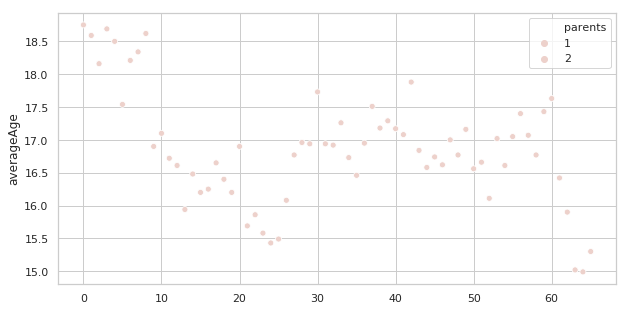

averageFitness


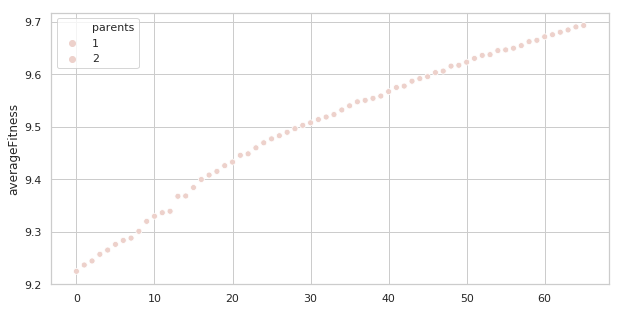

averageOfstdevGenomes
maxAge
maxFitness


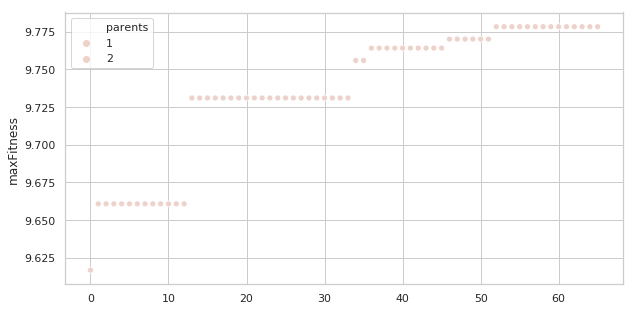

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents
{"parentScheme": uniform, "recombinationScheme": uniform,
run_config
generation_nr
averageAge


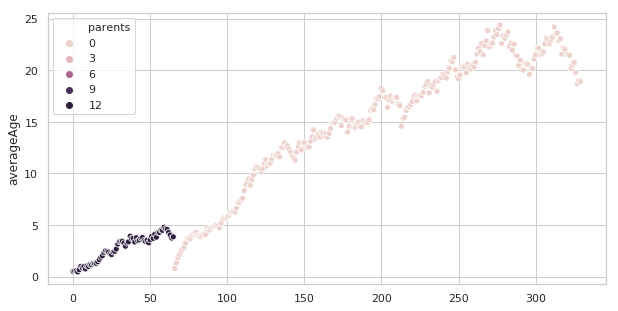

averageFitness


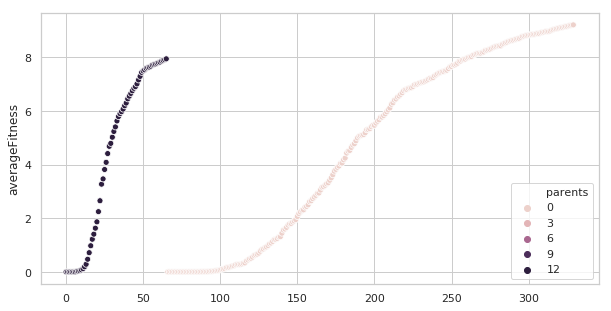

averageOfstdevGenomes
maxAge
maxFitness


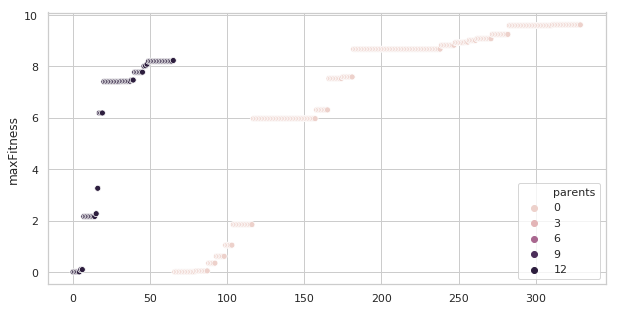

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents
schaffer
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes',
       'generation_nr', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'run_config', 'stdevAge', 'stdevFitness',
       'stdevGenomes', 'parents', 'run_config_without_parents'],
      dtype='object')
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes', 'maxAge',
       'maxFitness', 'minAge', 'minFitness', 'populationSize', 'stdevAge',
       'stdevFitness', 'parents'],
      dtype='object')
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness', 'parents'],
      dtype='object')
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic,
run_config
generation_nr
averageAge


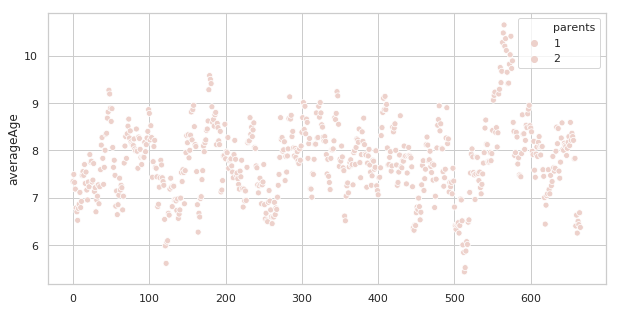

averageFitness


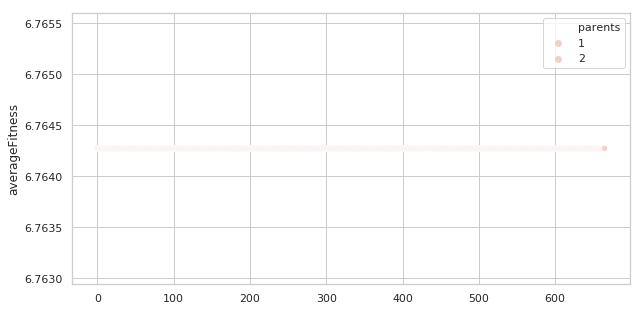

averageOfstdevGenomes
maxAge
maxFitness


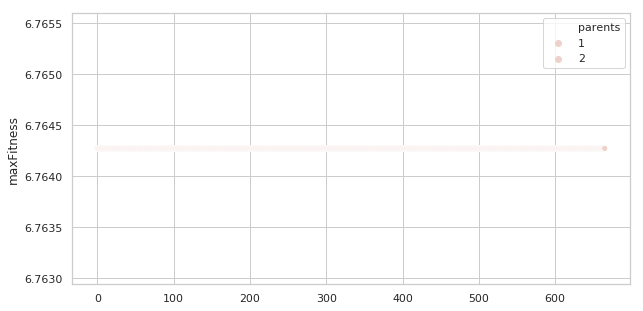

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents
{"parentScheme": uniform, "recombinationScheme": uniform,
run_config
generation_nr
averageAge


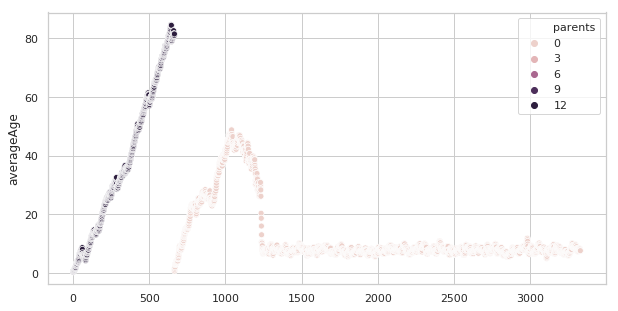

averageFitness


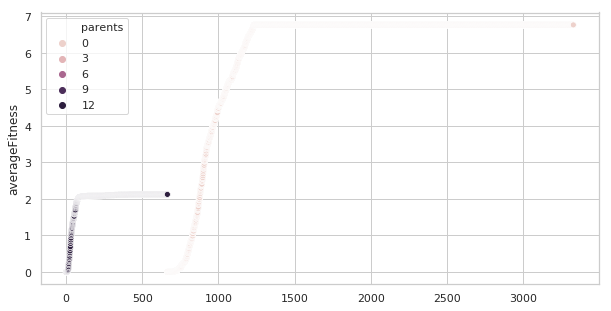

averageOfstdevGenomes
maxAge
maxFitness


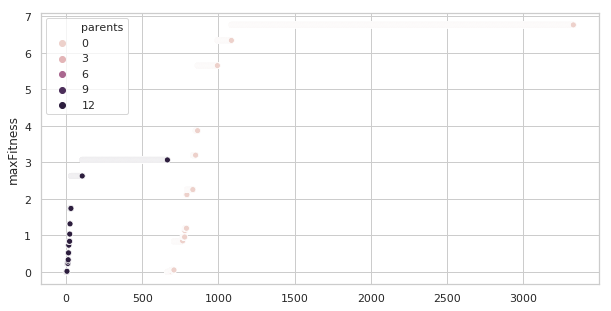

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents
katsuura
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes',
       'generation_nr', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'run_config', 'stdevAge', 'stdevFitness',
       'stdevGenomes', 'parents', 'run_config_without_parents'],
      dtype='object')
Index(['averageAge', 'averageFitness', 'averageOfstdevGenomes', 'maxAge',
       'maxFitness', 'minAge', 'minFitness', 'populationSize', 'stdevAge',
       'stdevFitness', 'parents'],
      dtype='object')
Index(['run_config', 'generation_nr', 'averageAge', 'averageFitness',
       'averageOfstdevGenomes', 'maxAge', 'maxFitness', 'minAge', 'minFitness',
       'populationSize', 'stdevAge', 'stdevFitness', 'parents'],
      dtype='object')
{"parentScheme": tournament_parent, "recombinationScheme": simple_arithmetic,
run_config
generation_nr
averageAge


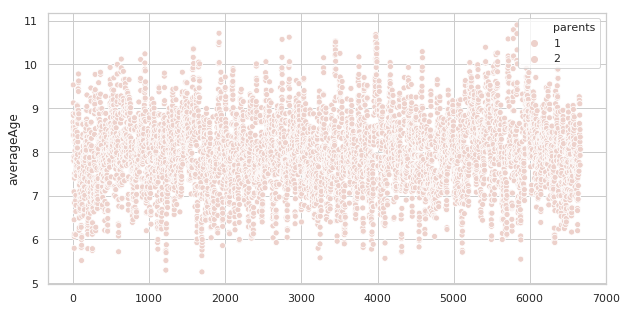

averageFitness


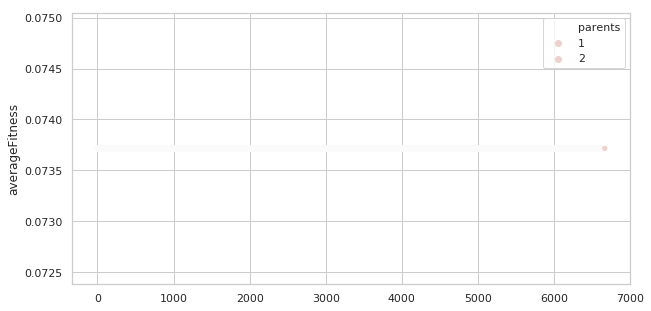

averageOfstdevGenomes
maxAge
maxFitness


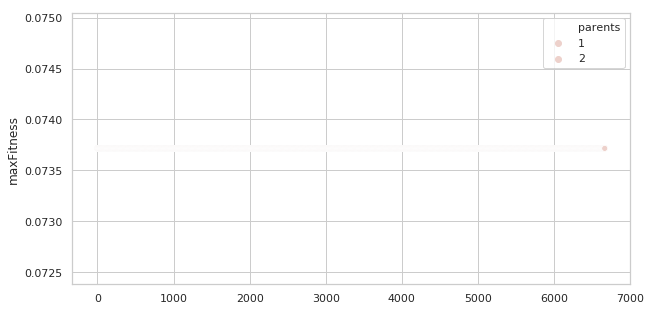

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents
{"parentScheme": uniform, "recombinationScheme": uniform,
run_config
generation_nr
averageAge


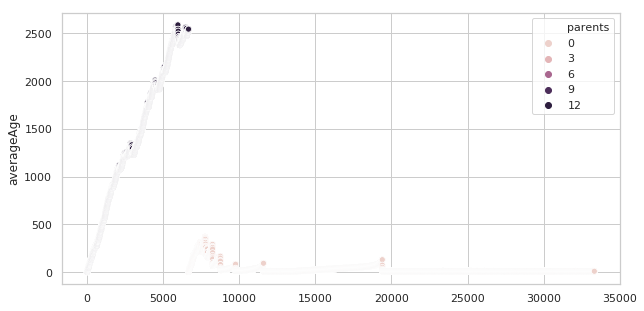

averageFitness


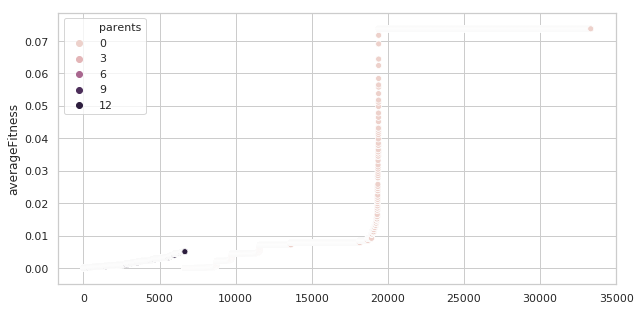

averageOfstdevGenomes
maxAge
maxFitness


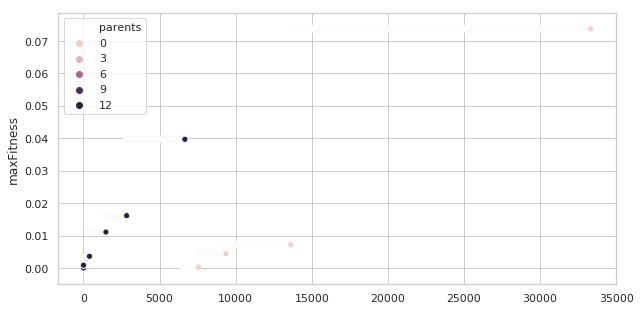

minAge
minFitness
populationSize
stdevAge
stdevFitness
parents
run_config_wo_parents


In [76]:

def plot_columns(df):    
    for col in df:
        print(col)
        if col not in {'averageAge', 'averageFitness', 'maxFitness', 'averageFitness'}:
            continue

        plt.figure(figsize=(10, 5))
        sns.scatterplot(y=df[col], x=range(len(df[col])))

        plt.show()
        

def plot_columns_parents(df):    
    for col in df:
        print(col)
        if col not in {'averageAge', 'averageFitness', 'maxFitness', 'averageFitness'}:
            continue

        
        plt.figure(figsize=(10, 5))
#             sns.scatterplot(y=df[col], x=range(len(df[col])), hue=df['parents'])
        sns.scatterplot(y=df[col], x=range(len(df[col])), hue=df['parents'])

        plt.show()


for fn, total_df in total_dfs.items():
    total_df = total_df.copy()
    print(fn)
    
    
#     total_df['run_config_wo_parents'] = 
#     display(total_df)
#     return
#     print(total_df['run_config_without_parents'])
    print(total_df.keys())
    
    mean = total_df.groupby(['run_config', 'generation_nr']).mean()
#     display(mean)
    print(mean.keys())
    mean = mean.reset_index()
    print(mean.keys())
    
    mean['parents'] = mean['run_config'].map(lambda x: int(re.search('nr_of_parents\": ([0-9]+)', x).groups(1)[0]))
    new_col = total_df['run_config'].map(lambda x: (re.search('(.+) \"nr_of_parents\": ([0-9]+)', x).groups(1)[0]))
    mean = mean.assign(run_config_wo_parents=new_col.values)
    
    for name, group in mean.groupby('run_config_wo_parents'):
        print(name)
#         display(group)
        plot_columns_parents(group)

In [ ]:
# sns.pairplot(df)

# plt.show()